# **CAPSTONE PROJECT MODULE II**

**JCDSOL-013-026 DHIYAFATH ANARGYO ORION**

# Background

Supermarket merupakan salah satu tempat yang dituju oleh manusia untuk melakukan transaksi jual beli. Transaksi jual beli yang dibutuhkan untuk menunjang kebutuhan primer dan sekunder manusia. Selain menjadi tujuan untuk transaksi, pemegang saham supermarket juga menjalankan usahanya sebagai pemasukan untuk mencukupi kebutuhan hidupnya dengan mengambil keuntungan dari kegiatan jual beli.

Dalam hal ini perlu dipelajari bagaimana sifat-sifat customer terhadap supermarket. Sifat yang dimaksud merupakan pola dan segmentasi customer yang berbelanja di supermarket. Hal ini diperlukan untuk mengevaluasi dan menspesifikasi tujuan dari marketing atau promosi yang akan dilakukan oleh pengelola supermarket. 



# Problem Statement

* Kombinasi Segmentasi Customer seperti apa yang mempengaruhi pendapatan supermarket
* Seberapa besar pengaruh promosi
* Bagaimana cara meningkatkan tingkat frekuensi belanja customer di supermarket 

# Goal

* Melakukan promosi yang tertuju terhadap suatu segmentasi customer dengan pengaruh terbesar tanpa melupakan yang lain
* mengevaluasi promosi yang sudah dijalankan, apakah perlu diperbaiki atau cukup dilanjutkan (tepat sasaran subjek dan lokasi promosinya)
* membuat suatu program promosi menarik yang secara tidak langsung membuat customer harus kembali lagi 

# Import Libraries

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# Data Understanding

This Section contains an exploration and explanation of the data. The purpose of this section is to learn more about the data, find the insights so that the data can be analyzed and fulfill the goal of the project

## Read Dataset

read the 'Supermarket Customers.csv' using pandas libraries

In [2]:
df = pd.read_csv('Supermarket Customers.csv', delimiter='\t')
df

ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      5524        1957  Graduation         Single  58138.0        0   
1      2174        1954  Graduation         Single  46344.0        1   
2      4141        1965  Graduation       Together  71613.0        0   
3      6182        1984  Graduation       Together  26646.0        1   
4      5324        1981         PhD        Married  58293.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10870        1967  Graduation        Married  61223.0        0   
2236   4001        1946         PhD       Together  64014.0        2   
2237   7270        1981  Graduation       Divorced  56981.0        0   
2238   8235        1956      Master       Together  69245.0        0   
2239   9405        1954         PhD        Married  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  \
0            0  04-09-2012       58       635  ...                  7   
1            1  08-03-2014       38        11  ...                  5   
2            0  21-08-2013       26       426  ...                  4   
3            0  10-02-2014       26        11  ...                  6   
4            0  19-01-2014       94       173  ...                  5   
...        ...         ...      ...       ...  ...                ...   
2235         1  13-06-2013       46       709  ...                  5   
2236         1  10-06-2014       56       406  ...                  7   
2237         0  25-01-2014       91       908  ...                  6   
2238         1  24-01-2014        8       428  ...                  3   
2239         1  15-10-2012       40        84  ...                  7   

      AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
0                0             0             0             0             0   
1                0             0             0             0             0   
2                0             0             0             0             0   
3                0             0             0             0             0   
4                0             0             0             0             0   
...            ...           ...           ...           ...           ...   
2235             0             0             0             0             0   
2236             0             0             0             1             0   
2237             0             1             0             0             0   
2238             0             0             0             0             0   
2239             0             0             0             0             0   

      Complain  Z_CostContact  Z_Revenue  Response  
0            0              3         11         1  
1            0              3         11         0  
2            0              3         11         0  
3            0              3         11         0  
4            0              3         11         0  
...        ...            ...        ...       ...  
2235         0              3         11         0  
2236         0              3         11         0  
2237         0              3         11         0  
2238         0              3         11         0  
2239         0              3         11         1  

[2240 rows x 29 columns]

## Data Overall

Definition or Description for each columns in the dataset

| Category          | Columns             | Description                                                             |
|-------------------|---------------------|-------------------------------------------------------------------------|
| **People**        | ID                  | Customer's unique identifier                                            |
|                   | Year_Birth          | Customer's birth year                                                   |
|                   | Education           | Customer's education level                                              |
|                   | Marital_Status      | Customer's marital status                                               |
|                   | Income              | Customer's yearly household income ($)                                  |
|                   | Kidhome             | Number of children in customer's household                              |
|                   | Teenhome            | Number of teenagers in customer's household                             |
|                   | Dt_Customer         | Date of customer's enrollment with the company                          |
|                   | Recency             | Number of days since customer's last purchase (Days)                    |
|                   | Complain            | 1 if the customer complained in the last 2 years, 0 otherwise           |
|**Products**       | MntWines            | Amount spent on wine in last 2 years ($)                                |
|                   | MntFruits           | Amount spent on fruits in last 2 years ($)                              |
|                   | MntMeatProducts     | Amount spent on meat in last 2 years ($)                                |
|                   | MntFishProducts     | Amount spent on fish in last 2 years ($)                                |
|                   | MntSweetProducts    | Amount spent on sweets in last 2 years ($)                              |
|                   | MntGoldProds        | Amount spent on gold in last 2 years ($)                                |
|**Promotions**     | NumDealsPurchases   | Number of purchases made with a discount                                |
|                   | AcceptedCmp1        | 1 if the customer accepted the offer in the 1st campaign, 0 otherwise   |
|                   | AcceptedCmp2        | 1 if the customer accepted the offer in the 2nd campaign, 0 otherwise   |
|                   | AcceptedCmp3        | 1 if the customer accepted the offer in the 3rd campaign, 0 otherwise   |
|                   | AcceptedCmp4        | 1 if the customer accepted the offer in the 4th campaign, 0 otherwise   |
|                   | AcceptedCmp5        | 1 if the customer accepted the offer in the 5th campaign, 0 otherwise   |
|                   | Response            | 1 if the customer accepted the offer in the last campaign, 0 otherwise  |
|**Place**          | NumWebPurchases     | Number of purchases made through the company’s website                  |
|                   | NumCatalogPurchases | Number of purchases made using a catalog                                |
|                   | NumStorePurchases   | Number of purchases made directly in stores                             |
|                   | NumWebVisitsMonth   | Number of visits to the company’s website in the last month             |

## Unique Value

This Sub-Section will gives an information about the unique value content of the dataset for each columns.

In [3]:
pd.set_option('display.max_colwidth', None)
# data uni di tiap kolom
listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

Column Name  Number of Unique  \
0                    ID              2240   
1            Year_Birth                59   
2             Education                 5   
3        Marital_Status                 8   
4                Income              1974   
5               Kidhome                 3   
6              Teenhome                 3   
7           Dt_Customer               663   
8               Recency               100   
9              MntWines               776   
10            MntFruits               158   
11      MntMeatProducts               558   
12      MntFishProducts               182   
13     MntSweetProducts               177   
14         MntGoldProds               213   
15    NumDealsPurchases                15   
16      NumWebPurchases                15   
17  NumCatalogPurchases                14   
18    NumStorePurchases                14   
19    NumWebVisitsMonth                16   
20         AcceptedCmp3                 2   
21         AcceptedCmp4                 2   
22         AcceptedCmp5                 2   
23         AcceptedCmp1                 2   
24         AcceptedCmp2                 2   
25             Complain                 2   
26        Z_CostContact                 1   
27            Z_Revenue                 1   
28             Response                 2   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            Unique Sample  
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          [5524, 2174, 4141, 6182, 5324, 7446, 965, 6177, 4855, 5899, 1994, 387, 2125, 8180, 2569, 2114, 9736, 4939, 6565, 2278, 9360, 5376, 1993, 4047, 1409, 7892, 2404, 5255, 9422, 1966, 6864, 3033, 5710, 7373, 8755, 10738, 4339, 10755, 8595, 2968, 8601, 503, 8430, 7281, 2139, 1371, 9909, 7286, 7244, 6566, 8614, 4114, 1331, 2225, 9381, 6260, 10383, 7437, 8557, 8375, 6853, 3076, 1012, 6518, 4137, 8082, 1386, 9369, 4477, 1357, 1402, 10629, 6312, 8132, 1050, 5846, 1859, 7503, 10401, 1618, 3332, 2261, 5346, 4119, 535, 5268, 273, 4452, 8504, 771, 8996, 9235, 5798, 11178, 2230, 7516, 7247, 11100, 4646, 3037, ...]  
1                                                                                                                                                                                                                                            

* Semua Customer telah memiliki masing-masing unique ID mereka. (Jumlah Customer = Jumlah Unique pada kolom 'ID' ) 
* ada data yang perlu diubah seperti 'YOLO' dan 'Absurd' di kolom 'Marital Status' dan '2n Cycle' di kolom 'Education' serta data-data lainnya.

## Data Types

See each of the columns data types, the purposes of this process is to see the suitability between the data and the data types

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [5]:
df[['Dt_Customer']].describe()

Dt_Customer
count         2240
unique         663
top     31-08-2012
freq            12

Tipe data kolom 'Dt Customer' harus diubah menjadi format date time. karena kolom 'Dt Customer' berisi data tentang waktu Customer melakukan pembelian pertama (regiatrasi di supermarket) seharusnya merupakan format date time bukan object

## Missing Values

In this Sub-section, check the missing values with missingno libraries 

<Axes: >

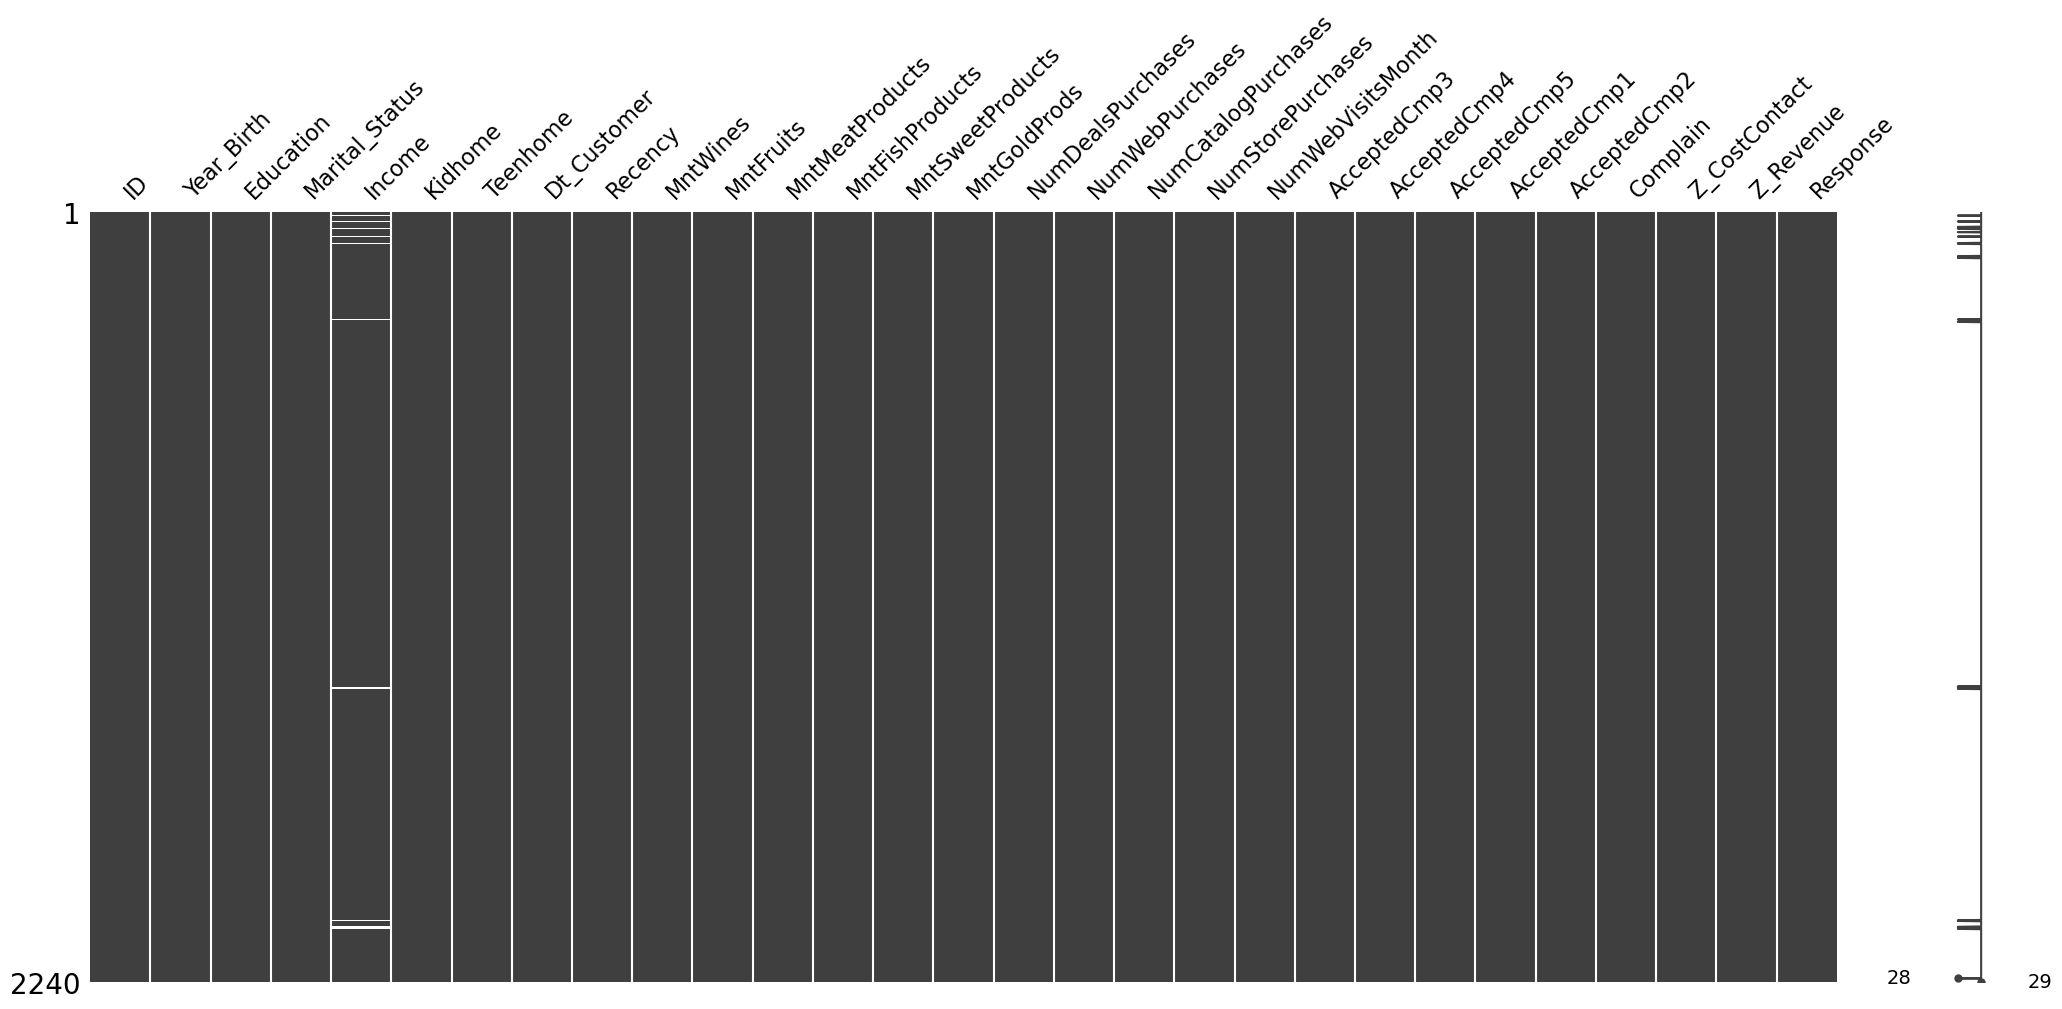

In [6]:
msno.matrix(df)

In [7]:
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

terdapat 24 missing values (n/a) di kolom 'Income'. missing values (data yang hilang) ini akan diselesaikan pada bab berikutnya, data cleaning

## Numerical Statistic

In [8]:
numerik = df.select_dtypes(include='number')

### Descriptive Statistic

In [9]:
df.describe()

ID   Year_Birth         Income      Kidhome     Teenhome  \
count   2240.000000  2240.000000    2216.000000  2240.000000  2240.000000   
mean    5592.159821  1968.805804   52247.251354     0.444196     0.506250   
std     3246.662198    11.984069   25173.076661     0.538398     0.544538   
min        0.000000  1893.000000    1730.000000     0.000000     0.000000   
25%     2828.250000  1959.000000   35303.000000     0.000000     0.000000   
50%     5458.500000  1970.000000   51381.500000     0.000000     0.000000   
75%     8427.750000  1977.000000   68522.000000     1.000000     1.000000   
max    11191.000000  1996.000000  666666.000000     2.000000     2.000000   

           Recency     MntWines    MntFruits  MntMeatProducts  \
count  2240.000000  2240.000000  2240.000000      2240.000000   
mean     49.109375   303.935714    26.302232       166.950000   
std      28.962453   336.597393    39.773434       225.715373   
min       0.000000     0.000000     0.000000         0.000000   
25%      24.000000    23.750000     1.000000        16.000000   
50%      49.000000   173.500000     8.000000        67.000000   
75%      74.000000   504.250000    33.000000       232.000000   
max      99.000000  1493.000000   199.000000      1725.000000   

       MntFishProducts  ...  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
count      2240.000000  ...        2240.000000   2240.000000   2240.000000   
mean         37.525446  ...           5.316518      0.072768      0.074554   
std          54.628979  ...           2.426645      0.259813      0.262728   
min           0.000000  ...           0.000000      0.000000      0.000000   
25%           3.000000  ...           3.000000      0.000000      0.000000   
50%          12.000000  ...           6.000000      0.000000      0.000000   
75%          50.000000  ...           7.000000      0.000000      0.000000   
max         259.000000  ...          20.000000      1.000000      1.000000   

       AcceptedCmp5  AcceptedCmp1  AcceptedCmp2     Complain  Z_CostContact  \
count   2240.000000   2240.000000   2240.000000  2240.000000         2240.0   
mean       0.072768      0.064286      0.013393     0.009375            3.0   
std        0.259813      0.245316      0.114976     0.096391            0.0   
min        0.000000      0.000000      0.000000     0.000000            3.0   
25%        0.000000      0.000000      0.000000     0.000000            3.0   
50%        0.000000      0.000000      0.000000     0.000000            3.0   
75%        0.000000      0.000000      0.000000     0.000000            3.0   
max        1.000000      1.000000      1.000000     1.000000            3.0   

       Z_Revenue     Response  
count     2240.0  2240.000000  
mean        11.0     0.149107  
std          0.0     0.356274  
min         11.0     0.000000  
25%         11.0     0.000000  
50%         11.0     0.000000  
75%         11.0     0.000000  
max         11.0     1.000000  

[8 rows x 26 columns]

### Distribusi Data

C:\Users\Orion\AppData\Local\Temp\ipykernel_17076\374591975.py:9: UserWarning: The figure layout has changed to tight
  fig.tight_layout()
C:\Users\Orion\AppData\Local\Temp\ipykernel_17076\374591975.py:9: UserWarning: The figure layout has changed to tight
  fig.tight_layout()
C:\Users\Orion\AppData\Local\Temp\ipykernel_17076\374591975.py:9: UserWarning: The figure layout has changed to tight
  fig.tight_layout()
C:\Users\Orion\AppData\Local\Temp\ipykernel_17076\374591975.py:9: UserWarning: The figure layout has changed to tight
  fig.tight_layout()
C:\Users\Orion\AppData\Local\Temp\ipykernel_17076\374591975.py:9: UserWarning: The figure layout has changed to tight
  fig.tight_layout()
C:\Users\Orion\AppData\Local\Temp\ipykernel_17076\374591975.py:9: UserWarning: The figure layout has changed to tight
  fig.tight_layout()
C:\Users\Orion\AppData\Local\Temp\ipykernel_17076\374591975.py:9: UserWarning: The figure layout has changed to tight
  fig.tight_layout()
C:\Users\Orion\AppData\Loca

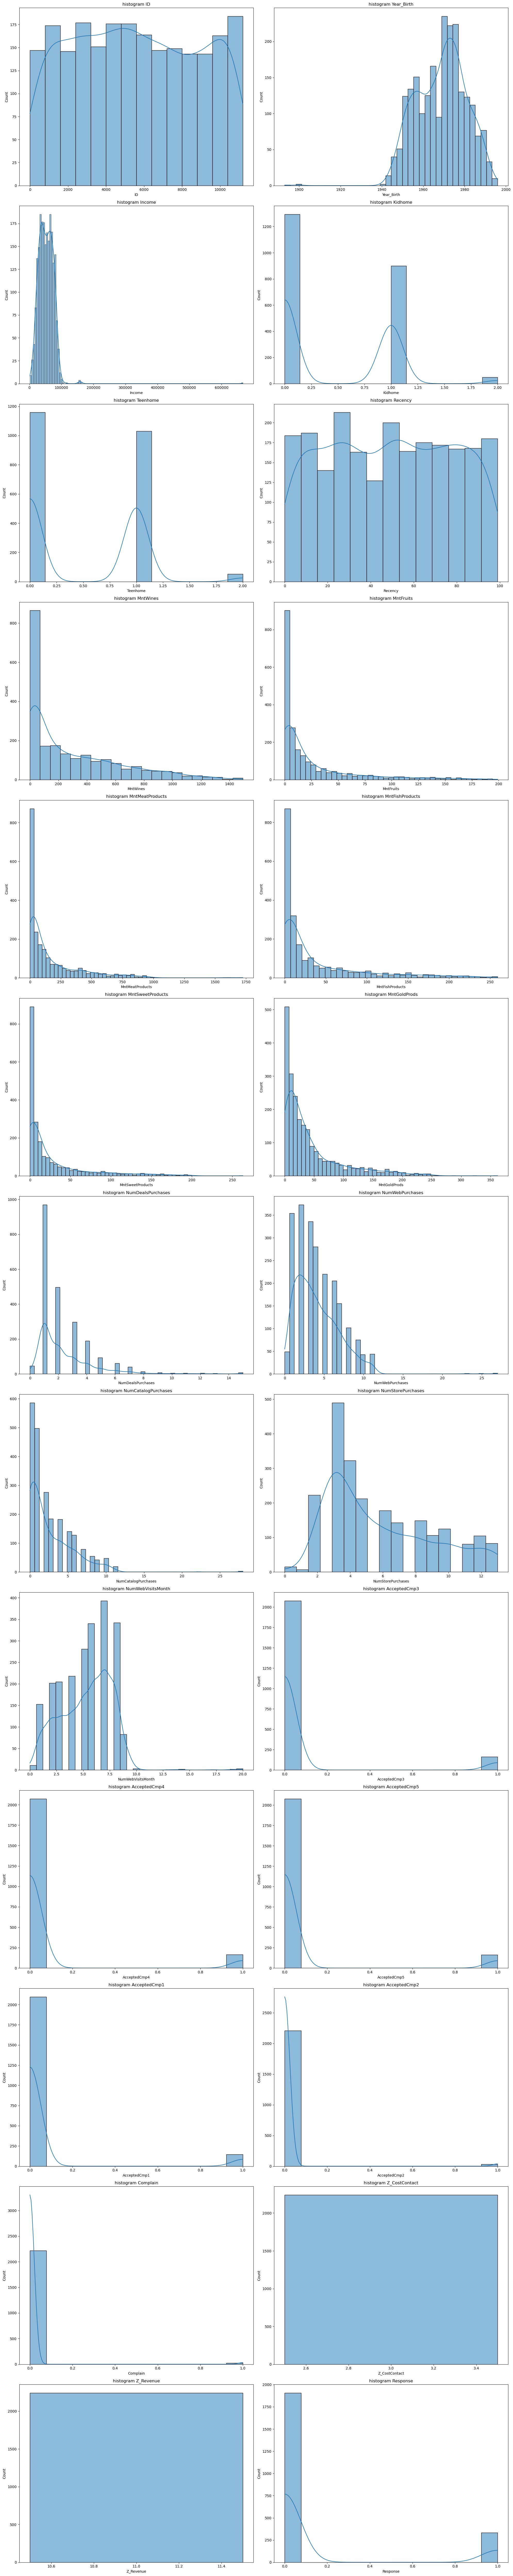

In [10]:
fig = plt.figure(figsize=(20,100)) # horizontal, vertikal

count = 0
for kolom in numerik.columns:
    count += 1
    plt.subplot(13,2,count)
    sns.histplot(numerik[kolom], kde=True)
    plt.title(f"histogram {kolom}")
    fig.tight_layout()
plt.show()

### Outliers

C:\Users\Orion\AppData\Local\Temp\ipykernel_17076\2122181805.py:8: UserWarning: The figure layout has changed to tight
  fig.tight_layout() # biar tidak tertumpuk
C:\Users\Orion\AppData\Local\Temp\ipykernel_17076\2122181805.py:8: UserWarning: The figure layout has changed to tight
  fig.tight_layout() # biar tidak tertumpuk
C:\Users\Orion\AppData\Local\Temp\ipykernel_17076\2122181805.py:8: UserWarning: The figure layout has changed to tight
  fig.tight_layout() # biar tidak tertumpuk
C:\Users\Orion\AppData\Local\Temp\ipykernel_17076\2122181805.py:8: UserWarning: The figure layout has changed to tight
  fig.tight_layout() # biar tidak tertumpuk
C:\Users\Orion\AppData\Local\Temp\ipykernel_17076\2122181805.py:8: UserWarning: The figure layout has changed to tight
  fig.tight_layout() # biar tidak tertumpuk
C:\Users\Orion\AppData\Local\Temp\ipykernel_17076\2122181805.py:8: UserWarning: The figure layout has changed to tight
  fig.tight_layout() # biar tidak tertumpuk
C:\Users\Orion\AppData

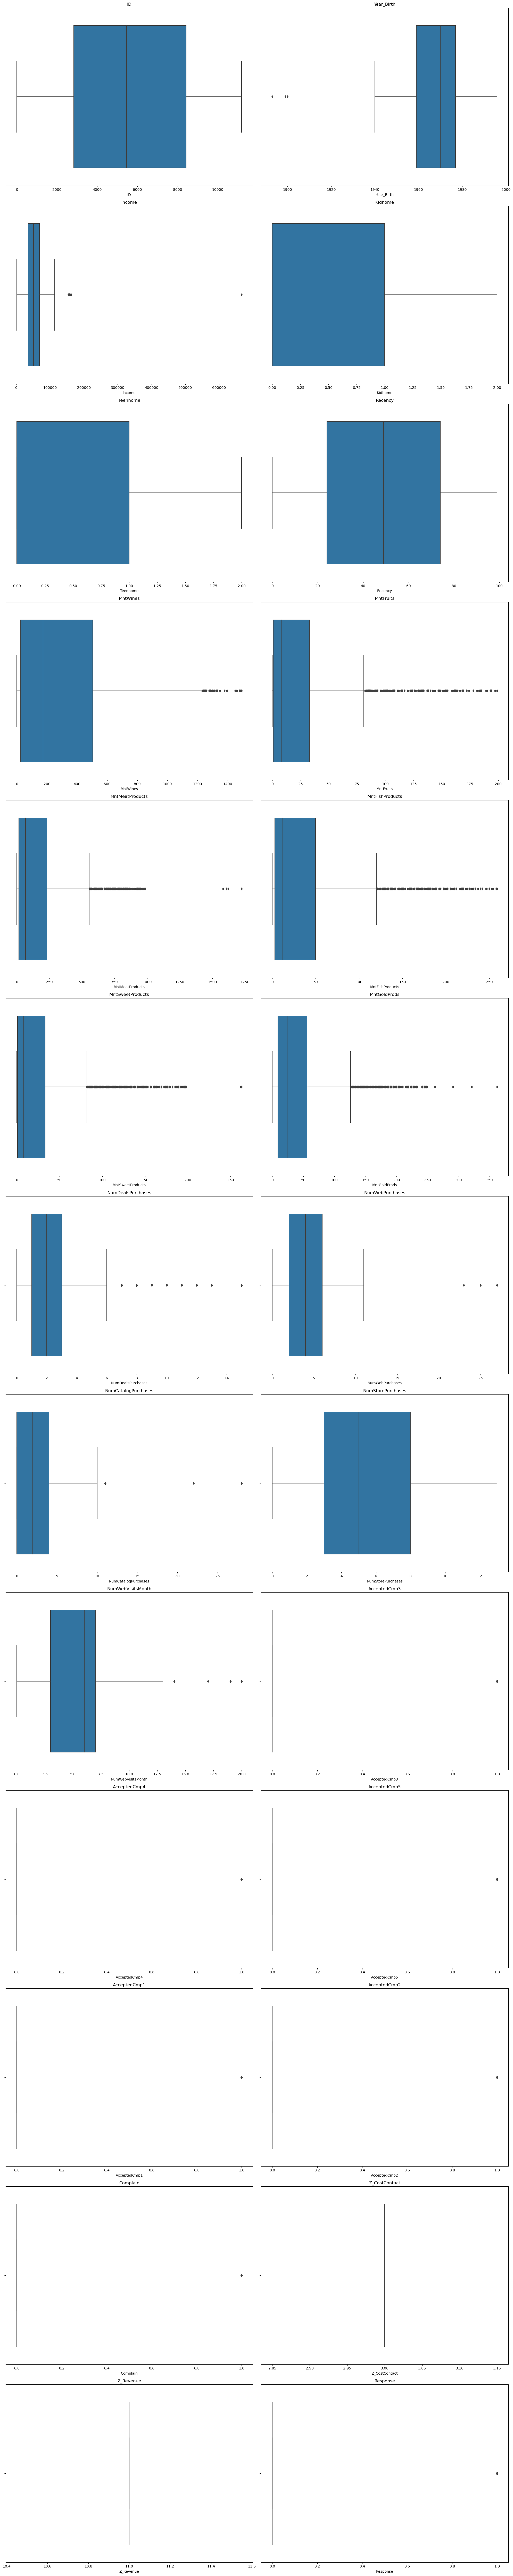

In [11]:
fig = plt.figure(figsize=(20,100)) # horizontal, vertikal

count = 0
for kolom in numerik.columns:
    count += 1
    plt.subplot(13,2,count)
    sns.boxplot(numerik, x = kolom)
    fig.tight_layout() # biar tidak tertumpuk
    plt.title(f'{kolom}')
plt.show()

In [12]:
for kolom in numerik.columns:
    q1 = df[kolom].describe().loc['25%']
    q3 = df[kolom].describe().loc['75%']
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr 

    jumlah_outliers = df[(df[kolom] < lower_bound) | (df[kolom] > upper_bound)].shape[0]
    print(f"data {kolom} memiliki outliers {jumlah_outliers}")

data ID memiliki outliers 0
data Year_Birth memiliki outliers 3
data Income memiliki outliers 8
data Kidhome memiliki outliers 0
data Teenhome memiliki outliers 0
data Recency memiliki outliers 0
data MntWines memiliki outliers 35
data MntFruits memiliki outliers 227
data MntMeatProducts memiliki outliers 175
data MntFishProducts memiliki outliers 223
data MntSweetProducts memiliki outliers 248
data MntGoldProds memiliki outliers 207
data NumDealsPurchases memiliki outliers 86
data NumWebPurchases memiliki outliers 4
data NumCatalogPurchases memiliki outliers 23
data NumStorePurchases memiliki outliers 0
data NumWebVisitsMonth memiliki outliers 8
data AcceptedCmp3 memiliki outliers 163
data AcceptedCmp4 memiliki outliers 167
data AcceptedCmp5 memiliki outliers 163
data AcceptedCmp1 memiliki outliers 144
data AcceptedCmp2 memiliki outliers 30
data Complain memiliki outliers 21
data Z_CostContact memiliki outliers 0
data Z_Revenue memiliki outliers 0
data Response memiliki outliers 334


### Korelasi

In [13]:
correlation = df.corr(method='spearman',numeric_only=True)

<Axes: >

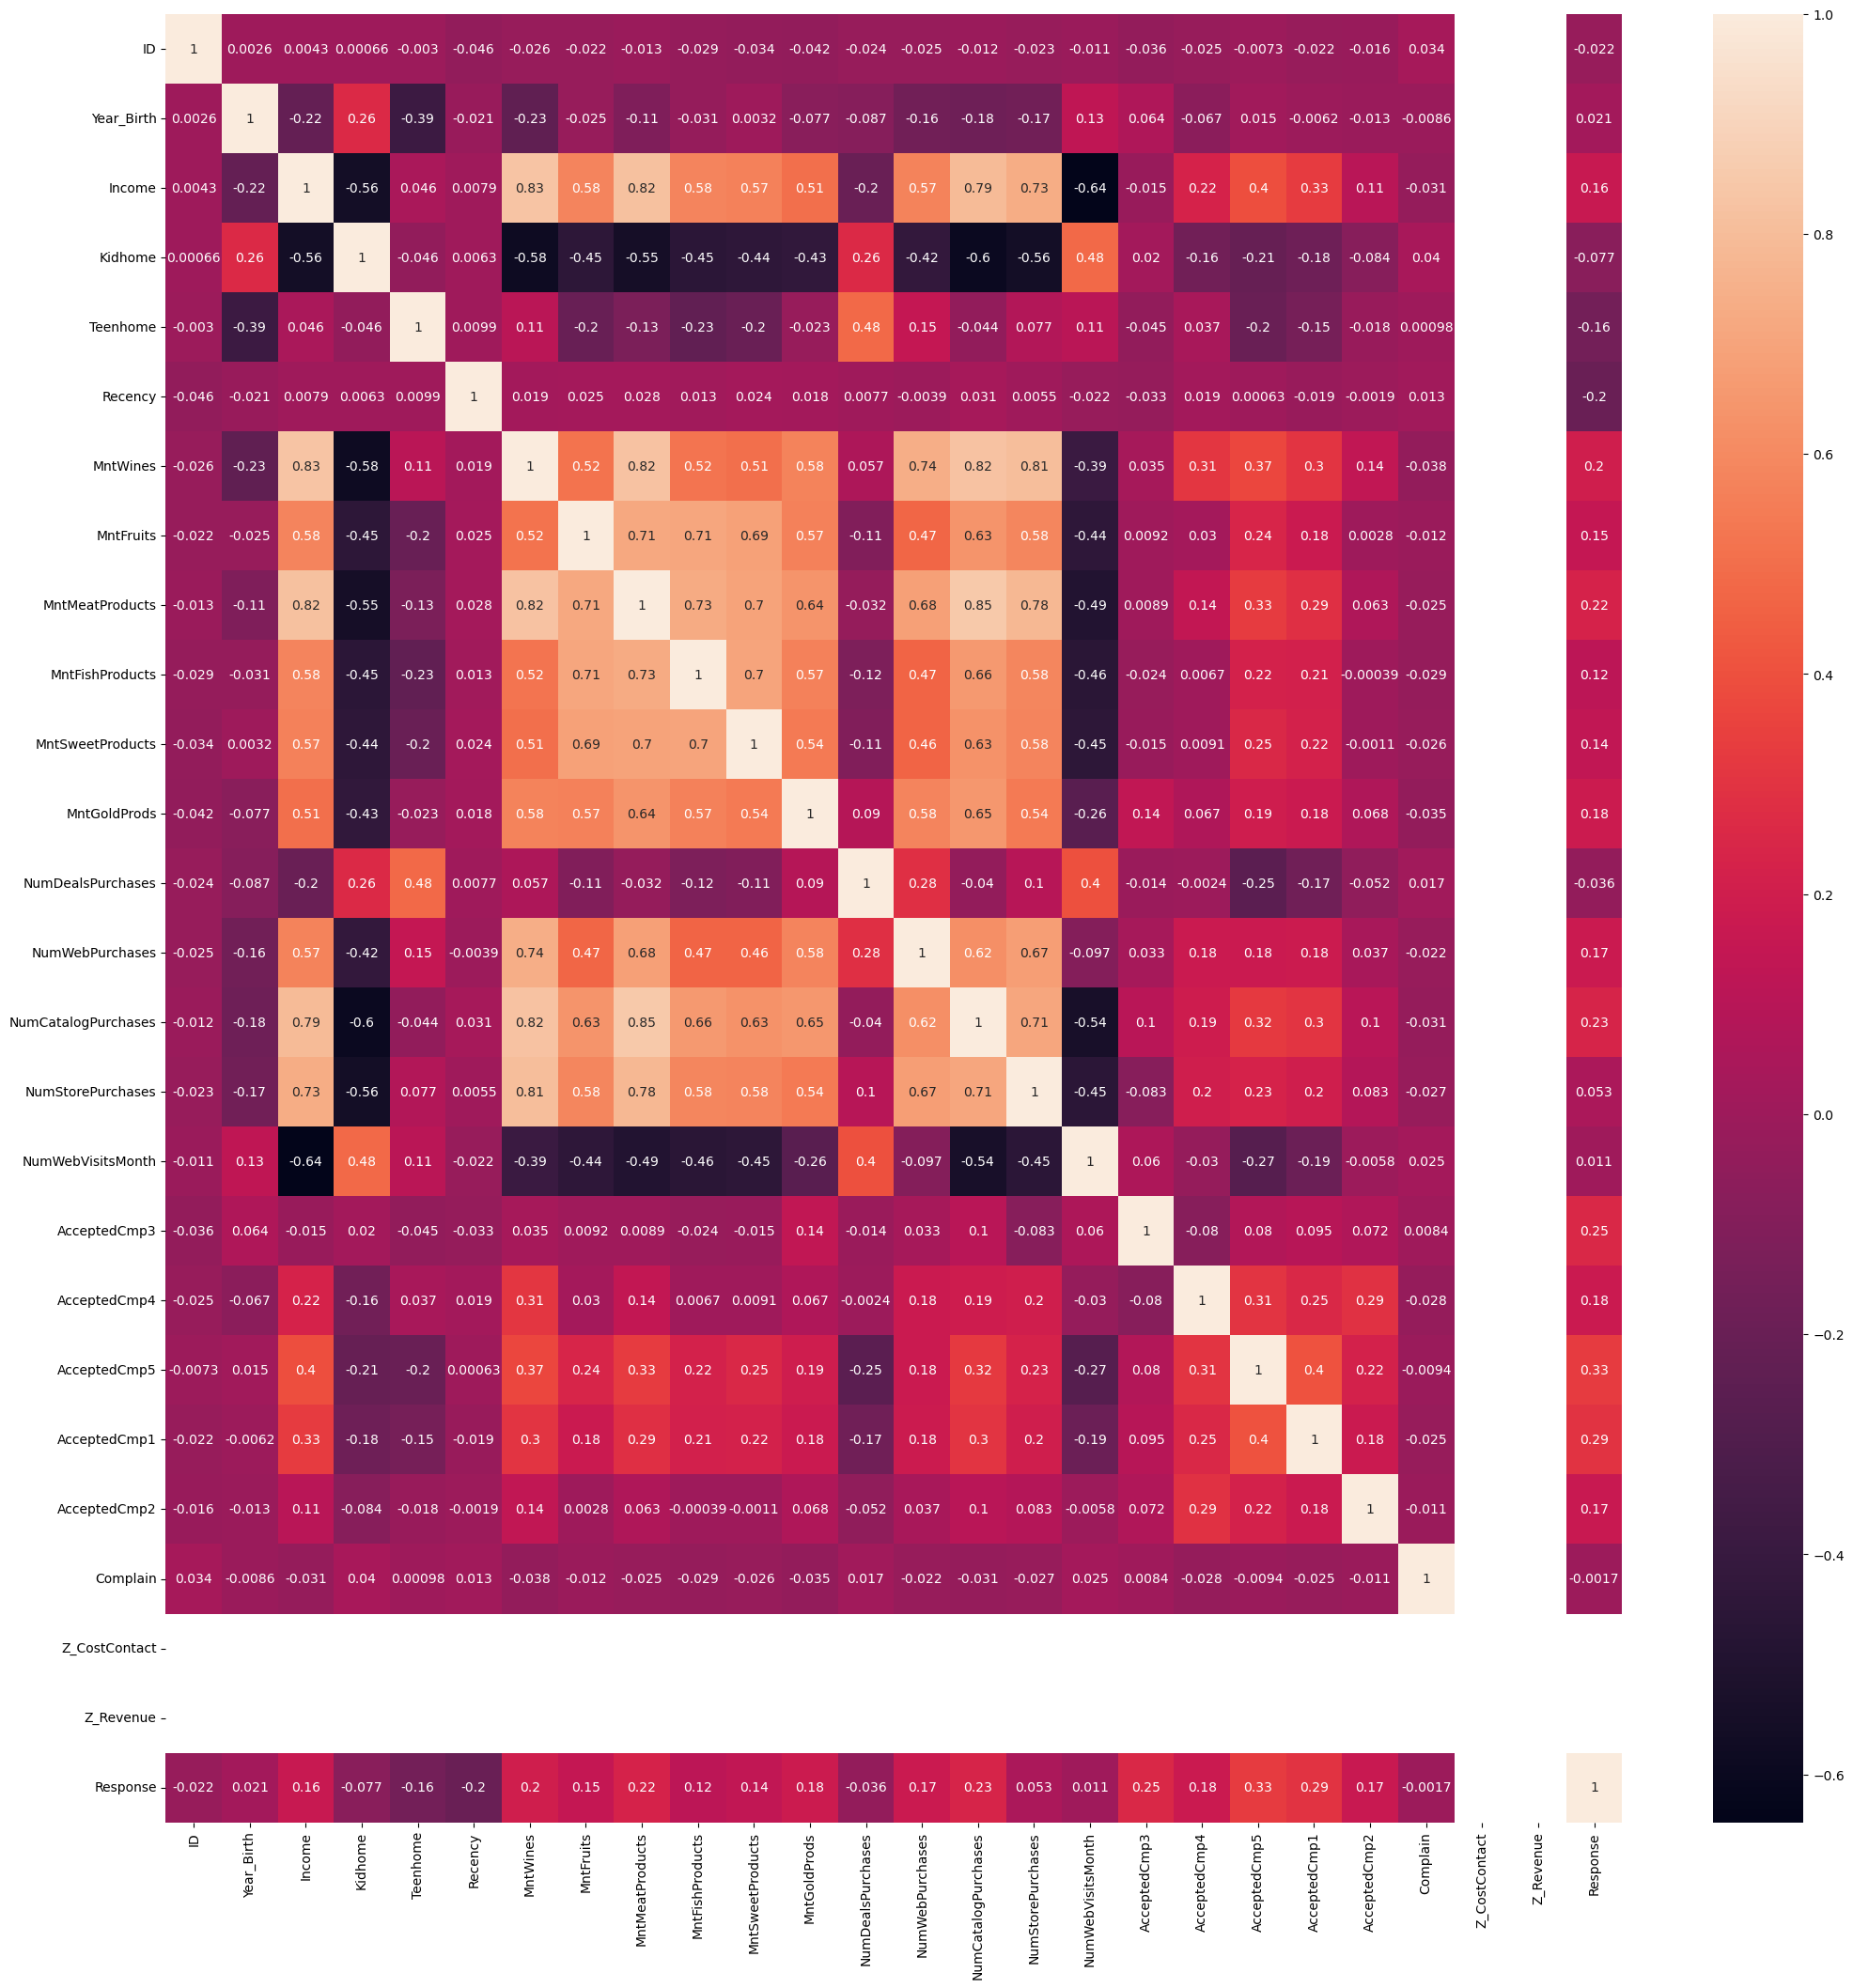

In [14]:
plt.figure(figsize=(25,25))
sns.heatmap(correlation, annot=True)

## Categorical Statistic

In [15]:
kategorik = df.select_dtypes(exclude='number')

In [16]:
kategorik

Education Marital_Status Dt_Customer
0     Graduation         Single  04-09-2012
1     Graduation         Single  08-03-2014
2     Graduation       Together  21-08-2013
3     Graduation       Together  10-02-2014
4            PhD        Married  19-01-2014
...          ...            ...         ...
2235  Graduation        Married  13-06-2013
2236         PhD       Together  10-06-2014
2237  Graduation       Divorced  25-01-2014
2238      Master       Together  24-01-2014
2239         PhD        Married  15-10-2012

[2240 rows x 3 columns]

C:\Users\Orion\AppData\Local\Temp\ipykernel_17076\3633983750.py:7: UserWarning: The figure layout has changed to tight
  fig.tight_layout()
C:\Users\Orion\AppData\Local\Temp\ipykernel_17076\3633983750.py:7: UserWarning: The figure layout has changed to tight
  fig.tight_layout()


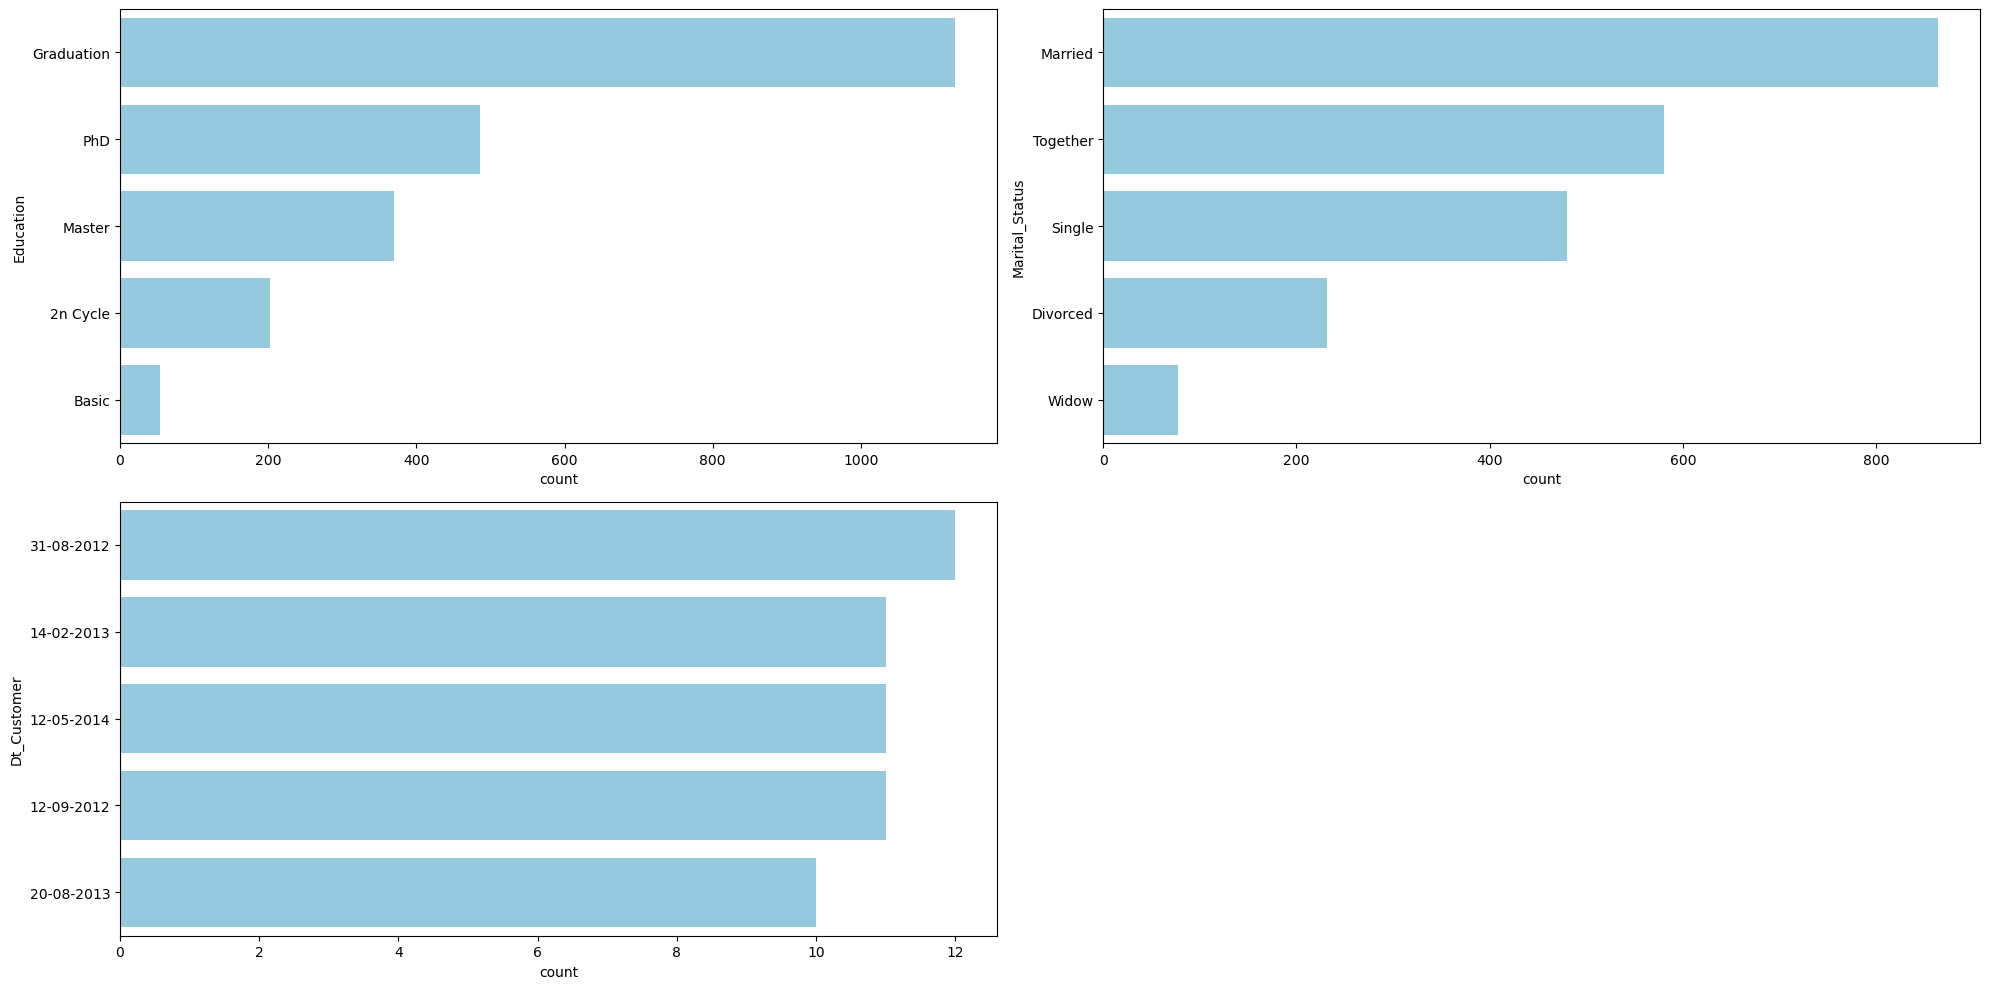

In [17]:
count = 0
fig = plt.figure(figsize=(20,10))
for kolom in kategorik.columns:
    count += 1
    plt.subplot(2,2,count)
    sns.countplot(y = kolom, data = kategorik, order = kategorik[kolom].value_counts().sort_values(ascending = False).head(5).index, color= 'skyblue')
    fig.tight_layout()
plt.show()

### Count Values

In [18]:
kategorik.nunique()

Education           5
Marital_Status      8
Dt_Customer       663
dtype: int64

### Modus

In [19]:
kategorik.describe(include='object')

Education Marital_Status Dt_Customer
count         2240           2240        2240
unique           5              8         663
top     Graduation        Married  31-08-2012
freq          1127            864          12

# Data Cleaning

In [20]:
dfClean = df.copy()

## Change Data Types

Change 'Dt_Customer' from object to time

In [21]:
dfClean['Dt_Customer'] = pd.to_datetime(dfClean['Dt_Customer'],dayfirst=True)
dfClean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

## Drop Columns

Drop the unnecessary columns = 'Z_CostContact' and 'Z_Revenue'

In [22]:
dfClean = dfClean.drop(['Z_CostContact','Z_Revenue'], axis = 1)
dfClean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

## Editing Unique

### Marital Status

In [23]:
dfClean['Marital_Status'].value_counts()

Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

In [24]:
def maritalStatus (marStat) :
    if marStat == 'Together' :
        return 'Married'
    elif marStat == 'Absurd' :
        return 'Single'
    elif marStat == 'YOLO' :
        return 'Single'
    elif marStat == 'Widow':
        return 'Divorced'
    elif marStat == 'Alone':
        return 'Single'
    else :
        return marStat

In [25]:
dfClean['Marital_Status'] = dfClean['Marital_Status'].apply(maritalStatus)

In [26]:
dfClean['Marital_Status'].value_counts()

Marital_Status
Married     1444
Single       487
Divorced     309
Name: count, dtype: int64

### Education 

In [27]:
dfClean['Education'].value_counts()

Education
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: count, dtype: int64

In [28]:
def educationLevel (edu) :
    if edu == '2n Cycle' :
        return 'Master'
    elif edu == 'Basic' :
        return 'Non-Graduate'
    elif edu == 'Graduation' :
        return 'Bachelor'
    elif edu == 'PhD':
        return 'Doctoral'
    else :
        return edu

In [29]:
dfClean['Education'] = dfClean['Education'].apply(educationLevel)

In [30]:
dfClean['Education'].value_counts()

Education
Bachelor        1127
Master           573
Doctoral         486
Non-Graduate      54
Name: count, dtype: int64

## Insert New Columns

### Age Column

In [31]:
dfClean['Dt_Customer'].max()

Timestamp('2014-06-29 00:00:00')

In [32]:
dfClean.insert(2, 'Age', dfClean['Year_Birth'].apply(lambda x : 2014-x))

### Sum of House Member Column

In [33]:
dfClean.insert(8,'Sum of House Member',dfClean['Marital_Status'].apply(lambda x : 2 if x == 'Married' else 1) + dfClean['Kidhome'] + dfClean['Teenhome'])

In [34]:
dfClean[['Sum of House Member']]

Sum of House Member
0                       1
1                       3
2                       2
3                       3
4                       3
...                   ...
2235                    3
2236                    5
2237                    1
2238                    3
2239                    4

[2240 rows x 1 columns]

### Money Spent Column

In [35]:
dfClean.insert(16,'Money Spent',dfClean['MntWines'] + dfClean['MntFruits'] + dfClean['MntMeatProducts'] + dfClean['MntFishProducts'] + dfClean['MntSweetProducts'] + dfClean['MntGoldProds'])

In [36]:
dfClean[['Money Spent']]

Money Spent
0            1617
1              27
2             776
3              53
4             422
...           ...
2235         1341
2236          444
2237         1241
2238          843
2239          172

[2240 rows x 1 columns]

### Purchase Column

In [37]:
dfClean.insert(23,'Freq Purchased',dfClean['NumCatalogPurchases'] + dfClean['NumStorePurchases'] + dfClean['NumWebPurchases'])

In [38]:
dfClean[['Freq Purchased']]

Freq Purchased
0                 22
1                  4
2                 20
3                  6
4                 14
...              ...
2235              16
2236              15
2237              18
2238              21
2239               8

[2240 rows x 1 columns]

cek data Purchase, untuk mengurangi data yang abnormal (tidak ada pembelian maupun ada data money spent namun tidak ada data pembelian)

In [39]:
dfClean.sort_values(by='Freq Purchased',ascending=True)

ID  Year_Birth  Age Education Marital_Status    Income  Kidhome  \
2132  11181        1949   65  Doctoral        Married  156924.0        0   
1245   6862        1971   43  Bachelor       Divorced    1730.0        0   
1846   9931        1963   51  Doctoral        Married    4023.0        1   
655    5555        1975   39  Bachelor       Divorced  153924.0        0   
1524  11110        1973   41  Bachelor         Single    3502.0        1   
...     ...         ...  ...       ...            ...       ...      ...   
67     9369        1979   35    Master         Single   88194.0        0   
636    6945        1952   62  Bachelor         Single   84574.0        0   
1669   4127        1967   47  Doctoral        Married   77766.0        0   
412    7030        1955   59  Doctoral        Married   66465.0        0   
1252   5153        1967   47  Doctoral        Married   77766.0        0   

      Teenhome  Sum of House Member Dt_Customer  ...  NumStorePurchases  \
2132         0                    2  2013-08-29  ...                  0   
1245         0                    1  2014-05-18  ...                  0   
1846         1                    4  2014-06-23  ...                  0   
655          0                    1  2014-02-07  ...                  0   
1524         0                    2  2013-04-13  ...                  0   
...        ...                  ...         ...  ...                ...   
67           1                    2  2014-03-19  ...                 10   
636          0                    1  2013-06-04  ...                 11   
1669         1                    3  2013-02-22  ...                 11   
412          1                    3  2013-03-30  ...                 12   
1252         1                    3  2013-02-22  ...                 11   

      NumWebVisitsMonth  Freq Purchased  AcceptedCmp3  AcceptedCmp4  \
2132                  0               0             0             0   
1245                 20               0             0             0   
1846                 19               0             0             0   
655                   0               0             0             0   
1524                 14               0             0             0   
...                 ...             ...           ...           ...   
67                    5              31             1             0   
636                   5              31             0             0   
1669                  6              32             1             0   
412                   6              32             0             0   
1252                  6              32             1             0   

      AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  
2132             0             0             0         0         0  
1245             0             0             0         0         0  
1846             0             0             0         0         0  
655              0             0             0         0         0  
1524             0             0             0         0         0  
...            ...           ...           ...       ...       ...  
67               0             1             0         0         1  
636              0             0             0         0         0  
1669             0             0             0         0         1  
412              0             1             0         0         0  
1252             0             0             0         0         1  

[2240 rows x 31 columns]

In [40]:
dfClean[dfClean['Freq Purchased']==0].count()

ID                     6
Year_Birth             6
Age                    6
Education              6
Marital_Status         6
Income                 6
Kidhome                6
Teenhome               6
Sum of House Member    6
Dt_Customer            6
Recency                6
MntWines               6
MntFruits              6
MntMeatProducts        6
MntFishProducts        6
MntSweetProducts       6
Money Spent            6
MntGoldProds           6
NumDealsPurchases      6
NumWebPurchases        6
NumCatalogPurchases    6
NumStorePurchases      6
NumWebVisitsMonth      6
Freq Purchased         6
AcceptedCmp3           6
AcceptedCmp4           6
AcceptedCmp5           6
AcceptedCmp1           6
AcceptedCmp2           6
Complain               6
Response               6
dtype: int64

In [41]:
cekPurchase = dfClean[dfClean['Freq Purchased']==0]
cekPurchase

ID  Year_Birth  Age Education Marital_Status    Income  Kidhome  \
655    5555        1975   39  Bachelor       Divorced  153924.0        0   
981    3955        1965   49  Bachelor       Divorced    4861.0        0   
1245   6862        1971   43  Bachelor       Divorced    1730.0        0   
1524  11110        1973   41  Bachelor         Single    3502.0        1   
1846   9931        1963   51  Doctoral        Married    4023.0        1   
2132  11181        1949   65  Doctoral        Married  156924.0        0   

      Teenhome  Sum of House Member Dt_Customer  ...  NumStorePurchases  \
655          0                    1  2014-02-07  ...                  0   
981          0                    1  2014-06-22  ...                  0   
1245         0                    1  2014-05-18  ...                  0   
1524         0                    2  2013-04-13  ...                  0   
1846         1                    4  2014-06-23  ...                  0   
2132         0                    2  2013-08-29  ...                  0   

      NumWebVisitsMonth  Freq Purchased  AcceptedCmp3  AcceptedCmp4  \
655                   0               0             0             0   
981                  14               0             0             0   
1245                 20               0             0             0   
1524                 14               0             0             0   
1846                 19               0             0             0   
2132                  0               0             0             0   

      AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  
655              0             0             0         0         0  
981              0             0             0         0         0  
1245             0             0             0         0         0  
1524             0             0             0         0         0  
1846             0             0             0         0         0  
2132             0             0             0         0         0  

[6 rows x 31 columns]

In [42]:
cekPurchase[['Freq Purchased']].count()

Freq Purchased    6
dtype: int64

terdapat 6 orang yang tidak pernah melakukan pembelian di supermarket

### Promos Column

In [43]:
dfClean.insert(31,'Promos',(dfClean['AcceptedCmp1'] + dfClean['AcceptedCmp2'] + dfClean['AcceptedCmp3'] + dfClean['AcceptedCmp4'] + dfClean['AcceptedCmp5'] + dfClean['Response']))
dfClean[['Promos']]

Promos
0          1
1          0
2          0
3          0
4          0
...      ...
2235       0
2236       1
2237       1
2238       0
2239       1

[2240 rows x 1 columns]

### Remove Abnormal Purchase Data

In [44]:
abnormal = dfClean[(dfClean['Freq Purchased']==0) & (dfClean['NumDealsPurchases']>=0)]

In [45]:
abnormal[['ID','Money Spent','Freq Purchased','NumDealsPurchases','Promos']]

ID  Money Spent  Freq Purchased  NumDealsPurchases  Promos
655    5555            6               0                  0       0
981    3955            6               0                  0       0
1245   6862            8               0                 15       0
1524  11110            5               0                  0       0
1846   9931            9               0                 15       0
2132  11181            8               0                  0       0

drop baris yang didalamnya terdapat data yang abnormal
* 2 orang pernah menggunakan diskon 15 kali, pernah mengeluarkan uang, namun tidak pernah ada data berbelanja (checkout) 
* 4 pernah mengeluarkan uang, namun tidak pernah ada data berbelanja (checkout)

In [46]:
dfClean.drop([655,981,1245,1524,1846,2132],axis = 0,inplace=True)

## Handling Outliers

### Age

In [47]:
dfClean.sort_values(by='Age',ascending=False,axis=0)

ID  Year_Birth  Age     Education Marital_Status   Income  Kidhome  \
239   11004        1893  121        Master         Single  60182.0        0   
339    1150        1899  115      Doctoral        Married  83532.0        0   
192    7829        1900  114        Master       Divorced  36640.0        1   
1950   6663        1940   74      Doctoral         Single  51141.0        0   
424    6932        1941   73      Doctoral        Married  93027.0        0   
...     ...         ...  ...           ...            ...      ...      ...   
747   10548        1995   19      Bachelor         Single  71163.0        0   
1850   4427        1995   19        Master         Single  83257.0        0   
2213   3661        1995   19        Master         Single  80617.0        0   
1170    193        1996   18  Non-Graduate        Married  14421.0        0   
46     9909        1996   18        Master        Married   7500.0        0   

      Teenhome  Sum of House Member Dt_Customer  ...  NumWebVisitsMonth  \
239          1                    2  2014-05-17  ...                  4   
339          0                    2  2013-09-26  ...                  1   
192          0                    2  2013-09-26  ...                  5   
1950         0                    1  2013-07-08  ...                  5   
424          0                    2  2013-04-13  ...                  2   
...        ...                  ...         ...  ...                ...   
747          0                    1  2014-03-09  ...                  1   
1850         0                    1  2012-09-18  ...                  6   
2213         0                    1  2012-10-12  ...                  2   
1170         0                    2  2014-02-17  ...                  5   
46           0                    2  2012-11-09  ...                  9   

      Freq Purchased  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  \
239                3             0             0             0             0   
339               14             0             0             1             0   
192                5             0             0             0             0   
1950               8             0             0             0             0   
424               22             0             0             1             0   
...              ...           ...           ...           ...           ...   
747               23             0             0             0             0   
1850              27             1             0             1             0   
2213              18             0             0             0             0   
1170               3             1             0             0             0   
46                 7             0             0             0             0   

      AcceptedCmp2  Complain  Response  Promos  
239              0         0         0       0  
339              0         0         0       1  
192              0         1         0       0  
1950             0         0         0       0  
424              0         0         0       1  
...            ...       ...       ...     ...  
747              0         0         0       0  
1850             0         1         1       3  
2213             0         0         0       0  
1170             0         0         0       1  
46               0         0         1       1  

[2234 rows x 32 columns]

In [48]:
dfClean.loc[[239,339,192]]

ID  Year_Birth  Age Education Marital_Status   Income  Kidhome  \
239  11004        1893  121    Master         Single  60182.0        0   
339   1150        1899  115  Doctoral        Married  83532.0        0   
192   7829        1900  114    Master       Divorced  36640.0        1   

     Teenhome  Sum of House Member Dt_Customer  ...  NumWebVisitsMonth  \
239         1                    2  2014-05-17  ...                  4   
339         0                    2  2013-09-26  ...                  1   
192         0                    2  2013-09-26  ...                  5   

     Freq Purchased  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  \
239               3             0             0             0             0   
339              14             0             0             1             0   
192               5             0             0             0             0   

     AcceptedCmp2  Complain  Response  Promos  
239             0         0         0       0  
339             0         0         0       1  
192             0         1         0       0  

[3 rows x 32 columns]

drop baris yang berisikan data umur yang tidak masuk akal

In [49]:
dfClean.drop([239,339,192],axis=0,inplace=True)

### Income

In [50]:
dfClean.sort_values(by='Income',ascending=False,axis=0)

ID  Year_Birth  Age Education Marital_Status    Income  Kidhome  \
2233   9432        1977   37  Bachelor        Married  666666.0        1   
617    1503        1976   38  Doctoral        Married  162397.0        1   
687    1501        1982   32  Doctoral        Married  160803.0        0   
1300   5336        1971   43    Master        Married  157733.0        1   
164    8475        1973   41  Doctoral        Married  157243.0        0   
...     ...         ...  ...       ...            ...       ...      ...   
2078   5079        1971   43  Bachelor        Married       NaN        1   
2079  10339        1954   60    Master        Married       NaN        0   
2081   3117        1955   59  Bachelor         Single       NaN        0   
2084   5250        1943   71    Master       Divorced       NaN        0   
2228   8720        1978   36    Master        Married       NaN        0   

      Teenhome  Sum of House Member Dt_Customer  ...  NumWebVisitsMonth  \
2233         0                    3  2013-06-02  ...                  6   
617          1                    4  2013-06-03  ...                  1   
687          0                    2  2012-08-04  ...                  0   
1300         0                    3  2013-06-04  ...                  1   
164          1                    3  2014-03-01  ...                  0   
...        ...                  ...         ...  ...                ...   
2078         1                    4  2013-03-03  ...                  8   
2079         1                    3  2013-06-23  ...                  6   
2081         1                    2  2013-10-18  ...                  7   
2084         0                    1  2013-10-30  ...                  1   
2228         0                    2  2012-08-12  ...                  0   

      Freq Purchased  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  \
2233               7             0             0             0             0   
617                1             0             0             0             0   
687               29             0             0             0             0   
1300               2             0             0             0             0   
164               22             0             0             0             0   
...              ...           ...           ...           ...           ...   
2078               6             0             0             0             0   
2079               9             0             0             0             0   
2081              12             0             0             0             0   
2084              21             0             0             1             0   
2228               1             0             1             0             0   

      AcceptedCmp2  Complain  Response  Promos  
2233             0         0         0       0  
617              0         0         0       0  
687              0         0         0       0  
1300             0         0         0       0  
164              0         0         0       0  
...            ...       ...       ...     ...  
2078             0         0         0       0  
2079             0         0         0       0  
2081             0         0         0       0  
2084             0         0         1       2  
2228             0         0         0       1  

[2231 rows x 32 columns]

In [51]:
dfClean.loc[[2233]]

ID  Year_Birth  Age Education Marital_Status    Income  Kidhome  \
2233  9432        1977   37  Bachelor        Married  666666.0        1   

      Teenhome  Sum of House Member Dt_Customer  ...  NumWebVisitsMonth  \
2233         0                    3  2013-06-02  ...                  6   

      Freq Purchased  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  \
2233               7             0             0             0             0   

      AcceptedCmp2  Complain  Response  Promos  
2233             0         0         0       0  

[1 rows x 32 columns]

drop baris yang berisikan data pendatpatan yang tidak masuk akal

In [52]:
dfClean.drop([2233],axis=0,inplace=True)

In [53]:
dfClean

ID  Year_Birth  Age Education Marital_Status   Income  Kidhome  \
0      5524        1957   57  Bachelor         Single  58138.0        0   
1      2174        1954   60  Bachelor         Single  46344.0        1   
2      4141        1965   49  Bachelor        Married  71613.0        0   
3      6182        1984   30  Bachelor        Married  26646.0        1   
4      5324        1981   33  Doctoral        Married  58293.0        1   
...     ...         ...  ...       ...            ...      ...      ...   
2235  10870        1967   47  Bachelor        Married  61223.0        0   
2236   4001        1946   68  Doctoral        Married  64014.0        2   
2237   7270        1981   33  Bachelor       Divorced  56981.0        0   
2238   8235        1956   58    Master        Married  69245.0        0   
2239   9405        1954   60  Doctoral        Married  52869.0        1   

      Teenhome  Sum of House Member Dt_Customer  ...  NumWebVisitsMonth  \
0            0                    1  2012-09-04  ...                  7   
1            1                    3  2014-03-08  ...                  5   
2            0                    2  2013-08-21  ...                  4   
3            0                    3  2014-02-10  ...                  6   
4            0                    3  2014-01-19  ...                  5   
...        ...                  ...         ...  ...                ...   
2235         1                    3  2013-06-13  ...                  5   
2236         1                    5  2014-06-10  ...                  7   
2237         0                    1  2014-01-25  ...                  6   
2238         1                    3  2014-01-24  ...                  3   
2239         1                    4  2012-10-15  ...                  7   

      Freq Purchased  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  \
0                 22             0             0             0             0   
1                  4             0             0             0             0   
2                 20             0             0             0             0   
3                  6             0             0             0             0   
4                 14             0             0             0             0   
...              ...           ...           ...           ...           ...   
2235              16             0             0             0             0   
2236              15             0             0             0             1   
2237              18             0             1             0             0   
2238              21             0             0             0             0   
2239               8             0             0             0             0   

      AcceptedCmp2  Complain  Response  Promos  
0                0         0         1       1  
1                0         0         0       0  
2                0         0         0       0  
3                0         0         0       0  
4                0         0         0       0  
...            ...       ...       ...     ...  
2235             0         0         0       0  
2236             0         0         0       1  
2237             0         0         0       1  
2238             0         0         0       0  
2239             0         0         1       1  

[2230 rows x 32 columns]

## Handling Missing Values

In [54]:
incomeMissing = dfClean[dfClean.isna().any(axis=1)].sort_values(by='Age',ascending=False)
incomeMissing

ID  Year_Birth  Age Education Marital_Status  Income  Kidhome  \
2084   5250        1943   71    Master       Divorced     NaN        0   
48     7244        1951   63  Bachelor         Single     NaN        2   
2079  10339        1954   60    Master        Married     NaN        0   
2081   3117        1955   59  Bachelor         Single     NaN        0   
90     8996        1957   57  Doctoral        Married     NaN        2   
91     9235        1957   57  Bachelor         Single     NaN        1   
1382   2902        1958   56  Bachelor        Married     NaN        1   
43     7281        1959   55  Doctoral         Single     NaN        0   
128    8268        1961   53  Doctoral        Married     NaN        0   
133    1295        1963   51  Bachelor        Married     NaN        0   
1383   4345        1964   50    Master         Single     NaN        1   
2059   7187        1969   45    Master        Married     NaN        1   
1379  10475        1970   44    Master        Married     NaN        0   
319    2863        1970   44  Bachelor         Single     NaN        1   
2078   5079        1971   43  Bachelor        Married     NaN        1   
1386   3769        1972   42  Doctoral        Married     NaN        1   
92     5798        1973   41    Master        Married     NaN        0   
71    10629        1973   41    Master        Married     NaN        1   
2228   8720        1978   36    Master        Married     NaN        0   
2061   1612        1981   33  Doctoral         Single     NaN        1   
58     8557        1982   32  Bachelor         Single     NaN        1   
10     1994        1983   31  Bachelor        Married     NaN        1   
27     5255        1986   28  Bachelor         Single     NaN        1   
312    2437        1989   25  Bachelor        Married     NaN        0   

      Teenhome  Sum of House Member Dt_Customer  ...  NumWebVisitsMonth  \
2084         0                    1  2013-10-30  ...                  1   
48           1                    4  2014-01-01  ...                  6   
2079         1                    3  2013-06-23  ...                  6   
2081         1                    2  2013-10-18  ...                  7   
90           1                    5  2012-11-19  ...                  9   
91           1                    3  2014-05-27  ...                  7   
1382         1                    4  2012-09-03  ...                  5   
43           0                    1  2013-11-05  ...                  2   
128          1                    3  2013-07-11  ...                  6   
133          1                    3  2013-08-11  ...                  4   
1383         1                    3  2014-01-12  ...                  7   
2059         1                    4  2013-05-18  ...                  3   
1379         1                    3  2013-04-01  ...                  5   
319          2                    4  2013-08-23  ...                  7   
2078         1                    4  2013-03-03  ...                  8   
1386         0                    3  2014-03-02  ...                  7   
92           0                    2  2013-11-23  ...                  1   
71           0                    3  2012-09-14  ...                  8   
2228         0                    2  2012-08-12  ...                  0   
2061         0                    2  2013-05-31  ...                  6   
58           0                    2  2013-06-17  ...                  6   
10           0                    3  2013-11-15  ...                  7   
27           0                    2  2013-02-20  ...                  1   
312          0                    2  2013-06-03  ...                  3   

      Freq Purchased  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  \
2084              21             0             0             1             0   
48                 7             0             0             0             0   
2079               9             0        

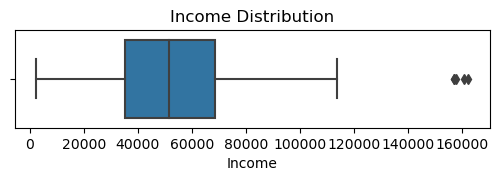

In [55]:
fig = plt.figure(figsize=(10,20)) # horizontal, vertikal
plt.subplot(13,2,count)
sns.boxplot(dfClean, x = 'Income')
fig.tight_layout() # biar tidak tertumpuk
plt.title('Income Distribution')
plt.show()

In [56]:
stat, pval = stats.normaltest(dfClean['Income'].dropna())
if pval > 0.05:
    print('The Data is Distributed normally')
else:
    print('The Data is not normally Distributed')

The Data is not normally Distributed


The normality test concludes that the data is **Not-Normally** distributed because of pval < 0.05 

In [57]:
incomeMissing[['ID','Year_Birth','Age','Education','Marital_Status']].sort_values(by='Age')

ID  Year_Birth  Age Education Marital_Status
312    2437        1989   25  Bachelor        Married
27     5255        1986   28  Bachelor         Single
10     1994        1983   31  Bachelor        Married
58     8557        1982   32  Bachelor         Single
2061   1612        1981   33  Doctoral         Single
2228   8720        1978   36    Master        Married
71    10629        1973   41    Master        Married
92     5798        1973   41    Master        Married
1386   3769        1972   42  Doctoral        Married
2078   5079        1971   43  Bachelor        Married
319    2863        1970   44  Bachelor         Single
1379  10475        1970   44    Master        Married
2059   7187        1969   45    Master        Married
1383   4345        1964   50    Master         Single
133    1295        1963   51  Bachelor        Married
128    8268        1961   53  Doctoral        Married
43     7281        1959   55  Doctoral         Single
1382   2902        1958   56  Bachelor        Married
91     9235        1957   57  Bachelor         Single
90     8996        1957   57  Doctoral        Married
2081   3117        1955   59  Bachelor         Single
2079  10339        1954   60    Master        Married
48     7244        1951   63  Bachelor         Single
2084   5250        1943   71    Master       Divorced

In [58]:
fillnaMedian = dfClean.groupby(['Education','Marital_Status'])[['Income']].median()
fillnaMedian

Income
Education    Marital_Status         
Bachelor     Divorced        55686.0
             Married         51651.0
             Single          49980.0
Doctoral     Divorced        54657.5
             Married         56937.0
             Single          48918.0
Master       Divorced        51390.0
             Married         49611.5
             Single          49504.0
Non-Graduate Divorced        15835.5
             Married         23179.0
             Single          16383.0

In [59]:
for i in dfClean[dfClean['Income'].isna()].index :
    dfClean['Income'][i] = fillnaMedian.loc[[(dfClean['Education'][i],dfClean['Marital_Status'][i])],'Income'].values

C:\Users\Orion\AppData\Local\Temp\ipykernel_17076\1739359582.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfClean['Income'][i] = fillnaMedian.loc[[(dfClean['Education'][i],dfClean['Marital_Status'][i])],'Income'].values
C:\Users\Orion\AppData\Local\Temp\ipykernel_17076\1739359582.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfClean['Income'][i] = fillnaMedian.loc[[(dfClean['Education'][i],dfClean['Marital_Status'][i])],'Income'].values
C:\Users\Orion\AppData\Local\Temp\ipykernel_17076\1739359582.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the cavea

<Axes: >

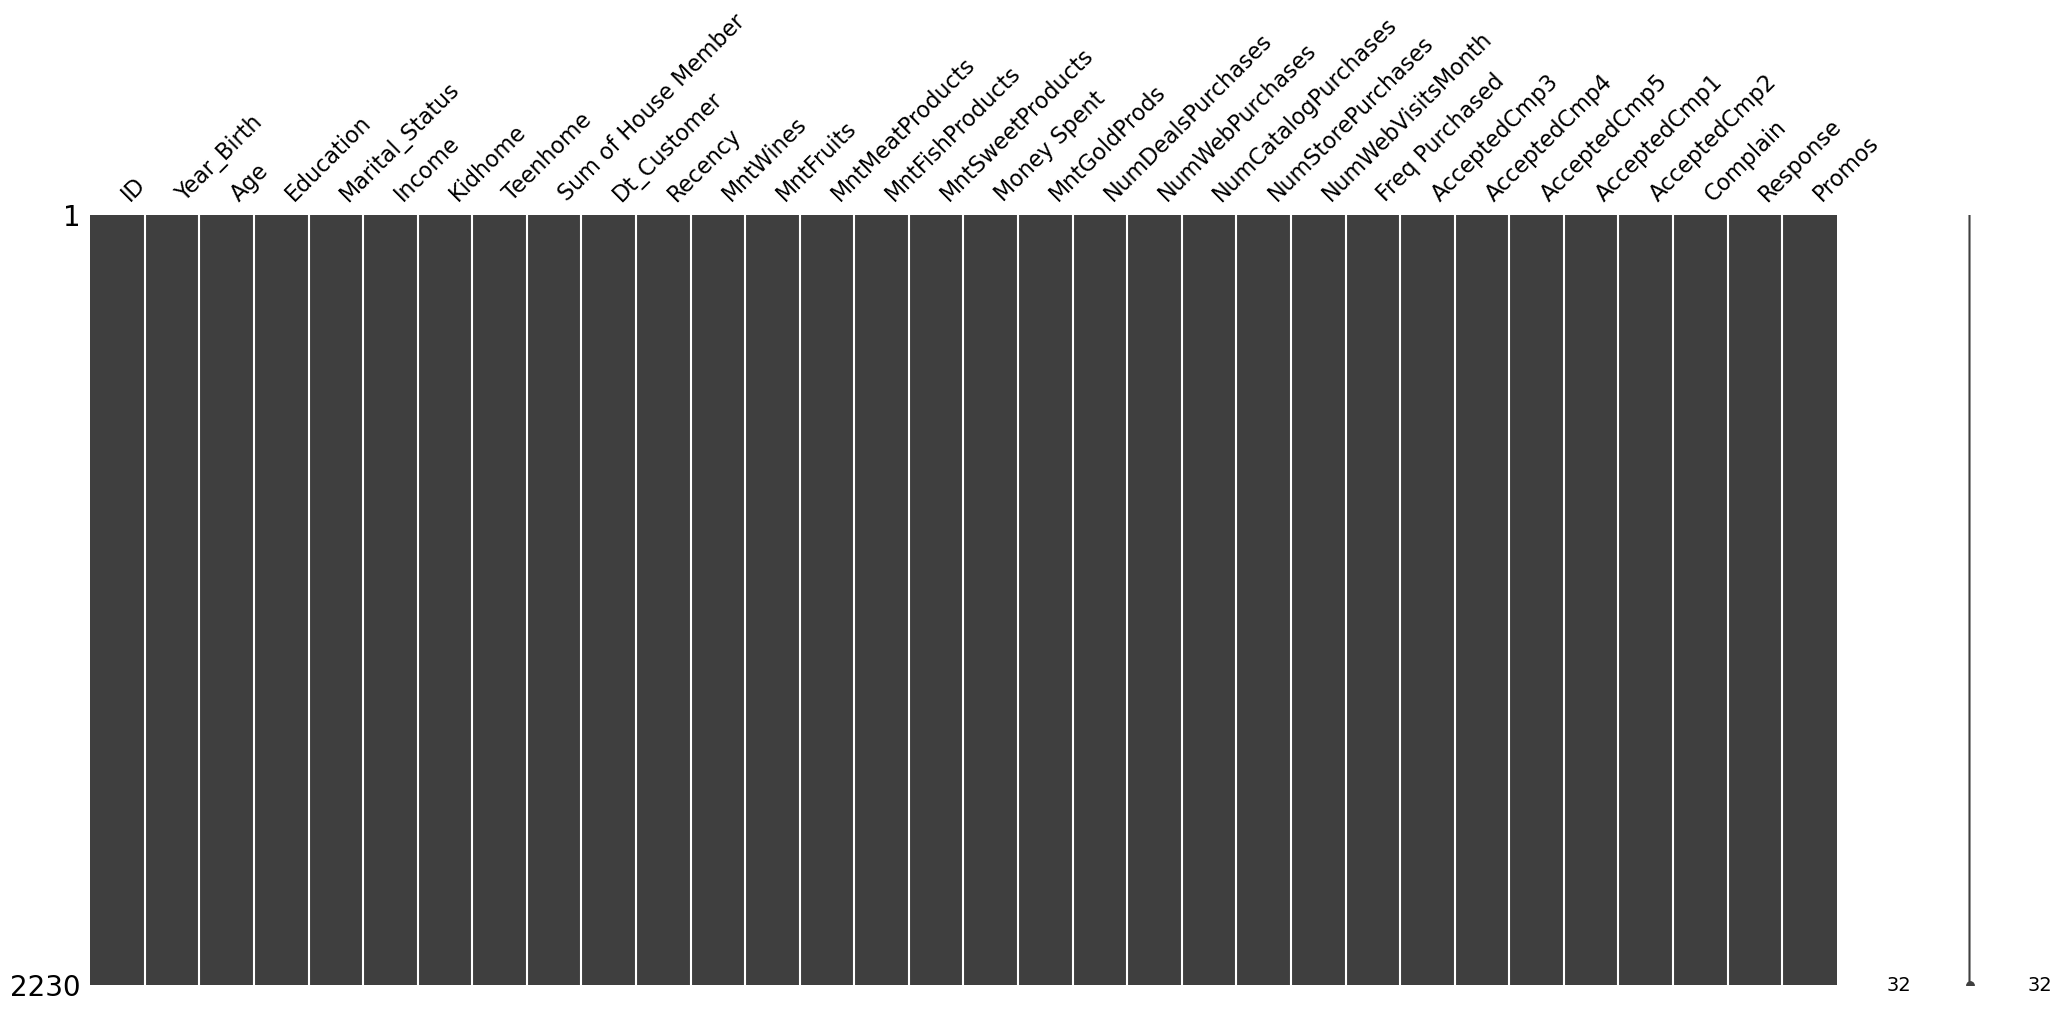

In [60]:
msno.matrix(dfClean)

## Data Cleaning Summary

* Telah mengubah tipe data 'Dt Customer' menjadi tipe data date time
* Drop kolom 'Z_CostContact' dan 'Z_Revenue' karena tidak dibutuhkan
* Memperbaiki unique pada kolom 'Marital_Status' dan 'Education' (Absurd, Yolo, dll) 
* Membuat kolom baru ('Age', 'Sum of House Member', 'Money Spent', 'Freq Purchased', dan 'Promos')
* melakukakan drop pada baris abnormal berdasarkan kolom 'Freq Purchased'
* melakukakan drop pada outliers berdasarkan kolom 'Age'
* melakukakan drop pada outliers berdasarkan kolom 'Income'
* memenuhi missing values pada kolom 'Income' dengan memasukkan median sesuai dengan kategori 'Education' dan 'Marital_Status' Customer lainnya

In [61]:
dfCleaned = pd.DataFrame(dfClean)
csv = 'dfCleaned.csv'
dfCleaned.to_csv('dfCleaned.csv', index=False)

# EDA (Exploratory Data Analysis)

## Read Cleaned Data

In [62]:
data = pd.read_csv('dfCleaned.csv')
data

ID  Year_Birth  Age Education Marital_Status   Income  Kidhome  \
0      5524        1957   57  Bachelor         Single  58138.0        0   
1      2174        1954   60  Bachelor         Single  46344.0        1   
2      4141        1965   49  Bachelor        Married  71613.0        0   
3      6182        1984   30  Bachelor        Married  26646.0        1   
4      5324        1981   33  Doctoral        Married  58293.0        1   
...     ...         ...  ...       ...            ...      ...      ...   
2225  10870        1967   47  Bachelor        Married  61223.0        0   
2226   4001        1946   68  Doctoral        Married  64014.0        2   
2227   7270        1981   33  Bachelor       Divorced  56981.0        0   
2228   8235        1956   58    Master        Married  69245.0        0   
2229   9405        1954   60  Doctoral        Married  52869.0        1   

      Teenhome  Sum of House Member Dt_Customer  ...  NumWebVisitsMonth  \
0            0                    1  2012-09-04  ...                  7   
1            1                    3  2014-03-08  ...                  5   
2            0                    2  2013-08-21  ...                  4   
3            0                    3  2014-02-10  ...                  6   
4            0                    3  2014-01-19  ...                  5   
...        ...                  ...         ...  ...                ...   
2225         1                    3  2013-06-13  ...                  5   
2226         1                    5  2014-06-10  ...                  7   
2227         0                    1  2014-01-25  ...                  6   
2228         1                    3  2014-01-24  ...                  3   
2229         1                    4  2012-10-15  ...                  7   

      Freq Purchased  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  \
0                 22             0             0             0             0   
1                  4             0             0             0             0   
2                 20             0             0             0             0   
3                  6             0             0             0             0   
4                 14             0             0             0             0   
...              ...           ...           ...           ...           ...   
2225              16             0             0             0             0   
2226              15             0             0             0             1   
2227              18             0             1             0             0   
2228              21             0             0             0             0   
2229               8             0             0             0             0   

      AcceptedCmp2  Complain  Response  Promos  
0                0         0         1       1  
1                0         0         0       0  
2                0         0         0       0  
3                0         0         0       0  
4                0         0         0       0  
...            ...       ...       ...     ...  
2225             0         0         0       0  
2226             0         0         0       1  
2227             0         0         0       1  
2228             0         0         0       0  
2229             0         0         1       1  

[2230 rows x 32 columns]

## Basic Exploration
This Sub-Section consist of basic exploration of the data. the purpose of this subsection is to explore more of the data, and explore it deeper to find the insights

### General

In [63]:
data.value_counts(subset=['Education','Marital_Status','Sum of House Member']).head(10)

Education  Marital_Status  Sum of House Member
Bachelor   Married         3                      373
Master     Married         3                      194
Bachelor   Married         2                      191
Doctoral   Married         3                      160
Bachelor   Married         4                      138
           Single          2                      127
Master     Married         2                      101
Bachelor   Single          1                       87
Master     Married         4                       81
Bachelor   Divorced        2                       77
Name: count, dtype: int64

### Education

In [64]:
Edu = data.value_counts(subset='Education').reset_index()
Edu

Education  count
0      Bachelor   1122
1        Master    571
2      Doctoral    483
3  Non-Graduate     54

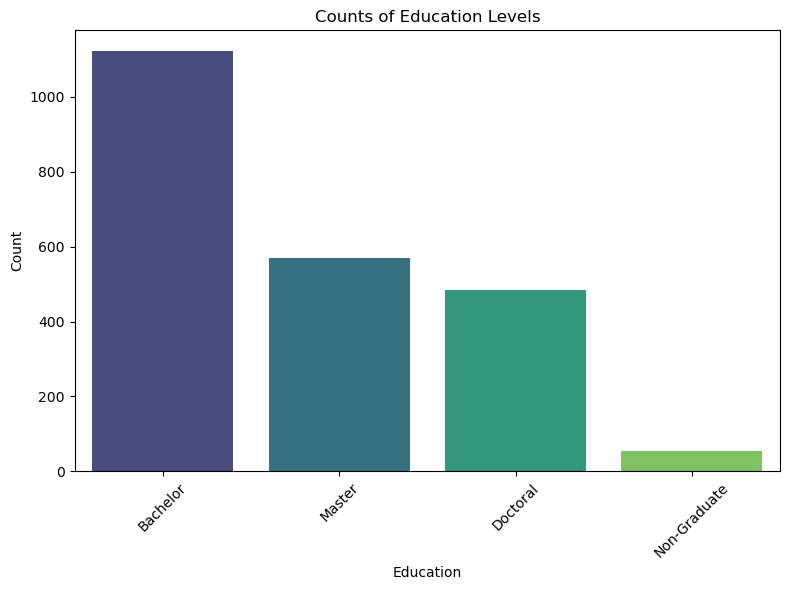

In [65]:
plt.figure(figsize=(8, 6))
sns.barplot(Edu, x=Edu['Education'], y=Edu['count'], palette='viridis')
plt.title('Counts of Education Levels')
plt.xlabel('Education')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Bachelor is the most supermarket customer's education

### Marital Status

In [66]:
Marry = data.value_counts(subset='Marital_Status').reset_index()
Marry

Marital_Status  count
0        Married   1440
1         Single    485
2       Divorced    305

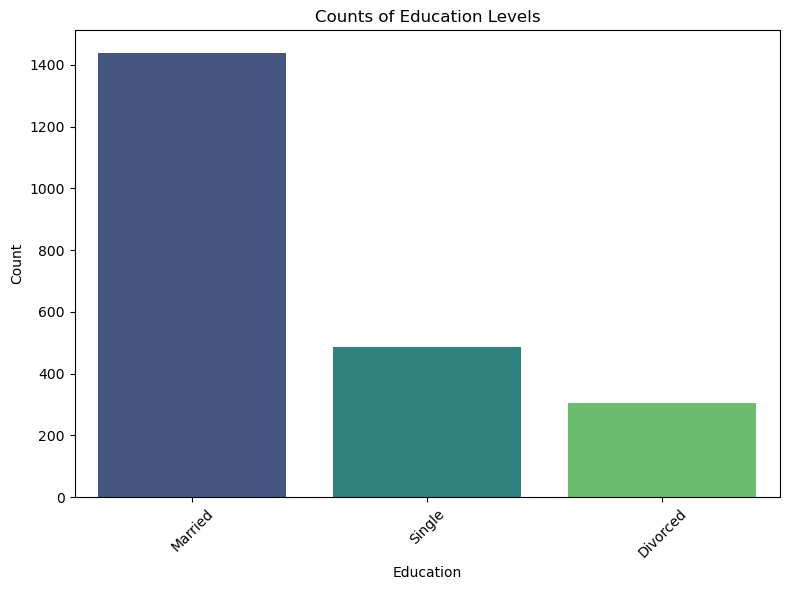

In [67]:
plt.figure(figsize=(8, 6))
sns.barplot(Marry, x=Marry['Marital_Status'], y=Marry['count'], palette='viridis')
plt.title('Counts of Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

married is the most supermarket customer's Marital Status

### Education and Marital Status

with Married is the most marital status, and bachelor is the most education, combine each other category ('Education', and 'Marital_Status') to find the most customers Education and Marital Status

In [68]:
eduVSmarry = data.value_counts(subset=['Education','Marital_Status'])
eduVSmarry

Education     Marital_Status
Bachelor      Married           718
Master        Married           382
Doctoral      Married           306
Bachelor      Single            253
              Divorced          151
Master        Single            113
Doctoral      Single            101
              Divorced           76
Master        Divorced           76
Non-Graduate  Married            34
              Single             18
              Divorced            2
Name: count, dtype: int64

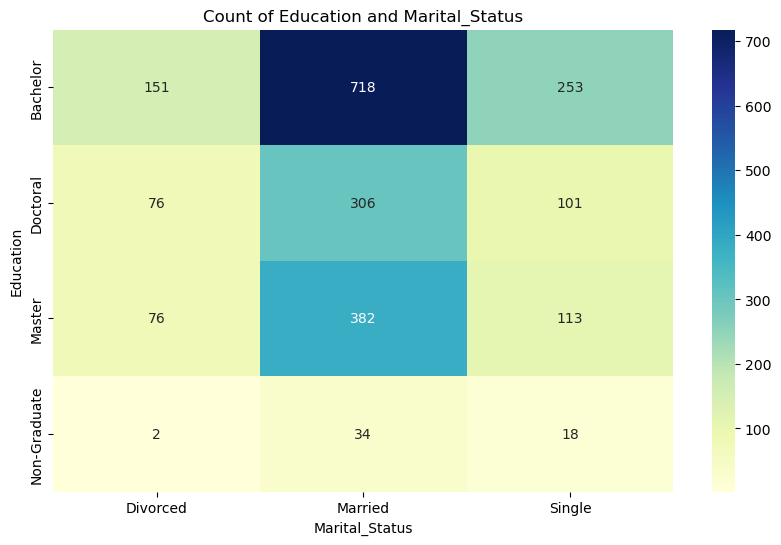

In [69]:
basic1 = pd.DataFrame(list(eduVSmarry.items()), columns=['Edu-Marital_Status', 'count'])
basic1[['Education', 'Marital_Status']] = pd.DataFrame(basic1['Edu-Marital_Status'].tolist(), index=basic1.index)
basic1.drop(columns=['Edu-Marital_Status'], inplace=True)

pivotTableEduVSMarry = basic1.pivot_table(index='Education', columns='Marital_Status', values='count', fill_value=0)

plt.figure(figsize=(10, 6))
sns.heatmap(pivotTableEduVSMarry, annot=True, cmap="YlGnBu", fmt="d")
plt.title('Count of Education and Marital_Status')
plt.xlabel('Marital_Status')
plt.ylabel('Education')
plt.show()

Married Bachelor is the most category, followed by Married Master Degree Customer

### Sum of House Member

See how sum of house member affected the frequency of shopping

In [70]:
data.value_counts(subset='Sum of House Member',sort=False)

Sum of House Member
1    251
2    759
3    888
4    300
5     32
Name: count, dtype: int64

### Promos

In [71]:
data.value_counts(subset='Promos',sort=False)

Promos
0    1622
1     369
2     142
3      51
4      36
5      10
Name: count, dtype: int64

In [72]:
data.value_counts(subset='NumWebVisitsMonth',sort=False)

NumWebVisitsMonth
0       9
1     152
2     202
3     205
4     217
5     280
6     339
7     393
8     342
9      83
10      3
13      1
17      1
19      1
20      2
Name: count, dtype: int64

### Purchase Location

In [73]:
data.value_counts(subset='NumWebPurchases',sort=False)

NumWebPurchases
0      43
1     353
2     372
3     335
4     279
5     220
6     205
7     155
8     102
9      75
10     43
11     44
23      1
25      1
27      2
Name: count, dtype: int64

In [74]:
data.value_counts(subset='NumCatalogPurchases',sort=False)

NumCatalogPurchases
0     579
1     495
2     276
3     184
4     182
5     140
6     127
7      79
8      55
9      42
10     48
11     19
22      1
28      3
Name: count, dtype: int64

In [75]:
data.value_counts(subset='NumStorePurchases',sort=False)

NumStorePurchases
0       9
1       7
2     221
3     489
4     322
5     212
6     178
7     143
8     149
9     106
10    125
11     81
12    105
13     83
Name: count, dtype: int64

### Basic Exploration Summary

From this basic exploration, 
* Most Supermarket Visitor's Education is **Bachelor** and the Most Supermarket Visitor Marital Status is **Married people**
    * Objectives = Find The Effect of the **Married-Bachelor**
* Most Supermarket Visitor have 3 family member inside their house
    * Objectives = Did the sum of family/house member affected
* Not more than half of the supermarket visitor used the promos atleast once
    * Objectives = How much does the promo influents the customers
* The customers love to shop in the **store** instead of web and catalog

## RFM (Recency, Frequency, Monetary) Analysis

### Create RFM Table

#### Recency

In [76]:
currentDate = data['Dt_Customer'].max()
currentDate

'2014-06-29'

In [77]:
rfm = data[['ID','Recency']]
rfm

ID  Recency
0      5524       58
1      2174       38
2      4141       26
3      6182       26
4      5324       94
...     ...      ...
2225  10870       46
2226   4001       56
2227   7270       91
2228   8235        8
2229   9405       40

[2230 rows x 2 columns]

#### Frequency

In [78]:
rfm.insert(2, 'Frequency', data['Freq Purchased'])
rfm

ID  Recency  Frequency
0      5524       58         22
1      2174       38          4
2      4141       26         20
3      6182       26          6
4      5324       94         14
...     ...      ...        ...
2225  10870       46         16
2226   4001       56         15
2227   7270       91         18
2228   8235        8         21
2229   9405       40          8

[2230 rows x 3 columns]

#### Monetary

In [79]:
rfm.insert(3, 'Monetary', data['Money Spent']/data['Freq Purchased'])
rfm

ID  Recency  Frequency   Monetary
0      5524       58         22  73.500000
1      2174       38          4   6.750000
2      4141       26         20  38.800000
3      6182       26          6   8.833333
4      5324       94         14  30.142857
...     ...      ...        ...        ...
2225  10870       46         16  83.812500
2226   4001       56         15  29.600000
2227   7270       91         18  68.944444
2228   8235        8         21  40.142857
2229   9405       40          8  21.500000

[2230 rows x 4 columns]

### Data Visualization

In [80]:
rfm.describe()

ID      Recency    Frequency     Monetary
count   2230.000000  2230.000000  2230.000000  2230.000000
mean    5582.255157    49.097758    12.580269    38.201910
std     3243.317798    28.966377     7.186771    45.915579
min        0.000000     0.000000     1.000000     2.666667
25%     2817.750000    24.000000     6.000000    13.000000
50%     5447.000000    49.000000    12.000000    29.839744
75%     8417.500000    74.000000    18.000000    49.166667
max    11191.000000    99.000000    32.000000  1679.000000

#### Recency

<Axes: xlabel='Recency', ylabel='Count'>

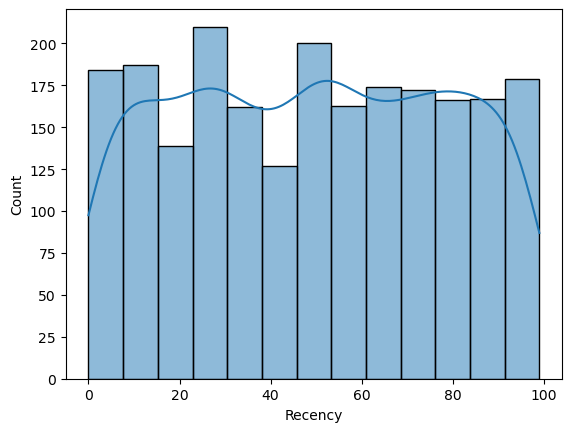

In [81]:
sns.histplot(rfm['Recency'], kde=True)

<Axes: xlabel='Recency'>

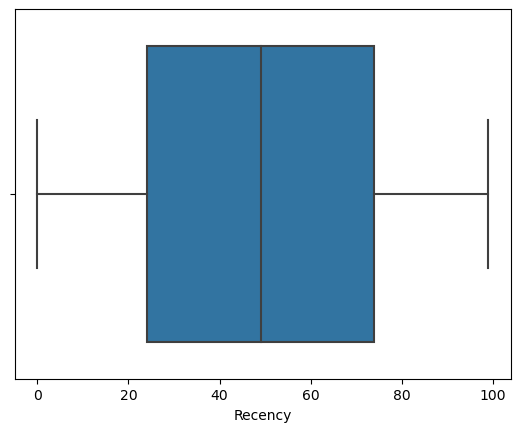

In [82]:
sns.boxplot(rfm, x = 'Recency')

#### Frequency

<Axes: xlabel='Frequency', ylabel='Count'>

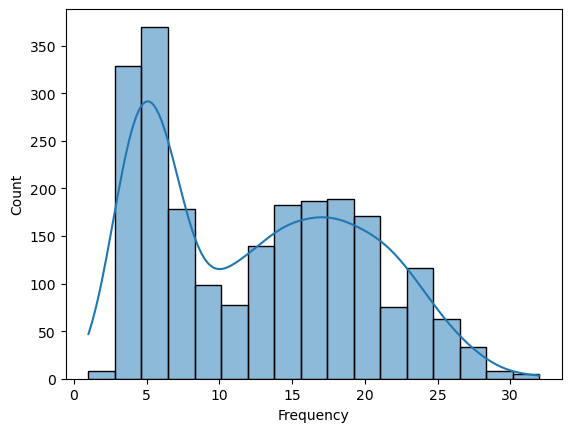

In [83]:
sns.histplot(rfm['Frequency'], kde=True)

<Axes: xlabel='Frequency'>

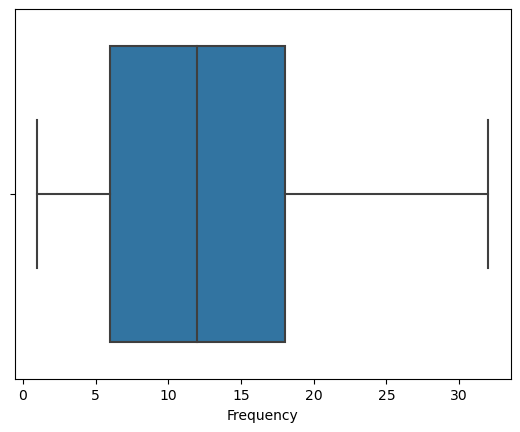

In [84]:
sns.boxplot(rfm, x = 'Frequency')

#### Monetary

<Axes: xlabel='Monetary', ylabel='Count'>

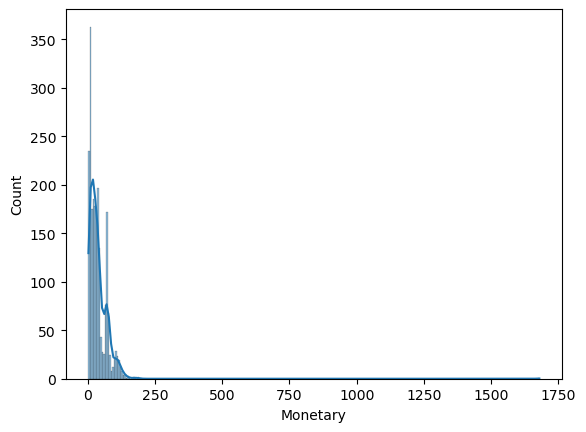

In [85]:
sns.histplot(rfm['Monetary'], kde=True)

<Axes: xlabel='Monetary'>

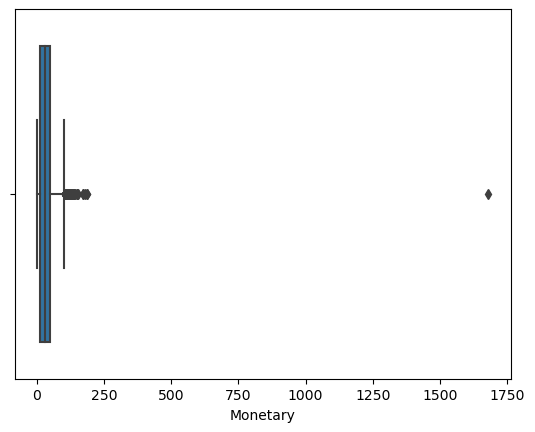

In [86]:
sns.boxplot(rfm, x = 'Monetary')

In [87]:
rfm.sort_values(by='Monetary',ascending=False)

ID  Recency  Frequency     Monetary
2219   8720       53          1  1679.000000
641    1173       73         12   187.666667
1322   4246        2          2   186.500000
1037  10749       62          1   178.000000
996    7962        1         11   172.818182
...     ...      ...        ...          ...
1676   7788       53          3     3.333333
178   10492       96          3     3.333333
1812   8566       10          3     3.000000
2121  10104       65          3     2.666667
1414   5824        1          3     2.666667

[2230 rows x 4 columns]

In [88]:
rfm.loc[2219]

ID           8720.0
Recency        53.0
Frequency       1.0
Monetary     1679.0
Name: 2219, dtype: float64

In [89]:
rfm.drop([2219],axis=0,inplace=True)
rfm

C:\Users\Orion\AppData\Local\Temp\ipykernel_17076\1750279834.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm.drop([2219],axis=0,inplace=True)


ID  Recency  Frequency   Monetary
0      5524       58         22  73.500000
1      2174       38          4   6.750000
2      4141       26         20  38.800000
3      6182       26          6   8.833333
4      5324       94         14  30.142857
...     ...      ...        ...        ...
2225  10870       46         16  83.812500
2226   4001       56         15  29.600000
2227   7270       91         18  68.944444
2228   8235        8         21  40.142857
2229   9405       40          8  21.500000

[2229 rows x 4 columns]

<Axes: xlabel='Monetary'>

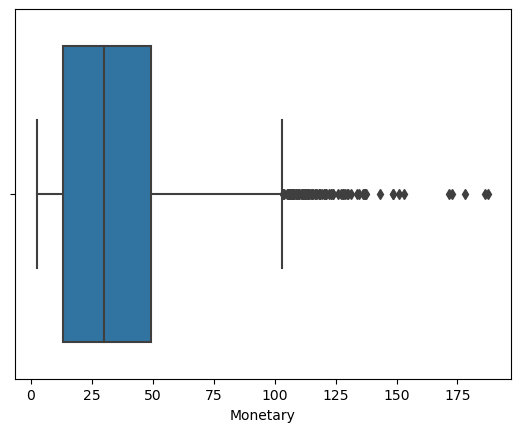

In [90]:
sns.boxplot(rfm, x = 'Monetary')

### RFM Segmentation

In [91]:
rfm.describe()

ID      Recency    Frequency     Monetary
count   2229.000000  2229.000000  2229.000000  2229.000000
mean    5580.847465    49.096007    12.585464    37.465796
std     3243.364106    28.972759     7.184194    30.004799
min        0.000000     0.000000     1.000000     2.666667
25%     2815.000000    24.000000     6.000000    13.000000
50%     5441.000000    49.000000    12.000000    29.833333
75%     8416.000000    74.000000    18.000000    49.166667
max    11191.000000    99.000000    32.000000   187.666667

In [92]:
def rfmRecency(baris):
    if baris['Recency'] <= 20:
        rScore = 5
    elif (baris['Recency'] >= 20) and (baris['Recency'] <= 40): 
        rScore = 4
    elif (baris['Recency'] >= 40) and (baris['Recency'] <= 60): 
        rScore = 3
    elif (baris['Recency'] >= 60) and (baris['Recency'] <= 80): 
        rScore = 2
    elif baris['Recency'] > 80: 
        rScore = 1

    return str(rScore)

rfm['R Score'] = rfm.apply(rfmRecency, axis=1)
rfm

C:\Users\Orion\AppData\Local\Temp\ipykernel_17076\2612316788.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm['R Score'] = rfm.apply(rfmRecency, axis=1)


ID  Recency  Frequency   Monetary R Score
0      5524       58         22  73.500000       3
1      2174       38          4   6.750000       4
2      4141       26         20  38.800000       4
3      6182       26          6   8.833333       4
4      5324       94         14  30.142857       1
...     ...      ...        ...        ...     ...
2225  10870       46         16  83.812500       3
2226   4001       56         15  29.600000       3
2227   7270       91         18  68.944444       1
2228   8235        8         21  40.142857       5
2229   9405       40          8  21.500000       4

[2229 rows x 5 columns]

In [93]:
def rfmFrequency(baris):
    if baris['Frequency'] <= 6: #sebenernya bisa diisi sesuai kebutuhan
        fScore = 1
    elif (baris['Frequency'] >= 6) and (baris['Frequency'] <= 12):
        fScore = 2
    elif (baris['Frequency'] >= 12) and (baris['Frequency'] <= 18):
        fScore = 3
    elif (baris['Frequency'] >= 18) and (baris['Frequency'] <= 24):
        fScore = 4
    elif baris['Frequency'] >24 :
        fScore = 5
           
    return str(fScore)

rfm['F Score'] = rfm.apply(rfmFrequency, axis=1)
rfm

C:\Users\Orion\AppData\Local\Temp\ipykernel_17076\3193062711.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm['F Score'] = rfm.apply(rfmFrequency, axis=1)


ID  Recency  Frequency   Monetary R Score F Score
0      5524       58         22  73.500000       3       4
1      2174       38          4   6.750000       4       1
2      4141       26         20  38.800000       4       4
3      6182       26          6   8.833333       4       1
4      5324       94         14  30.142857       1       3
...     ...      ...        ...        ...     ...     ...
2225  10870       46         16  83.812500       3       3
2226   4001       56         15  29.600000       3       3
2227   7270       91         18  68.944444       1       3
2228   8235        8         21  40.142857       5       4
2229   9405       40          8  21.500000       4       2

[2229 rows x 6 columns]

In [94]:
def rfmMonetary(baris):
    
    if baris['Monetary'] <= 25:
        mScore = 1
    elif (baris['Monetary'] >= 25) and (baris['Monetary'] <= 50):
        mScore = 2
    elif (baris['Monetary'] >= 50) and (baris['Monetary'] <= 75):
        mScore = 3
    elif (baris['Monetary'] >= 75) and (baris['Monetary'] <= 100):
        mScore = 4
    elif baris['Monetary'] > 100:
        mScore = 5
    return str(mScore)

rfm['M Score'] = rfm.apply(rfmMonetary, axis=1)
rfm


C:\Users\Orion\AppData\Local\Temp\ipykernel_17076\1594696548.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm['M Score'] = rfm.apply(rfmMonetary, axis=1)


ID  Recency  Frequency   Monetary R Score F Score M Score
0      5524       58         22  73.500000       3       4       3
1      2174       38          4   6.750000       4       1       1
2      4141       26         20  38.800000       4       4       2
3      6182       26          6   8.833333       4       1       1
4      5324       94         14  30.142857       1       3       2
...     ...      ...        ...        ...     ...     ...     ...
2225  10870       46         16  83.812500       3       3       4
2226   4001       56         15  29.600000       3       3       2
2227   7270       91         18  68.944444       1       3       3
2228   8235        8         21  40.142857       5       4       2
2229   9405       40          8  21.500000       4       2       1

[2229 rows x 7 columns]

In [95]:
rfm.sort_values(by=['R Score','F Score','M Score'],ascending=False)

ID  Recency  Frequency   Monetary R Score F Score M Score
1452  10133       16         25  93.960000       5       5       4
51     4114        2         28  60.464286       5       5       3
161    9260       20         25  68.240000       5       5       3
1148   5031       14         25  73.320000       5       5       3
1314   1650       13         26  63.192308       5       5       3
...     ...      ...        ...        ...     ...     ...     ...
2156   9706       98          6  15.666667       1       1       1
2173   3266       96          6  20.833333       1       1       1
2206    692       88          3   5.333333       1       1       1
2221   7004       82          6  14.000000       1       1       1
2224   8372       81          3  10.000000       1       1       1

[2229 rows x 7 columns]

### RFM Score

In [96]:
def rfmScore(baris):
    # Recency
    if baris['Recency'] <= 20:
        rScore = 5
    elif (baris['Recency'] >= 20) and (baris['Recency'] <= 40): 
        rScore = 4
    elif (baris['Recency'] >= 40) and (baris['Recency'] <= 60): 
        rScore = 3
    elif (baris['Recency'] >= 60) and (baris['Recency'] <= 80): 
        rScore = 2
    elif baris['Recency'] > 80: #75-100%
        rScore = 1
    
    # Frequency
    if baris['Frequency'] <= 6: #sebenernya bisa diisi sesuai kebutuhan
        fScore = 1
    elif (baris['Frequency'] >= 6) and (baris['Frequency'] <= 12):
        fScore = 2
    elif (baris['Frequency'] >= 12) and (baris['Frequency'] <= 18):
        fScore = 3
    elif (baris['Frequency'] >= 18) and (baris['Frequency'] <= 24):
        fScore = 4
    elif baris['Frequency'] >24 :
        fScore = 5

    # Frequency
    if baris['Monetary'] <= 25:
        mScore = 1
    elif (baris['Monetary'] >= 25) and (baris['Monetary'] <= 50):
        mScore = 2
    elif (baris['Monetary'] >= 50) and (baris['Monetary'] <= 75):
        mScore = 3
    elif (baris['Monetary'] >= 75) and (baris['Monetary'] <= 100):
        mScore = 4
    elif baris['Monetary'] > 100:
        mScore = 5
    
    return rScore + fScore + mScore

rfm['RFM Score'] = rfm.apply(rfmScore, axis=1)
rfm

C:\Users\Orion\AppData\Local\Temp\ipykernel_17076\4232879171.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm['RFM Score'] = rfm.apply(rfmScore, axis=1)


ID  Recency  Frequency   Monetary R Score F Score M Score  RFM Score
0      5524       58         22  73.500000       3       4       3         10
1      2174       38          4   6.750000       4       1       1          6
2      4141       26         20  38.800000       4       4       2         10
3      6182       26          6   8.833333       4       1       1          6
4      5324       94         14  30.142857       1       3       2          6
...     ...      ...        ...        ...     ...     ...     ...        ...
2225  10870       46         16  83.812500       3       3       4         10
2226   4001       56         15  29.600000       3       3       2          8
2227   7270       91         18  68.944444       1       3       3          7
2228   8235        8         21  40.142857       5       4       2         11
2229   9405       40          8  21.500000       4       2       1          7

[2229 rows x 8 columns]

In [97]:
rfm.sort_values(by='RFM Score',ascending=False)

ID  Recency  Frequency    Monetary R Score F Score M Score  RFM Score
540    5547        9         19  101.000000       5       4       5         14
516    3711       19         19  100.105263       5       4       5         14
1452  10133       16         25   93.960000       5       5       4         14
487    3403       11         19  110.105263       5       4       5         14
1079   6072       16         19  109.842105       5       4       5         14
...     ...      ...        ...         ...     ...     ...     ...        ...
2046   6382       97          4   13.500000       1       1       1          3
1705   2202       98          5   13.800000       1       1       1          3
1527   3745       92          6   17.166667       1       1       1          3
2053   1612       82          6    7.833333       1       1       1          3
2030   6568       97          5   15.800000       1       1       1          3

[2229 rows x 8 columns]

In [98]:
rfm[['RFM Score']].value_counts()

RFM Score
7            349
8            284
6            275
9            253
10           231
5            211
4            187
11           170
3            130
12            88
13            45
14             6
Name: count, dtype: int64

<Axes: xlabel='RFM Score', ylabel='Count'>

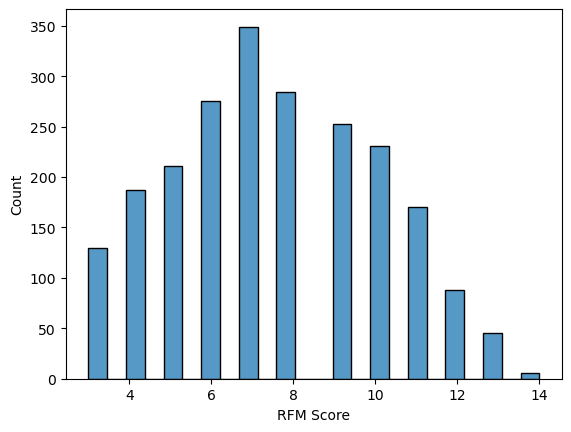

In [99]:
sns.histplot(rfm['RFM Score'])

#### Customer Ranks / Segmentation Based on RFM Score

In [100]:
def rfmLevel(baris):
    if baris['RFM Score'] >= 13: #13,14
        return '1. Platinum-Member'
    elif (baris['RFM Score'] == 11) or (baris['RFM Score'] == 12): #11,12
        return '2. Gold-Member'
    elif (baris['RFM Score'] == 9) or (baris['RFM Score'] == 10 ): #9,10
        return '3. Silver-Member'
    elif (baris['RFM Score'] == 7) or (baris['RFM Score'] == 8): #7,8
        return '4. Bronze-Member'
    elif (baris['RFM Score'] == 5) or (baris['RFM Score'] == 6): #5,6
        return '5. Common-Member'
    else:
        return '6. Need Attention' #3,4


rfm['RFM Level']= rfm.apply(rfmLevel, axis = 1)
rfm

C:\Users\Orion\AppData\Local\Temp\ipykernel_17076\3843575131.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm['RFM Level']= rfm.apply(rfmLevel, axis = 1)


ID  Recency  Frequency   Monetary R Score F Score M Score  RFM Score  \
0      5524       58         22  73.500000       3       4       3         10   
1      2174       38          4   6.750000       4       1       1          6   
2      4141       26         20  38.800000       4       4       2         10   
3      6182       26          6   8.833333       4       1       1          6   
4      5324       94         14  30.142857       1       3       2          6   
...     ...      ...        ...        ...     ...     ...     ...        ...   
2225  10870       46         16  83.812500       3       3       4         10   
2226   4001       56         15  29.600000       3       3       2          8   
2227   7270       91         18  68.944444       1       3       3          7   
2228   8235        8         21  40.142857       5       4       2         11   
2229   9405       40          8  21.500000       4       2       1          7   

             RFM Level  
0     3. Silver-Member  
1     5. Common-Member  
2     3. Silver-Member  
3     5. Common-Member  
4     5. Common-Member  
...                ...  
2225  3. Silver-Member  
2226  4. Bronze-Member  
2227  4. Bronze-Member  
2228    2. Gold-Member  
2229  4. Bronze-Member  

[2229 rows x 9 columns]

In [101]:
jumlahRFMLevel = rfm['RFM Level'].value_counts()
jumlahRFMLevel

RFM Level
4. Bronze-Member      633
5. Common-Member      486
3. Silver-Member      484
6. Need Attention     317
2. Gold-Member        258
1. Platinum-Member     51
Name: count, dtype: int64

In [102]:
persentaseRFMLevel = rfm['RFM Level'].value_counts()/len(rfm)*100
persentaseRFMLevel

RFM Level
4. Bronze-Member      28.398385
5. Common-Member      21.803499
3. Silver-Member      21.713773
6. Need Attention     14.221624
2. Gold-Member        11.574697
1. Platinum-Member     2.288022
Name: count, dtype: float64

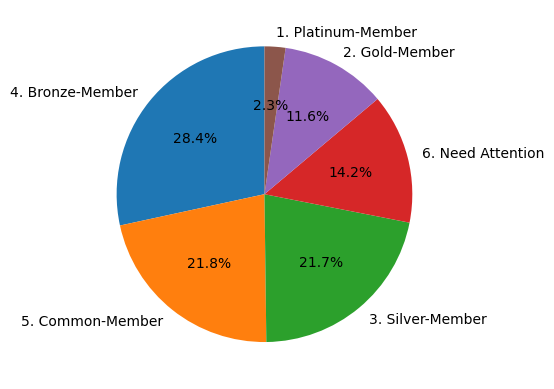

In [103]:
rfmCounts = rfm['RFM Level'].value_counts()
plt.pie(rfmCounts, labels = rfmCounts.index, autopct='%1.1f%%', startangle= 90)

plt.show()

### Analysis Based on RFM Segment

create a dataframe consist of 'data' dataset an 

In [104]:
dataRfm =pd.merge(data, rfm, on= 'ID', how='inner')
dataRfm.drop(['Recency_y'],axis=1,inplace=True)
dataRfm

ID  Year_Birth  Age Education Marital_Status   Income  Kidhome  \
0      5524        1957   57  Bachelor         Single  58138.0        0   
1      2174        1954   60  Bachelor         Single  46344.0        1   
2      4141        1965   49  Bachelor        Married  71613.0        0   
3      6182        1984   30  Bachelor        Married  26646.0        1   
4      5324        1981   33  Doctoral        Married  58293.0        1   
...     ...         ...  ...       ...            ...      ...      ...   
2224  10870        1967   47  Bachelor        Married  61223.0        0   
2225   4001        1946   68  Doctoral        Married  64014.0        2   
2226   7270        1981   33  Bachelor       Divorced  56981.0        0   
2227   8235        1956   58    Master        Married  69245.0        0   
2228   9405        1954   60  Doctoral        Married  52869.0        1   

      Teenhome  Sum of House Member Dt_Customer  ...  Complain  Response  \
0            0                    1  2012-09-04  ...         0         1   
1            1                    3  2014-03-08  ...         0         0   
2            0                    2  2013-08-21  ...         0         0   
3            0                    3  2014-02-10  ...         0         0   
4            0                    3  2014-01-19  ...         0         0   
...        ...                  ...         ...  ...       ...       ...   
2224         1                    3  2013-06-13  ...         0         0   
2225         1                    5  2014-06-10  ...         0         0   
2226         0                    1  2014-01-25  ...         0         0   
2227         1                    3  2014-01-24  ...         0         0   
2228         1                    4  2012-10-15  ...         0         1   

      Promos  Frequency   Monetary  R Score  F Score  M Score  RFM Score  \
0          1         22  73.500000        3        4        3         10   
1          0          4   6.750000        4        1        1          6   
2          0         20  38.800000        4        4        2         10   
3          0          6   8.833333        4        1        1          6   
4          0         14  30.142857        1        3        2          6   
...      ...        ...        ...      ...      ...      ...        ...   
2224       0         16  83.812500        3        3        4         10   
2225       1         15  29.600000        3        3        2          8   
2226       1         18  68.944444        1        3        3          7   
2227       0         21  40.142857        5        4        2         11   
2228       1          8  21.500000        4        2        1          7   

             RFM Level  
0     3. Silver-Member  
1     5. Common-Member  
2     3. Silver-Member  
3     5. Common-Member  
4     5. Common-Member  
...                ...  
2224  3. Silver-Member  
2225  4. Bronze-Member  
2226  4. Bronze-Member  
2227    2. Gold-Member  
2228  4. Bronze-Member  

[2229 rows x 39 columns]

In [106]:
pctgRFMSeg = (dataRfm.value_counts(subset=['R Score','F Score','M Score']) / len(dataRfm) *100)
pctgRFMSeg

R Score  F Score  M Score
5        1        1          6.908928
4        1        1          6.370570
3        1        1          6.280843
2        1        1          5.966801
1        1        1          5.832212
                               ...   
2        5        4          0.044863
         4        1          0.044863
1        5        1          0.044863
2        2        3          0.044863
5        5        4          0.044863
Name: count, Length: 92, dtype: float64

In [107]:
pctgRFMSeg.count()

92

In [108]:
dataRfm.value_counts(subset=['Education','R Score','F Score','M Score'])

Education     R Score  F Score  M Score
Bachelor      1        1        1          72
              2        1        1          71
              4        1        1          69
              5        1        1          64
              3        1        1          62
                                           ..
Doctoral      5        5        3           1
                                1           1
                       4        4           1
                       2        5           1
Non-Graduate  5        2        2           1
Name: count, Length: 233, dtype: int64

#### Frequency Based on Education and Marital Status

##### Bachelor

In [109]:
RFMEdu_Bach = dataRfm[(dataRfm['Education']=='Bachelor')] 
RFMEdu_Bach

ID  Year_Birth  Age Education Marital_Status   Income  Kidhome  \
0      5524        1957   57  Bachelor         Single  58138.0        0   
1      2174        1954   60  Bachelor         Single  46344.0        1   
2      4141        1965   49  Bachelor        Married  71613.0        0   
3      6182        1984   30  Bachelor        Married  26646.0        1   
6       965        1971   43  Bachelor       Divorced  55635.0        0   
...     ...         ...  ...       ...            ...      ...      ...   
2220   7004        1984   30  Bachelor         Single  11012.0        1   
2222   8080        1986   28  Bachelor         Single  26816.0        0   
2223   8372        1974   40  Bachelor        Married  34421.0        1   
2224  10870        1967   47  Bachelor        Married  61223.0        0   
2226   7270        1981   33  Bachelor       Divorced  56981.0        0   

      Teenhome  Sum of House Member Dt_Customer  ...  Complain  Response  \
0            0                    1  2012-09-04  ...         0         1   
1            1                    3  2014-03-08  ...         0         0   
2            0                    2  2013-08-21  ...         0         0   
3            0                    3  2014-02-10  ...         0         0   
6            1                    2  2012-11-13  ...         0         0   
...        ...                  ...         ...  ...       ...       ...   
2220         0                    2  2013-03-16  ...         0         0   
2222         0                    1  2012-08-17  ...         0         0   
2223         0                    3  2013-07-01  ...         0         0   
2224         1                    3  2013-06-13  ...         0         0   
2226         0                    1  2014-01-25  ...         0         0   

      Promos  Frequency   Monetary  R Score  F Score  M Score  RFM Score  \
0          1         22  73.500000        3        4        3         10   
1          0          4   6.750000        4        1        1          6   
2          0         20  38.800000        4        4        2         10   
3          0          6   8.833333        4        1        1          6   
6          0         17  34.705882        4        3        2          9   
...      ...        ...        ...      ...      ...      ...        ...   
2220       1          6  14.000000        1        1        1          3   
2222       0          3   7.333333        3        1        1          5   
2223       0          3  10.000000        1        1        1          3   
2224       0         16  83.812500        3        3        4         10   
2226       1         18  68.944444        1        3        3          7   

              RFM Level  
0      3. Silver-Member  
1      5. Common-Member  
2      3. Silver-Member  
3      5. Common-Member  
6      3. Silver-Member  
...                 ...  
2220  6. Need Attention  
2222   5. Common-Member  
2223  6. Need Attention  
2224   3. Silver-Member  
2226   4. Bronze-Member  

[1122 rows x 39 columns]

In [110]:
RFMEdu_Bach_5 = RFMEdu_Bach [(RFMEdu_Bach['F Score']=='5')]
RFMEdu_Bach_5.value_counts(subset='Marital_Status')

Marital_Status
Married     38
Divorced    10
Single       8
Name: count, dtype: int64

In [111]:
RFMEdu_Bach_4 = RFMEdu_Bach [(RFMEdu_Bach['F Score']=='4')]
RFMEdu_Bach_4.value_counts(subset='Marital_Status')

Marital_Status
Married     152
Single       45
Divorced     31
Name: count, dtype: int64

In [112]:
RFMEdu_Bach_3 = RFMEdu_Bach [(RFMEdu_Bach['F Score']=='3')]
RFMEdu_Bach_3.value_counts(subset='Marital_Status')

Marital_Status
Married     168
Single       74
Divorced     40
Name: count, dtype: int64

In [113]:
RFMEdu_Bach_2 = RFMEdu_Bach [(RFMEdu_Bach['F Score']=='2')]
RFMEdu_Bach_2.value_counts(subset='Marital_Status')

Marital_Status
Married     139
Single       52
Divorced     25
Name: count, dtype: int64

In [114]:
RFMEdu_Bach_1 = RFMEdu_Bach [(RFMEdu_Bach['F Score']=='1')]
RFMEdu_Bach_1.value_counts(subset='Marital_Status')

Marital_Status
Married     221
Single       74
Divorced     45
Name: count, dtype: int64

In [115]:
mergedEduBach1 = pd.merge(RFMEdu_Bach_5.value_counts(subset='Marital_Status'), RFMEdu_Bach_4.value_counts(subset='Marital_Status'), on='Marital_Status', how='outer').merge(RFMEdu_Bach_3.value_counts(subset='Marital_Status'), on='Marital_Status', how='outer')
mergedEduBach1

count_x  count_y  count
Marital_Status                         
Married              38      152    168
Divorced             10       31     40
Single                8       45     74

In [116]:
mergedEduBach1.insert(3,'FScore == 2',RFMEdu_Bach_2.value_counts(subset='Marital_Status'))
mergedEduBach1.insert(4,'FScore == 1',RFMEdu_Bach_1.value_counts(subset='Marital_Status'))

In [117]:
mergedEduBach1

count_x  count_y  count  FScore == 2  FScore == 1
Marital_Status                                                   
Married              38      152    168          139          221
Divorced             10       31     40           25           45
Single                8       45     74           52           74

In [118]:
renamedBach = mergedEduBach1.rename(columns={'count_x':'FScore == 5','count_y':'FScore == 4','count':'FScore == 3'})

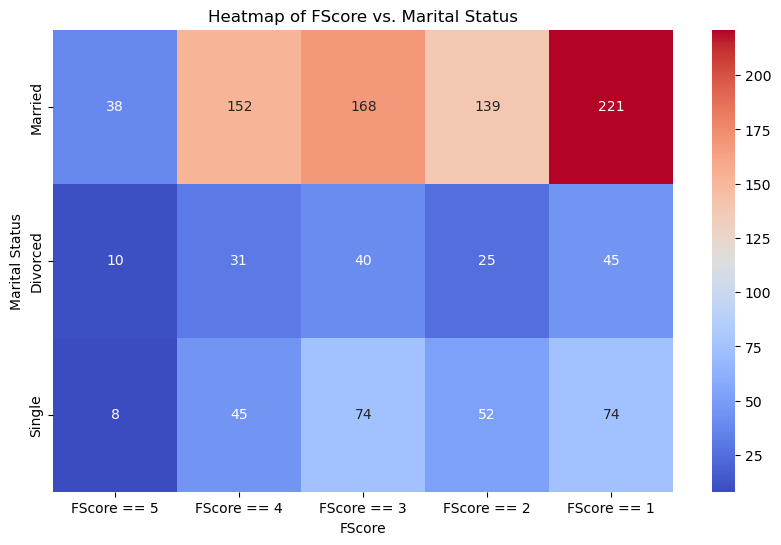

In [119]:
plt.figure(figsize=(10, 6))
sns.heatmap(renamedBach, annot=True, cmap='coolwarm', fmt='d', cbar=True)
plt.title('Heatmap of FScore vs. Marital Status')
plt.xlabel('FScore')
plt.ylabel('Marital Status')
plt.show()

##### Non-Graduate

In [120]:
RFMEdu_NG = dataRfm[(dataRfm['Education']=='Non-Graduate')] 
RFMEdu_NG.head(10)

ID  Year_Birth  Age     Education Marital_Status   Income  Kidhome  \
11    387        1976   38  Non-Graduate        Married   7500.0        0   
105  8373        1979   35  Non-Graduate        Married  24594.0        1   
136  5342        1976   38  Non-Graduate       Divorced   9548.0        1   
184  2563        1961   53  Non-Graduate        Married  28249.0        0   
190  9733        1978   36  Non-Graduate        Married  24882.0        1   
278  4669        1981   33  Non-Graduate        Married  24480.0        1   
341  8234        1973   41  Non-Graduate        Married  27190.0        1   
499  8151        1990   24  Non-Graduate        Married  24279.0        0   
605  2457        1975   39  Non-Graduate        Married  30801.0        0   
609  6682        1973   41  Non-Graduate        Married  18978.0        1   

     Teenhome  Sum of House Member Dt_Customer  ...  Complain  Response  \
11          0                    2  2012-11-13  ...         0         0   
105         0                    3  2013-12-10  ...         0         0   
136         0                    2  2012-08-08  ...         0         0   
184         0                    2  2014-06-15  ...         0         0   
190         0                    3  2012-09-09  ...         0         0   
278         0                    3  2013-02-11  ...         0         0   
341         0                    3  2013-08-15  ...         0         1   
499         0                    2  2012-12-29  ...         0         0   
605         1                    3  2012-10-26  ...         0         0   
609         0                    3  2012-12-11  ...         0         0   

     Promos  Frequency   Monetary  R Score  F Score  M Score  RFM Score  \
11        0          5  12.200000        3        1        1          5   
105       0          4   7.250000        1        1        1          3   
136       0          4   7.250000        4        1        1          6   
184       0          5   8.600000        2        1        1          4   
190       1          4  20.000000        3        1        1          5   
278       0          7  14.571429        3        2        1          6   
341       2          3   6.000000        5        1        1          7   
499       0          8  32.875000        5        2        2          9   
605       0          4  11.250000        4        1        1          6   
609       0          4   9.250000        3        1        1          5   

             RFM Level  
11    5. Common-Member  
105  6. Need Attention  
136   5. Common-Member  
184  6. Need Attention  
190   5. Common-Member  
278   5. Common-Member  
341   4. Bronze-Member  
499   3. Silver-Member  
605   5. Common-Member  
609   5. Common-Member  

[10 rows x 39 columns]

In [121]:
RFMEdu_NG_5 = RFMEdu_NG [(RFMEdu_NG['F Score']=='5')]
RFMEdu_NG_5.value_counts(subset='Marital_Status')

Series([], Name: count, dtype: int64)

In [122]:
RFMEdu_NG_4 = RFMEdu_NG [(RFMEdu_NG['F Score']=='4')]
RFMEdu_NG_4.value_counts(subset='Marital_Status')

Marital_Status
Married    1
Name: count, dtype: int64

In [123]:
RFMEdu_NG_3 = RFMEdu_NG [(RFMEdu_NG['F Score']=='3')]
RFMEdu_NG_3.value_counts(subset='Marital_Status')

Series([], Name: count, dtype: int64)

In [124]:
RFMEdu_NG_2 = RFMEdu_NG [(RFMEdu_NG['F Score']=='2')]
RFMEdu_NG_2.value_counts(subset='Marital_Status')

Marital_Status
Married    4
Single     3
Name: count, dtype: int64

In [125]:
RFMEdu_NG_1 = RFMEdu_NG [(RFMEdu_NG['F Score']=='1')]
RFMEdu_NG_1.value_counts(subset='Marital_Status')

Marital_Status
Married     29
Single      15
Divorced     2
Name: count, dtype: int64

In [126]:
mergedEduNG1 = pd.merge(RFMEdu_NG_5.value_counts(subset='Marital_Status'), RFMEdu_NG_4.value_counts(subset='Marital_Status'), on='Marital_Status', how='outer').merge(RFMEdu_NG_1.value_counts(subset='Marital_Status'), on='Marital_Status', how='outer')
mergedEduNG1

count_x  count_y  count
Marital_Status                         
Married             NaN      1.0     29
Single              NaN      NaN     15
Divorced            NaN      NaN      2

In [127]:
mergedEduNG1.insert(2,'FScore == 3',RFMEdu_NG_3.value_counts(subset='Marital_Status'))
mergedEduNG1.insert(3,'FScore == 2',RFMEdu_NG_2.value_counts(subset='Marital_Status'))

In [128]:
mergedEduNG1

count_x  count_y  FScore == 3  FScore == 2  count
Marital_Status                                                   
Married             NaN      1.0          NaN          4.0     29
Single              NaN      NaN          NaN          3.0     15
Divorced            NaN      NaN          NaN          NaN      2

In [129]:
renamedNG = mergedEduNG1.rename(columns={'count_x':'FScore == 5','count_y':'FScore == 4','count':'FScore == 1'})
renamedNG

FScore == 5  FScore == 4  FScore == 3  FScore == 2  \
Marital_Status                                                       
Married                 NaN          1.0          NaN          4.0   
Single                  NaN          NaN          NaN          3.0   
Divorced                NaN          NaN          NaN          NaN   

                FScore == 1  
Marital_Status               
Married                  29  
Single                   15  
Divorced                  2

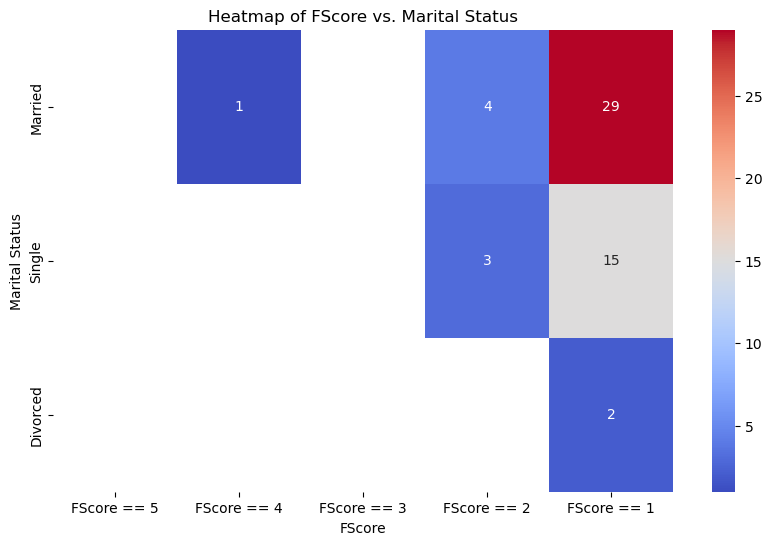

In [130]:
plt.figure(figsize=(10, 6))
sns.heatmap(renamedNG, annot=True, cmap='coolwarm', cbar=True)
plt.title('Heatmap of FScore vs. Marital Status')
plt.xlabel('FScore')
plt.ylabel('Marital Status')
plt.show()

##### Master

In [131]:
RFMEdu_Master = dataRfm[(dataRfm['Education']=='Master')] 
RFMEdu_Master

ID  Year_Birth  Age Education Marital_Status   Income  Kidhome  \
5      7446        1967   47    Master        Married  62513.0        0   
13     8180        1952   62    Master       Divorced  59354.0        1   
18     6565        1949   65    Master        Married  76995.0        0   
19     2278        1985   29    Master         Single  33812.0        1   
30     6864        1989   25    Master       Divorced  10979.0        0   
...     ...         ...  ...       ...            ...      ...      ...   
2212   7366        1982   32    Master         Single  75777.0        0   
2213  10659        1979   35    Master        Married   7500.0        1   
2214   1448        1963   51    Master        Married  33562.0        1   
2221   9817        1970   44    Master         Single  44802.0        0   
2227   8235        1956   58    Master        Married  69245.0        0   

      Teenhome  Sum of House Member Dt_Customer  ...  Complain  Response  \
5            1                    3  2013-09-09  ...         0         0   
13           1                    3  2013-11-15  ...         0         0   
18           1                    3  2013-03-28  ...         0         0   
19           0                    2  2012-11-03  ...         0         0   
30           0                    1  2014-05-22  ...         0         0   
...        ...                  ...         ...  ...       ...       ...   
2212         0                    1  2013-07-04  ...         0         1   
2213         0                    3  2013-05-07  ...         0         0   
2214         2                    5  2014-06-25  ...         0         0   
2221         0                    1  2012-08-21  ...         0         0   
2227         1                    3  2014-01-24  ...         0         0   

      Promos  Frequency   Monetary  R Score  F Score  M Score  RFM Score  \
5          0         20  35.800000        5        4        2         11   
13         0         12  25.833333        3        2        2          7   
18         1         24  74.250000        1        4        3          8   
19         0          6  22.166667        1        1        1          3   
30         0          6   5.000000        4        1        1          6   
...      ...        ...        ...      ...      ...      ...        ...   
2212       3         20  71.900000        5        4        3         12   
2213       0          7   7.571429        5        2        1          8   
2214       0          6   8.500000        4        1        1          6   
2221       0         25  41.960000        2        5        2          9   
2227       0         21  40.142857        5        4        2         11   

              RFM Level  
5        2. Gold-Member  
13     4. Bronze-Member  
18     4. Bronze-Member  
19    6. Need Attention  
30     5. Common-Member  
...                 ...  
2212     2. Gold-Member  
2213   4. Bronze-Member  
2214   5. Common-Member  
2221   3. Silver-Member  
2227     2. Gold-Member  

[570 rows x 39 columns]

In [132]:
RFMEdu_Master_5 = RFMEdu_Master [(RFMEdu_Master['F Score']=='5')]
RFMEdu_Master_5.value_counts(subset='Marital_Status')

Marital_Status
Married     11
Single       8
Divorced     4
Name: count, dtype: int64

In [133]:
RFMEdu_Master_4 = RFMEdu_Master [(RFMEdu_Master['F Score']=='4')]
RFMEdu_Master_4.value_counts(subset='Marital_Status')

Marital_Status
Married     73
Single      23
Divorced    17
Name: count, dtype: int64

In [134]:
RFMEdu_Master_3 = RFMEdu_Master [(RFMEdu_Master['F Score']=='3')]
RFMEdu_Master_3.value_counts(subset='Marital_Status')

Marital_Status
Married     89
Single      20
Divorced    18
Name: count, dtype: int64

In [135]:
RFMEdu_Master_2 = RFMEdu_Master [(RFMEdu_Master['F Score']=='2')]
RFMEdu_Master_2.value_counts(subset='Marital_Status')

Marital_Status
Married     78
Single      21
Divorced    17
Name: count, dtype: int64

In [136]:
RFMEdu_Master_1 = RFMEdu_Master [(RFMEdu_Master['F Score']=='1')]
RFMEdu_Master_1.value_counts(subset='Marital_Status')

Marital_Status
Married     130
Single       41
Divorced     20
Name: count, dtype: int64

In [137]:
mergedEduMaster1 = pd.merge(RFMEdu_Master_5.value_counts(subset='Marital_Status'), RFMEdu_Master_4.value_counts(subset='Marital_Status'), on='Marital_Status', how='outer').merge(RFMEdu_Master_3.value_counts(subset='Marital_Status'), on='Marital_Status', how='outer')
mergedEduMaster1

count_x  count_y  count
Marital_Status                         
Married              11       73     89
Single                8       23     20
Divorced              4       17     18

In [138]:
mergedEduMaster1.insert(3,'FScore == 2',RFMEdu_Master_2.value_counts(subset='Marital_Status'))
mergedEduMaster1.insert(4,'FScore == 1',RFMEdu_Master_1.value_counts(subset='Marital_Status'))
mergedEduMaster1

count_x  count_y  count  FScore == 2  FScore == 1
Marital_Status                                                   
Married              11       73     89           78          130
Single                8       23     20           21           41
Divorced              4       17     18           17           20

In [139]:
renamedMaster = mergedEduMaster1.rename(columns={'count_x':'FScore == 5','count_y':'FScore == 4','count':'FScore == 3'})
renamedMaster

FScore == 5  FScore == 4  FScore == 3  FScore == 2  \
Marital_Status                                                       
Married                  11           73           89           78   
Single                    8           23           20           21   
Divorced                  4           17           18           17   

                FScore == 1  
Marital_Status               
Married                 130  
Single                   41  
Divorced                 20

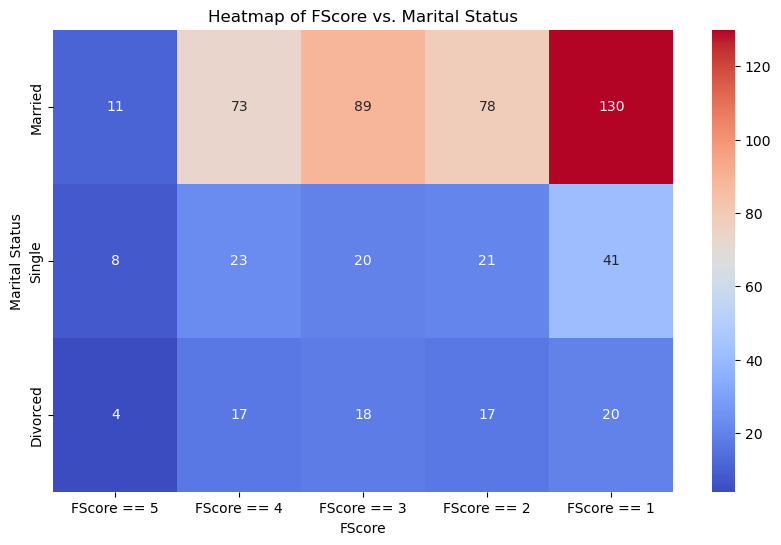

In [140]:
plt.figure(figsize=(10, 6))
sns.heatmap(renamedMaster, annot=True, cmap='coolwarm',fmt='d', cbar=True)
plt.title('Heatmap of FScore vs. Marital Status')
plt.xlabel('FScore')
plt.ylabel('Marital Status')
plt.show()

##### Doctoral

In [141]:
RFMEdu_Doctoral = dataRfm[(dataRfm['Education']=='Doctoral')] 
RFMEdu_Doctoral

ID  Year_Birth  Age Education Marital_Status   Income  Kidhome  \
4      5324        1981   33  Doctoral        Married  58293.0        1   
7      6177        1985   29  Doctoral        Married  33454.0        1   
8      4855        1974   40  Doctoral        Married  30351.0        1   
9      5899        1950   64  Doctoral        Married   5648.0        1   
15     2114        1946   68  Doctoral         Single  82800.0        0   
...     ...         ...  ...       ...            ...      ...      ...   
2193  11133        1973   41  Doctoral         Single  48432.0        0   
2208   9589        1948   66  Doctoral       Divorced  82032.0        0   
2215   4286        1970   44  Doctoral         Single  57642.0        0   
2225   4001        1946   68  Doctoral        Married  64014.0        2   
2228   9405        1954   60  Doctoral        Married  52869.0        1   

      Teenhome  Sum of House Member Dt_Customer  ...  Complain  Response  \
4            0                    3  2014-01-19  ...         0         0   
7            0                    3  2013-05-08  ...         0         0   
8            0                    3  2013-06-06  ...         0         1   
9            1                    4  2014-03-13  ...         0         0   
15           0                    1  2012-11-24  ...         0         1   
...        ...                  ...         ...  ...       ...       ...   
2193         1                    2  2012-10-18  ...         0         1   
2208         0                    1  2014-04-05  ...         0         0   
2215         1                    2  2014-01-09  ...         0         0   
2225         1                    5  2014-06-10  ...         0         0   
2228         1                    4  2012-10-15  ...         0         1   

      Promos  Frequency   Monetary  R Score  F Score  M Score  RFM Score  \
4          0         14  30.142857        1        3        2          6   
7          0          8  21.125000        4        2        1          7   
8          1          5   9.200000        5        1        1          7   
9          1          1  49.000000        2        1        2          5   
15         3         25  52.600000        4        5        3         12   
...      ...        ...        ...      ...      ...      ...        ...   
2193       1         14  30.285714        5        3        2         10   
2208       0         17  72.588235        3        3        3          9   
2215       1         19  35.736842        4        4        2         10   
2225       1         15  29.600000        3        3        2          8   
2228       1          8  21.500000        4        2        1          7   

             RFM Level  
4     5. Common-Member  
7     4. Bronze-Member  
8     4. Bronze-Member  
9     5. Common-Member  
15      2. Gold-Member  
...                ...  
2193  3. Silver-Member  
2208  3. Silver-Member  
2215  3. Silver-Member  
2225  4. Bronze-Member  
2228  4. Bronze-Member  

[483 rows x 39 columns]

In [142]:
RFMEdu_Doctoral_5 = RFMEdu_Doctoral [(RFMEdu_Doctoral['F Score']=='5')]
RFMEdu_Doctoral_5.value_counts(subset='Marital_Status')

Marital_Status
Married     19
Single       7
Divorced     4
Name: count, dtype: int64

In [143]:
RFMEdu_Doctoral_4 = RFMEdu_Doctoral [(RFMEdu_Doctoral['F Score']=='4')]
RFMEdu_Doctoral_4.value_counts(subset='Marital_Status')

Marital_Status
Married     68
Divorced    19
Single      18
Name: count, dtype: int64

In [144]:
RFMEdu_Doctoral_3 = RFMEdu_Doctoral [(RFMEdu_Doctoral['F Score']=='3')]
RFMEdu_Doctoral_3.value_counts(subset='Marital_Status')

Marital_Status
Married     91
Single      27
Divorced    22
Name: count, dtype: int64

In [145]:
RFMEdu_Doctoral_2 = RFMEdu_Doctoral [(RFMEdu_Doctoral['F Score']=='2')]
RFMEdu_Doctoral_2.value_counts(subset='Marital_Status')

Marital_Status
Married     52
Single      14
Divorced    13
Name: count, dtype: int64

In [146]:
RFMEdu_Doctoral_1 = RFMEdu_Doctoral [(RFMEdu_Doctoral['F Score']=='1')]
RFMEdu_Doctoral_1.value_counts(subset='Marital_Status')

Marital_Status
Married     76
Single      35
Divorced    18
Name: count, dtype: int64

In [147]:
mergedEduDoctoral1 = pd.merge(RFMEdu_Doctoral_5.value_counts(subset='Marital_Status'), RFMEdu_Doctoral_4.value_counts(subset='Marital_Status'), on='Marital_Status', how='outer').merge(RFMEdu_Doctoral_3.value_counts(subset='Marital_Status'), on='Marital_Status', how='outer')
mergedEduDoctoral1

count_x  count_y  count
Marital_Status                         
Married              19       68     91
Single                7       18     27
Divorced              4       19     22

In [148]:
mergedEduDoctoral1.insert(3,'FScore == 2',RFMEdu_Doctoral_2.value_counts(subset='Marital_Status'))
mergedEduDoctoral1.insert(4,'FScore == 1',RFMEdu_Doctoral_1.value_counts(subset='Marital_Status'))
mergedEduDoctoral1

count_x  count_y  count  FScore == 2  FScore == 1
Marital_Status                                                   
Married              19       68     91           52           76
Single                7       18     27           14           35
Divorced              4       19     22           13           18

In [149]:
renamedDoctoral = mergedEduDoctoral1.rename(columns={'count_x':'FScore == 5','count_y':'FScore == 4','count':'FScore == 3'})
renamedDoctoral

FScore == 5  FScore == 4  FScore == 3  FScore == 2  \
Marital_Status                                                       
Married                  19           68           91           52   
Single                    7           18           27           14   
Divorced                  4           19           22           13   

                FScore == 1  
Marital_Status               
Married                  76  
Single                   35  
Divorced                 18

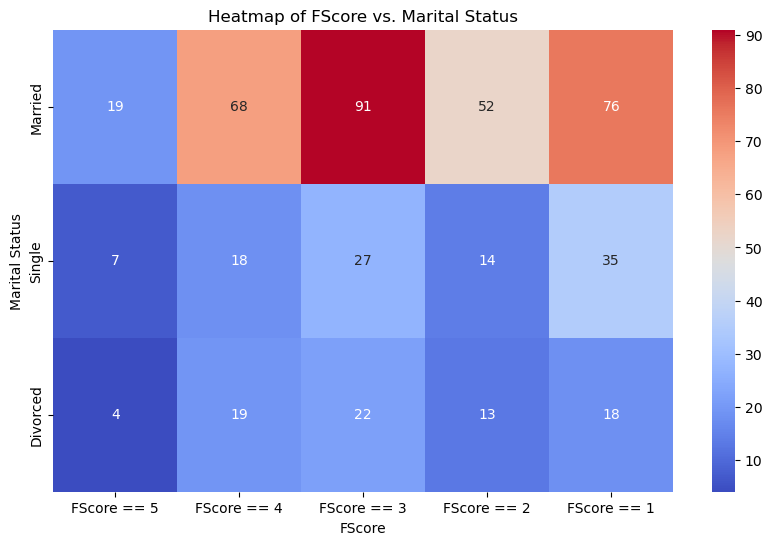

In [150]:
plt.figure(figsize=(10, 6))
sns.heatmap(renamedDoctoral, annot=True, cmap='coolwarm',fmt='d', cbar=True)
plt.title('Heatmap of FScore vs. Marital Status')
plt.xlabel('FScore')
plt.ylabel('Marital Status')
plt.show()

#### Summary of Frequency Based on Education and Marital Status
* Customer dengan tingkat pendidikan selain Doctoral memiliki modus di F Score == 1 yang menandakan pembelian yang berulang cukup sedikit
* Walaupun ada perbedaan edukasi, Customer dengan status pernikahan ‘Married’ merupakan pengunjung terbanyak di Supermarket ini
* rata-rata Customer hanya datang sesekali (bukan pelanggan tetap)

#### Frequency and Monetary Based on Sum of House Member

this sub section will show how much house member Impacted on Monetary and Frequency

In [151]:
rfmSOH_M = dataRfm.value_counts(subset=['M Score','Sum of House Member'],sort=False)
rfmSOH_M

M Score  Sum of House Member
1        1                       43
         2                      245
         3                      453
         4                      202
         5                       21
2        1                       52
         2                      232
         3                      335
         4                       86
         5                        7
3        1                       76
         2                      159
         3                       71
         4                        9
         5                        2
4        1                       35
         2                       66
         3                       13
         4                        2
5        1                       45
         2                       56
         3                       16
         4                        1
         5                        2
Name: count, dtype: int64

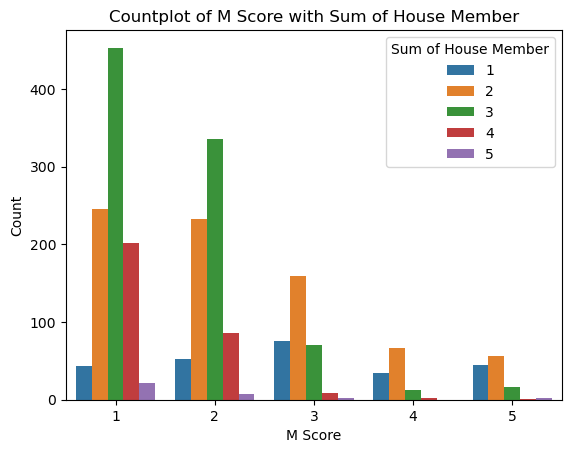

In [152]:
sns.countplot(data=dataRfm, x='M Score', hue='Sum of House Member',order=['1','2','3','4','5'])

plt.title('Countplot of M Score with Sum of House Member')
plt.xlabel('M Score')
plt.ylabel('Count')

plt.show()

In [153]:
rfmSOH_F = dataRfm.value_counts(subset=['M Score','Sum of House Member'],sort=False)
rfmSOH_F

M Score  Sum of House Member
1        1                       43
         2                      245
         3                      453
         4                      202
         5                       21
2        1                       52
         2                      232
         3                      335
         4                       86
         5                        7
3        1                       76
         2                      159
         3                       71
         4                        9
         5                        2
4        1                       35
         2                       66
         3                       13
         4                        2
5        1                       45
         2                       56
         3                       16
         4                        1
         5                        2
Name: count, dtype: int64

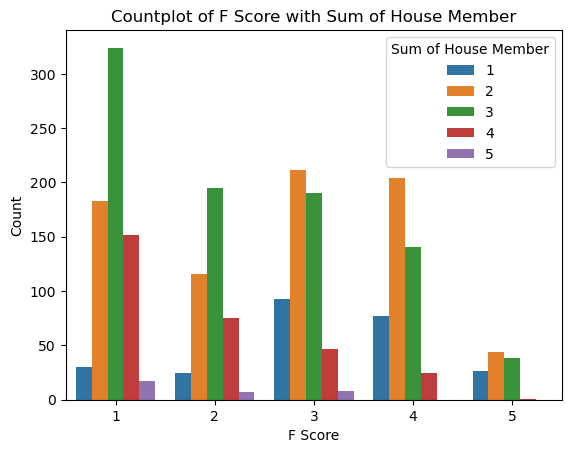

In [154]:
sns.countplot(data=dataRfm, x='F Score', hue='Sum of House Member',order=['1','2','3','4','5'])

# Add title and labels
plt.title('Countplot of F Score with Sum of House Member')
plt.xlabel('F Score')
plt.ylabel('Count')

# Show the plot
plt.show()

#### Summary of Frequency and Monetary Based on Sum of House Member

* Jumlah anggota keluarga tidak terlalu mempengaruhi rata-rata pengeluaran dalam tiap kali berbelanja 
* Jumlah anggota keluarga mempengaruhi jumlah frekuensi berbelanja

### Analysis Based on RFM Score

In [155]:
grupA = dataRfm.groupby(['Education','Marital_Status','Sum of House Member','RFM Level'])[['Income']].mean()
pd.set_option('display.max_rows', None)
grupA

Income
Education    Marital_Status Sum of House Member RFM Level                       
Bachelor     Divorced       1                   1. Platinum-Member  85683.000000
                                                2. Gold-Member      76957.090909
                                                3. Silver-Member    74192.666667
                                                4. Bronze-Member    64045.000000
                                                5. Common-Member    37802.000000
                                                6. Need Attention   24212.333333
                            2                   1. Platinum-Member  64497.000000
                                                2. Gold-Member      70417.000000
                                                3. Silver-Member    61525.368421
                                                4. Bronze-Member    56957.913043
                                                5. Common-Member    40350.428571
                                                6. Need Attention   33581.461538
                            3                   2. Gold-Member      89694.000000
                                                3. Silver-Member    58482.000000
                                                4. Bronze-Member    46904.428571
                                                5. Common-Member    43085.916667
                                                6. Need Attention   37263.142857
                            4                   4. Bronze-Member    46102.000000
                                                5. Common-Member    27215.000000
                                                6. Need Attention   32004.500000
             Married        2                   1. Platinum-Member  84093.117647
                                                2. Gold-Member      77829.596154
                                                3. Silver-Member    72381.561404
                                                4. Bronze-Member    57686.522727
                                                5. Common-Member    39156.666667
                                                6. Need Attention   23974.444444
                            3                   1. Platinum-Member  77568.000000
                                                2. Gold-Member      66177.343750
                                                3. Silver-Member    63116.975904
                                                4. Bronze-Member    47906.936937
                                                5. Common-Member    35537.489130
                                                6. Need Attention   32254.814815
                            4                   2. Gold-Member      55832.333333
                                                3. Silver-Member    56897.533333
                                                4. Bronze-Member    47150.184211
                                                5. Common-Member    40652.440000
                                                6. Need Attention   35696.625000
                            5                   3. Silver-Member    76160.500000
                                                4. Bronze-Member    61770.000000
                                                5. Common-Member    31686.166667
                                                6. Need Attention   38891.500000
             Single         1                   1. Platinum-Member  78842.750000
                                                2. Gold-Member      80926.352941
                                                3. Silver-Member    75554.208333
                                                4. Bronze-Member    59211.038462
                                                5. Common-Member    37155.666667
                                                6. Need Attention   29967.250000
                            2                   2. Gold-Member      62345.857143
                        

<Axes: ylabel='Education-Marital_Status-Sum of House Member-RFM Level'>

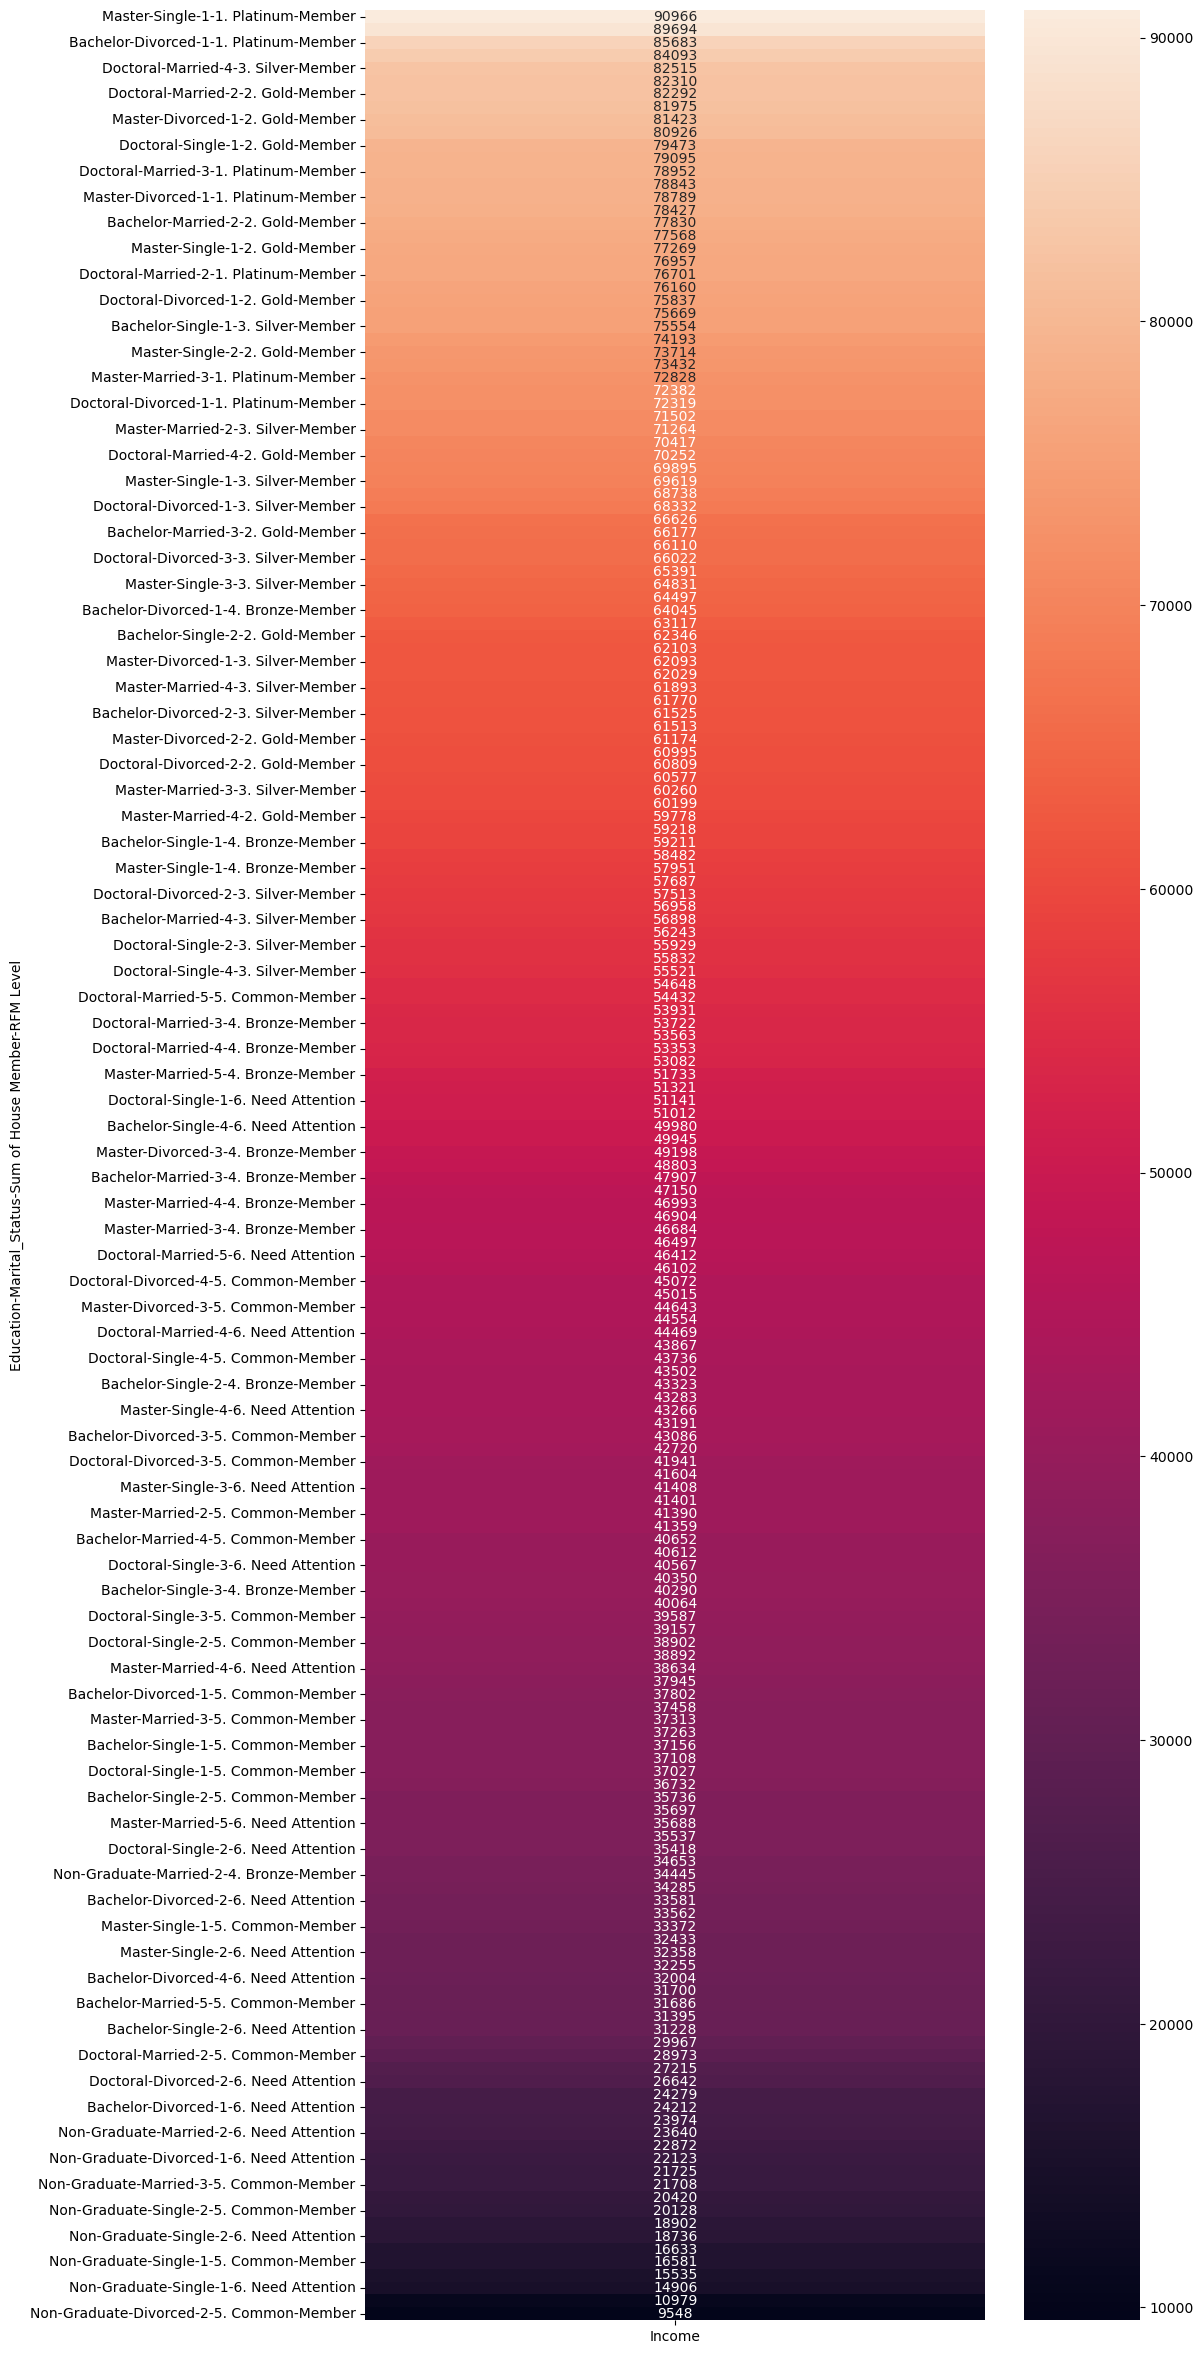

In [156]:
plt.figure(figsize=(10, 30))
sns.heatmap(grupA.sort_values(by='Income',ascending=False),annot=True,fmt='.0f')

#### Customer's Segmentation Based on RFM Level and Income (Mean)

Income > 75000

In [157]:
grupAIncomeA = grupA[(grupA['Income']>75000)]
grupAIncomeA

Income
Education Marital_Status Sum of House Member RFM Level                       
Bachelor  Divorced       1                   1. Platinum-Member  85683.000000
                                             2. Gold-Member      76957.090909
                         3                   2. Gold-Member      89694.000000
          Married        2                   1. Platinum-Member  84093.117647
                                             2. Gold-Member      77829.596154
                         3                   1. Platinum-Member  77568.000000
                         5                   3. Silver-Member    76160.500000
          Single         1                   1. Platinum-Member  78842.750000
                                             2. Gold-Member      80926.352941
                                             3. Silver-Member    75554.208333
Doctoral  Divorced       1                   2. Gold-Member      75836.750000
                                             4. Bronze-Member    75668.666667
          Married        2                   1. Platinum-Member  76701.111111
                                             2. Gold-Member      82291.562500
                         3                   1. Platinum-Member  78952.000000
                         4                   3. Silver-Member    82515.000000
          Single         1                   1. Platinum-Member  78427.000000
                                             2. Gold-Member      79473.100000
Master    Divorced       1                   1. Platinum-Member  78789.000000
                                             2. Gold-Member      81422.750000
                         2                   1. Platinum-Member  81975.000000
          Married        2                   1. Platinum-Member  82310.500000
                                             2. Gold-Member      79094.550000
          Single         1                   1. Platinum-Member  90966.333333
                                             2. Gold-Member      77269.050000

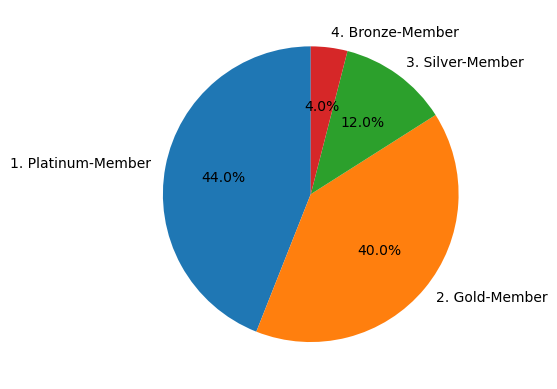

In [158]:
grupAIncomeAPcntg = grupAIncomeA.value_counts(subset='RFM Level')
plt.pie(grupAIncomeAPcntg, labels = grupAIncomeAPcntg.index, autopct='%1.1f%%', startangle= 90)

plt.show()

* dalam segmentasi customer dengan rata-rata pendapatan >75000 dipenuhi oleh customer dengan RFM Platinum Level dengan 44%. 
* tidak ada customer level 5 dan 6 di dalam kategori ini
* menandakan bahwa pendapatan rata-rata mempengaruhi Level dari Recency, Frequency, Monetary  

50000 < Income <= 75000

In [159]:
grupAIncomeB = grupA[(grupA['Income']<=75000) & (grupA['Income']>50000)]
grupAIncomeB

Income
Education Marital_Status Sum of House Member RFM Level                       
Bachelor  Divorced       1                   3. Silver-Member    74192.666667
                                             4. Bronze-Member    64045.000000
                         2                   1. Platinum-Member  64497.000000
                                             2. Gold-Member      70417.000000
                                             3. Silver-Member    61525.368421
                                             4. Bronze-Member    56957.913043
                         3                   3. Silver-Member    58482.000000
          Married        2                   3. Silver-Member    72381.561404
                                             4. Bronze-Member    57686.522727
                         3                   2. Gold-Member      66177.343750
                                             3. Silver-Member    63116.975904
                         4                   2. Gold-Member      55832.333333
                                             3. Silver-Member    56897.533333
                         5                   4. Bronze-Member    61770.000000
          Single         1                   4. Bronze-Member    59211.038462
                         2                   2. Gold-Member      62345.857143
                                             3. Silver-Member    62029.307692
                         3                   3. Silver-Member    60577.444444
                         4                   3. Silver-Member    56243.000000
                                             4. Bronze-Member    66626.500000
                                             5. Common-Member    60199.000000
Doctoral  Divorced       1                   1. Platinum-Member  72319.000000
                                             3. Silver-Member    68331.555556
                         2                   2. Gold-Member      60808.571429
                                             3. Silver-Member    57513.400000
                         3                   3. Silver-Member    66022.000000
          Married        2                   3. Silver-Member    73431.857143
                                             4. Bronze-Member    68737.846154
                                             6. Need Attention   51012.000000
                         3                   2. Gold-Member      69895.133333
                                             3. Silver-Member    61512.606061
                                             4. Bronze-Member    53722.423729
                         4                   2. Gold-Member      70252.333333
                                             4. Bronze-Member    53353.476190
                         5                   3. Silver-Member    66110.000000
                                             4. Bronze-Member    53563.200000
                                             5. Common-Member    54432.000000
          Single         1                   3. Silver-Member    71501.538462
                                             4. Bronze-Member    59217.833333
                                             6. Need Attention   51141.000000
                         2                   2. Gold-Member      62102.666667
                                             3. Silver-Member    55929.083333
                         4                   3. Silver-Member    55521.000000
Master    Divorced       1                   3. Silver-Member    62093.428571
                                             4. Bronze-Member    51321.000000
                         2                   2. Gold-Member      61173.666667
                                             3. Silver-Member    60994.900000
                                             4. Bronze-Member    53081.545455
          Married        2                   3. Silver-Member    71264.222222
                                             4. Bronze-Member    53930.564516
               

In [160]:
grupAIncomeB.value_counts(subset='RFM Level')

RFM Level
3. Silver-Member      26
4. Bronze-Member      16
2. Gold-Member        12
1. Platinum-Member     3
5. Common-Member       2
6. Need Attention      2
Name: count, dtype: int64

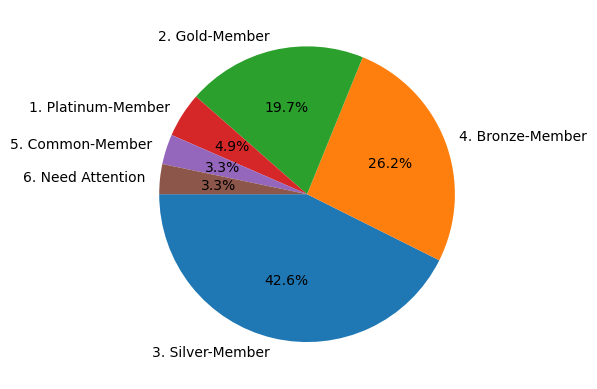

In [161]:
grupAIncomeBPcntg = grupAIncomeB.value_counts(subset='RFM Level')
plt.pie(grupAIncomeBPcntg, labels = grupAIncomeBPcntg.index, autopct='%1.1f%%', startangle= 180)

plt.show()

* dalam segmentasi ini, didominasi oleh RFM Level 2,3, dan 4
* RFM Level 1 berkurang, RFM level 5 dan 6 sudah ada dalam segmentasi rata-rata pendapatan ini

25000 < Income <= 50000

In [162]:
grupAIncomeC = grupA[(grupA['Income']<=50000) & (grupA['Income']>25000)]
grupAIncomeC

Income
Education    Marital_Status Sum of House Member RFM Level                      
Bachelor     Divorced       1                   5. Common-Member   37802.000000
                            2                   5. Common-Member   40350.428571
                                                6. Need Attention  33581.461538
                            3                   4. Bronze-Member   46904.428571
                                                5. Common-Member   43085.916667
                                                6. Need Attention  37263.142857
                            4                   4. Bronze-Member   46102.000000
                                                5. Common-Member   27215.000000
                                                6. Need Attention  32004.500000
             Married        2                   5. Common-Member   39156.666667
                            3                   4. Bronze-Member   47906.936937
                                                5. Common-Member   35537.489130
                                                6. Need Attention  32254.814815
                            4                   4. Bronze-Member   47150.184211
                                                5. Common-Member   40652.440000
                                                6. Need Attention  35696.625000
                            5                   5. Common-Member   31686.166667
                                                6. Need Attention  38891.500000
             Single         1                   5. Common-Member   37155.666667
                                                6. Need Attention  29967.250000
                            2                   4. Bronze-Member   43323.282051
                                                5. Common-Member   35735.939394
                                                6. Need Attention  31227.681818
                            3                   4. Bronze-Member   40290.000000
                                                5. Common-Member   43190.625000
                                                6. Need Attention  32432.571429
                            4                   6. Need Attention  49980.000000
Doctoral     Divorced       2                   4. Bronze-Member   49944.666667
                                                5. Common-Member   44553.900000
                                                6. Need Attention  26642.000000
                            3                   4. Bronze-Member   46496.600000
                                                5. Common-Member   41940.714286
                                                6. Need Attention  40064.500000
                            4                   5. Common-Member   45072.000000
             Married        2                   5. Common-Member   28973.000000
                            3                   5. Common-Member   41603.580645
                                                6. Need Attention  37457.952381
                            4                   5. Common-Member   37945.000000
                                                6. Need Attention  44468.714286
                            5                   6. Need Attention  46412.000000
             Single         1                   5. Common-Member   37027.400000
                            2                   4. Bronze-Member   45015.222222
                                                5. Common-Member   38901.600000
                                                6. Need Attention  35417.888889
                            3                   4. Bronze-Member   34653.000000
                                                5. Common-Member   39586.888889
                                                6. Need Attention  40567.000000
                            4                   5. Common-Member   43735.500000
                                                6. Need Attention  48803.

In [163]:
grupAIncomeC.value_counts(subset='RFM Level')

RFM Level
5. Common-Member     30
6. Need Attention    27
4. Bronze-Member     17
3. Silver-Member      1
Name: count, dtype: int64

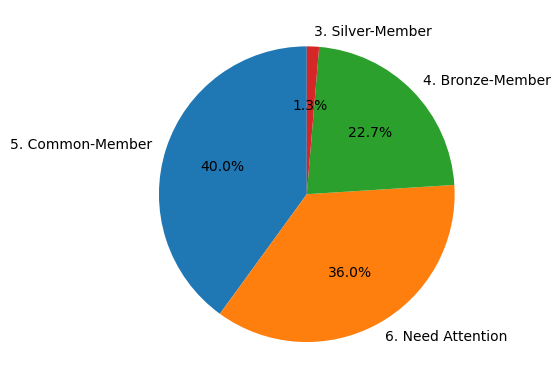

In [164]:
grupAIncomeCPcntg = grupAIncomeC.value_counts(subset='RFM Level')
plt.pie(grupAIncomeCPcntg, labels = grupAIncomeCPcntg.index, autopct='%1.1f%%', startangle= 90)

plt.show()

* Customer dengan RFM level 1 dan 2 tidak ada di dalam segmentasi pendapatan ini
* semakin membuktikan bahwa pendapatan mempengaruhi RFM Level dari customer

Income < 25000 

In [165]:
grupAIncomeD = grupA[(grupA['Income']<25000)]
grupAIncomeD

Income
Education    Marital_Status Sum of House Member RFM Level                      
Bachelor     Divorced       1                   6. Need Attention  24212.333333
             Married        2                   6. Need Attention  23974.444444
Master       Divorced       1                   5. Common-Member   10979.000000
             Married        2                   6. Need Attention  21724.714286
Non-Graduate Divorced       1                   6. Need Attention  22123.000000
                            2                   5. Common-Member    9548.000000
             Married        2                   3. Silver-Member   24279.000000
                                                5. Common-Member   20420.111111
                                                6. Need Attention  23639.666667
                            3                   4. Bronze-Member   18901.833333
                                                5. Common-Member   21708.444444
                                                6. Need Attention  22872.000000
             Single         1                   5. Common-Member   16581.000000
                                                6. Need Attention  14906.000000
                            2                   4. Bronze-Member   16633.333333
                                                5. Common-Member   20127.571429
                                                6. Need Attention  18736.500000
                            3                   5. Common-Member   15535.000000

In [166]:
grupAIncomeD.value_counts(subset='RFM Level')

RFM Level
6. Need Attention    8
5. Common-Member     7
4. Bronze-Member     2
3. Silver-Member     1
Name: count, dtype: int64

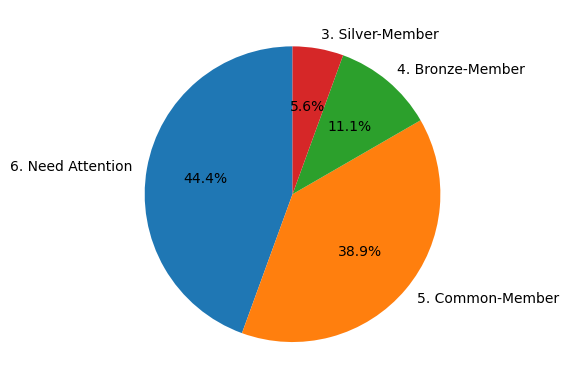

In [167]:
grupAIncomeDPcntg = grupAIncomeD.value_counts(subset='RFM Level')
plt.pie(grupAIncomeDPcntg, labels = grupAIncomeDPcntg.index, autopct='%1.1f%%', startangle= 90)

plt.show()

* Sama Seperti Segmentasi sebelumnya, tidak ada customer dengan level 1,2 di segmen pendapatan ini
* Customer dengan lvl 6 bertambah presentasenya
* membuktikan bahwa jumlah pendapatan mempengaruhi RFM Level

Percentage of grouped income
* **Group A** = Income > 75000 
* **Group B** = 50000 < Income <= 75000
* **Group C** = 25000 < Income <= 50000
* **Group D** = Income < 25000

In [168]:
pctgIncomeA = len(grupAIncomeA)/len(grupA) *100
pctgIncomeB = len(grupAIncomeB)/len(grupA) *100
pctgIncomeC = len(grupAIncomeC)/len(grupA) *100
pctgIncomeD = len(grupAIncomeD)/len(grupA) *100

In [169]:
percentageIncome = {
        'Segment':['Group A', 'Group B', 'Group C','Group D'],
        '% Income': [pctgIncomeA,pctgIncomeB,pctgIncomeC,pctgIncomeD]} # key = kolom, value = isi dari kolom
pd.DataFrame(percentageIncome)

Segment   % Income
0  Group A  13.966480
1  Group B  34.078212
2  Group C  41.899441
3  Group D  10.055866

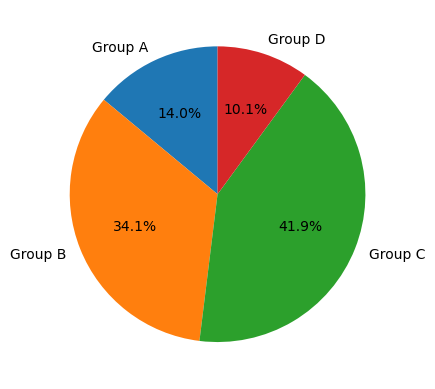

In [170]:
plt.pie(percentageIncome['% Income'], labels = percentageIncome['Segment'], autopct='%1.1f%%', startangle= 90)

plt.show()

* Customer dengan Segmentasi rata-rata pendaatan dalam Group B dan Group C merupakan faktor besar dalam mempengaruhi pemasukan supermarket
* mempengaruhi pemasukan supermarket dikarenakan banyaknya populasi dan banyaknya Customer dengan RFM Level 2,3, dan 4 dalam segmen tersebut

#### Customer Segmentation Based on Education and RFM Level

In [171]:
grupA_EduRFM = dataRfm.value_counts(subset=['Education','RFM Level'])
grupA_EduRFM

Education     RFM Level         
Bachelor      4. Bronze-Member      311
              3. Silver-Member      254
              5. Common-Member      243
Master        4. Bronze-Member      177
Bachelor      6. Need Attention     160
Doctoral      4. Bronze-Member      135
Bachelor      2. Gold-Member        130
Doctoral      3. Silver-Member      123
Master        5. Common-Member      117
              3. Silver-Member      106
Doctoral      5. Common-Member       97
Master        6. Need Attention      88
              2. Gold-Member         70
Doctoral      2. Gold-Member         58
              6. Need Attention      55
Non-Graduate  5. Common-Member       29
Bachelor      1. Platinum-Member     24
Doctoral      1. Platinum-Member     15
Non-Graduate  6. Need Attention      14
Master        1. Platinum-Member     12
Non-Graduate  4. Bronze-Member       10
              3. Silver-Member        1
Name: count, dtype: int64

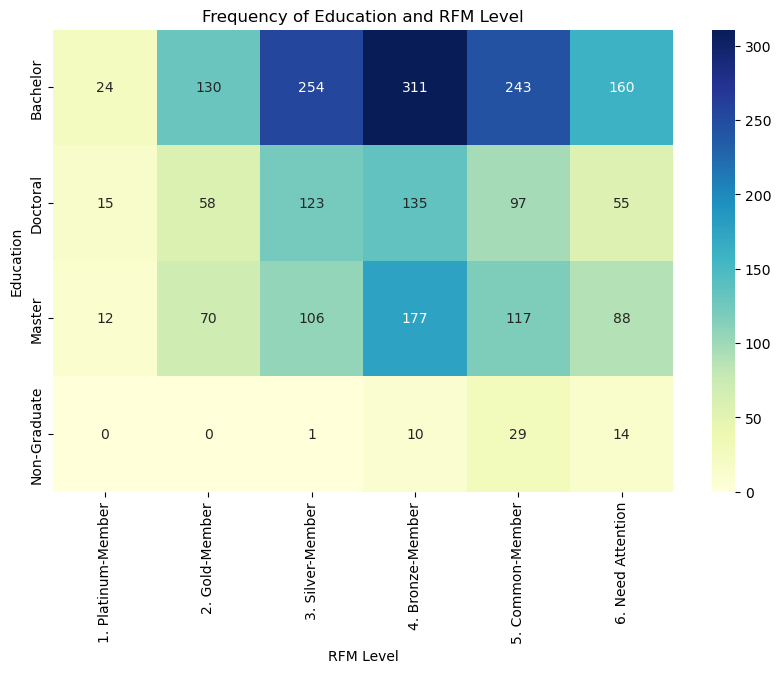

In [172]:
data1 = pd.DataFrame(list(grupA_EduRFM.items()), columns=['Education-RFM', 'Frequency'])
data1[['Education', 'RFM Level']] = pd.DataFrame(data1['Education-RFM'].tolist(), index=data1.index)
data1.drop(columns=['Education-RFM'], inplace=True)

pivotTableEduRFM = data1.pivot_table(index='Education', columns='RFM Level', values='Frequency', fill_value=0)

plt.figure(figsize=(10, 6))
sns.heatmap(pivotTableEduRFM, annot=True, cmap="YlGnBu", fmt="d")
plt.title('Frequency of Education and RFM Level')
plt.xlabel('RFM Level')
plt.ylabel('Education')
plt.show()

In [173]:
pivotTableEduRFM

RFM Level     1. Platinum-Member  2. Gold-Member  3. Silver-Member  \
Education                                                            
Bachelor                      24             130               254   
Doctoral                      15              58               123   
Master                        12              70               106   
Non-Graduate                   0               0                 1   

RFM Level     4. Bronze-Member  5. Common-Member  6. Need Attention  
Education                                                            
Bachelor                   311               243                160  
Doctoral                   135                97                 55  
Master                     177               117                 88  
Non-Graduate                10                29                 14

In [174]:
percentage_table = pivotTableEduRFM.div(grupA_EduRFM.sum(axis=0), axis=0)*100
percentage_table

RFM Level     1. Platinum-Member  2. Gold-Member  3. Silver-Member  \
Education                                                            
Bachelor                1.076716        5.832212         11.395245   
Doctoral                0.672948        2.602064          5.518170   
Master                  0.538358        3.140422          4.755496   
Non-Graduate            0.000000        0.000000          0.044863   

RFM Level     4. Bronze-Member  5. Common-Member  6. Need Attention  
Education                                                            
Bachelor             13.952445         10.901750           7.178107  
Doctoral              6.056528          4.351727           2.467474  
Master                7.940781          5.248991           3.947959  
Non-Graduate          0.448632          1.301032           0.628084

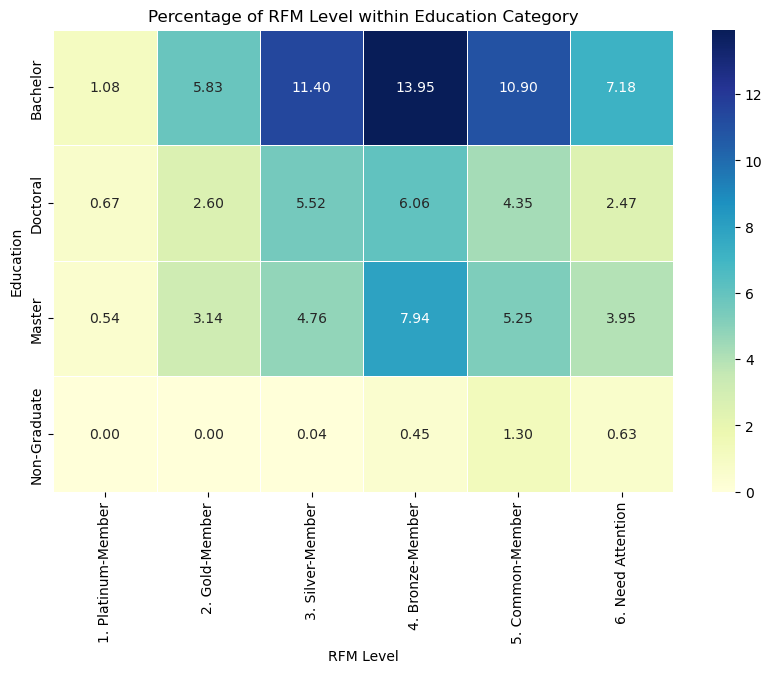

In [175]:
plt.figure(figsize=(10, 6))
sns.heatmap(percentage_table, annot=True, cmap="YlGnBu",fmt='.2f',linewidths=0.5)
plt.title('Percentage of RFM Level within Education Category')
plt.xlabel('RFM Level')
plt.ylabel('Education')
plt.show()

Insights = 
* Heatmap semakin menjadi gelap (Semakin banyak data) pada semua edukasi di setiap RFM level 3,4, dan 5
* Puncak data berada di Bachelor-Bronze Member
* Bronze Member merupakan modus RFM Level Customer

#### Customer Segmentation Based on Marital Status and Income (Mean)

In [176]:
grupA_MarryRFM = dataRfm.value_counts(subset=['Marital_Status','RFM Level'])
grupA_MarryRFM

Marital_Status  RFM Level         
Married         4. Bronze-Member      421
                5. Common-Member      320
                3. Silver-Member      300
                6. Need Attention     201
                2. Gold-Member        162
Single          4. Bronze-Member      130
                5. Common-Member      105
                3. Silver-Member      105
Divorced        4. Bronze-Member       82
                3. Silver-Member       79
Single          6. Need Attention      76
Divorced        5. Common-Member       61
Single          2. Gold-Member         59
Divorced        6. Need Attention      40
                2. Gold-Member         37
Married         1. Platinum-Member     35
Single          1. Platinum-Member     10
Divorced        1. Platinum-Member      6
Name: count, dtype: int64

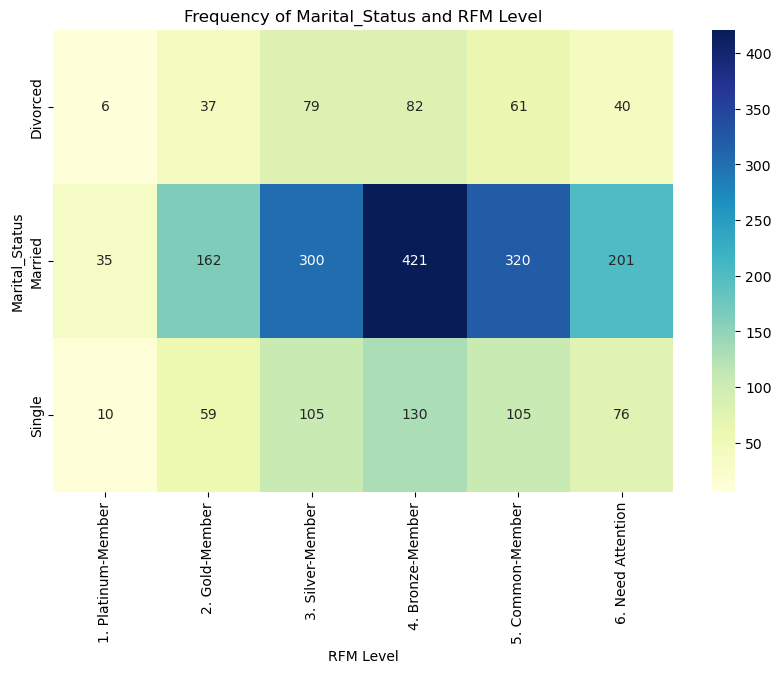

In [177]:
data2 = pd.DataFrame(list(grupA_MarryRFM.items()), columns=['Marital_Status-RFM', 'Frequency'])
data2[['Marital_Status', 'RFM Level']] = pd.DataFrame(data2['Marital_Status-RFM'].tolist(), index=data2.index)
data2.drop(columns=['Marital_Status-RFM'], inplace=True)

pivotTableMarryRFM = data2.pivot_table(index='Marital_Status', columns='RFM Level', values='Frequency', fill_value=0)

plt.figure(figsize=(10, 6))
sns.heatmap(pivotTableMarryRFM, annot=True, cmap="YlGnBu", fmt="d")
plt.title('Frequency of Marital_Status and RFM Level')
plt.xlabel('RFM Level')
plt.ylabel('Marital_Status')
plt.show()

In [178]:
pivotTableMarryRFM

RFM Level       1. Platinum-Member  2. Gold-Member  3. Silver-Member  \
Marital_Status                                                         
Divorced                         6              37                79   
Married                         35             162               300   
Single                          10              59               105   

RFM Level       4. Bronze-Member  5. Common-Member  6. Need Attention  
Marital_Status                                                         
Divorced                      82                61                 40  
Married                      421               320                201  
Single                       130               105                 76

In [179]:
percentage_table = pivotTableMarryRFM.div(grupA_MarryRFM.sum(axis=0), axis=0)*100
percentage_table

RFM Level       1. Platinum-Member  2. Gold-Member  3. Silver-Member  \
Marital_Status                                                         
Divorced                  0.269179        1.659937          3.544190   
Married                   1.570211        7.267833         13.458950   
Single                    0.448632        2.646927          4.710633   

RFM Level       4. Bronze-Member  5. Common-Member  6. Need Attention  
Marital_Status                                                         
Divorced                3.678780          2.736653           1.794527  
Married                18.887393         14.356214           9.017497  
Single                  5.832212          4.710633           3.409601

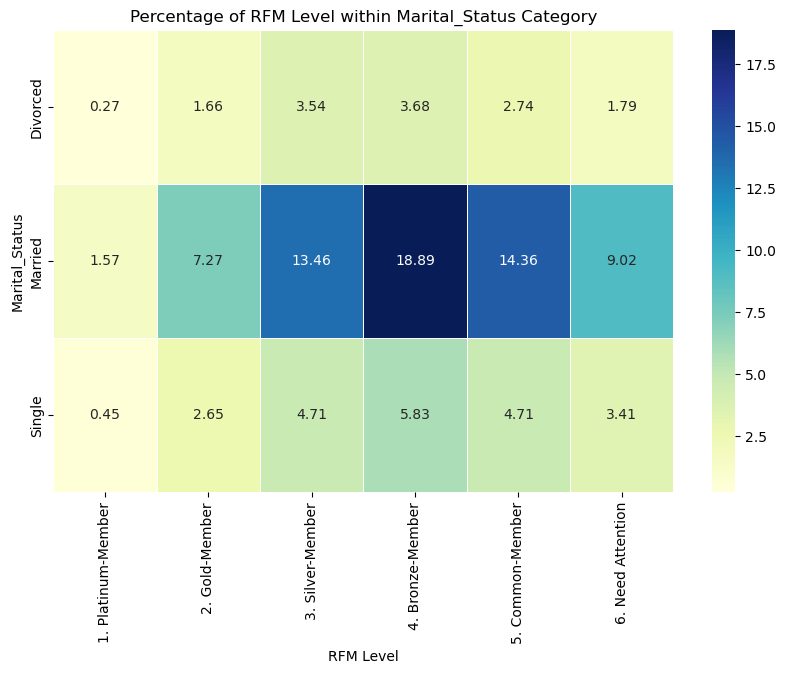

In [180]:
plt.figure(figsize=(10, 6))
sns.heatmap(percentage_table, annot=True, cmap="YlGnBu",fmt='.2f',linewidths=0.5)
plt.title('Percentage of RFM Level within Marital_Status Category')
plt.xlabel('RFM Level')
plt.ylabel('Marital_Status')
plt.show()

Insights = 
* Heatmap semakin menjadi gelap (Semakin banyak data) pada status Married di setiap RFM level 3,4, dan 5
* Customer supermarket ini tersegmentasi di status pernikahan 'Married' dengan begitu banyaknya data yang tumpang tindih dengan status pernikahan lainnya
* Puncak data berada di Married-Bronze Member
* Bronze Member merupakan modus RFM Level Customer berdasarkan Marital_Status

#### Customer Segmentation Based on House Member and Income (Mean)

In [181]:
grupA_HMRFM = dataRfm.value_counts(subset=['Sum of House Member','RFM Level'])
grupA_HMRFM

Sum of House Member  RFM Level         
3                    4. Bronze-Member      282
                     5. Common-Member      232
2                    3. Silver-Member      206
                     4. Bronze-Member      198
3                    3. Silver-Member      168
                     6. Need Attention     138
2                    5. Common-Member      117
                     2. Gold-Member        117
4                    5. Common-Member      104
2                    6. Need Attention      86
4                    4. Bronze-Member       86
1                    3. Silver-Member       77
4                    6. Need Attention      71
1                    2. Gold-Member         66
3                    2. Gold-Member         65
1                    4. Bronze-Member       57
2                    1. Platinum-Member     34
4                    3. Silver-Member       29
1                    5. Common-Member       25
                     1. Platinum-Member     14
                    

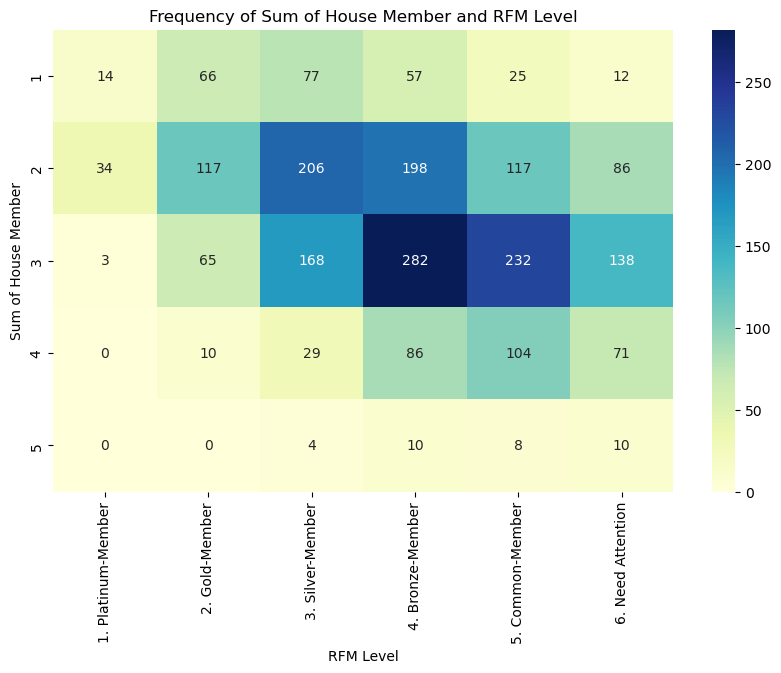

In [182]:
data3 = pd.DataFrame(list(grupA_HMRFM.items()), columns=['Sum of House Member-RFM', 'Frequency'])
data3[['Sum of House Member', 'RFM Level']] = pd.DataFrame(data3['Sum of House Member-RFM'].tolist(), index=data3.index)
data3.drop(columns=['Sum of House Member-RFM'], inplace=True)

pivotTableHMRFM = data3.pivot_table(index='Sum of House Member', columns='RFM Level', values='Frequency', fill_value=0)

plt.figure(figsize=(10, 6))
sns.heatmap(pivotTableHMRFM, annot=True, cmap="YlGnBu", fmt="d")
plt.title('Frequency of Sum of House Member and RFM Level')
plt.xlabel('RFM Level')
plt.ylabel('Sum of House Member')
plt.show()

In [183]:
pivotTableHMRFM

RFM Level            1. Platinum-Member  2. Gold-Member  3. Silver-Member  \
Sum of House Member                                                         
1                                    14              66                77   
2                                    34             117               206   
3                                     3              65               168   
4                                     0              10                29   
5                                     0               0                 4   

RFM Level            4. Bronze-Member  5. Common-Member  6. Need Attention  
Sum of House Member                                                         
1                                  57                25                 12  
2                                 198               117                 86  
3                                 282               232                138  
4                                  86               104                 71  
5                                  10                 8                 10

In [184]:
percentage_table = pivotTableHMRFM.div(grupA_HMRFM.sum(axis=0), axis=0)*100
percentage_table

RFM Level            1. Platinum-Member  2. Gold-Member  3. Silver-Member  \
Sum of House Member                                                         
1                              0.628084        2.960969          3.454464   
2                              1.525348        5.248991          9.241812   
3                              0.134590        2.916106          7.537012   
4                              0.000000        0.448632          1.301032   
5                              0.000000        0.000000          0.179453   

RFM Level            4. Bronze-Member  5. Common-Member  6. Need Attention  
Sum of House Member                                                         
1                            2.557201          1.121579           0.538358  
2                            8.882907          5.248991           3.858232  
3                           12.651413         10.408255           6.191117  
4                            3.858232          4.665769           3.185285  
5                            0.448632          0.358905           0.448632

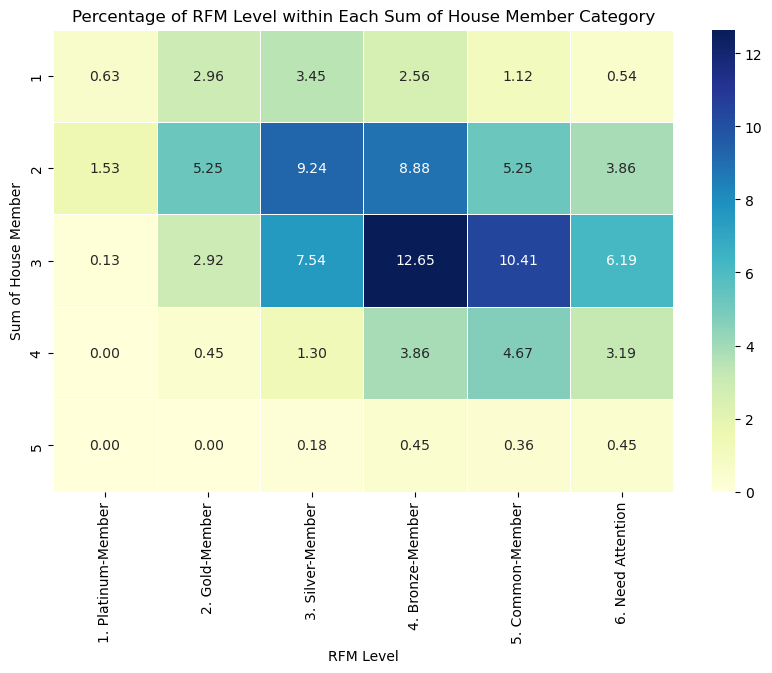

In [185]:
plt.figure(figsize=(10, 6))
sns.heatmap(percentage_table, annot=True, cmap="YlGnBu",fmt='.2f',linewidths=0.5)
plt.title('Percentage of RFM Level within Each Sum of House Member Category')
plt.xlabel('RFM Level')
plt.ylabel('Sum of House Member')
plt.show()

Insights = 
* Heatmap semakin menjadi gelap (Semakin banyak data) pada 3 jumlah anggota keluarga di RFM level 3, 4, dan 5
* untuk 2 jumlah anggota keluarga memiliki nilai yang mirip namun semakin banyak data di RFM level 2, 3, dan 4
* Puncak data berada di 3 Anggota Keluarga-Bronze Member
* Bronze Member merupakan modus RFM Level Customer berdasarkan jumlah anggota keluarga

## Marketing Promotions Analysis

### Marketing Promotion Campaign

In [186]:
pd.reset_option('display.max_rows')
promo1 = data[(data['AcceptedCmp1']==1)]
promo1

ID  Year_Birth  Age Education Marital_Status   Income  Kidhome  \
15     2114        1946   68  Doctoral         Single  82800.0        0   
18     6565        1949   65    Master        Married  76995.0        0   
53     2225        1977   37  Bachelor       Divorced  82582.0        0   
67     9369        1979   35    Master         Single  88194.0        0   
87     4452        1957   57  Bachelor         Single  50388.0        0   
...     ...         ...  ...       ...            ...      ...      ...   
2159  10394        1984   30  Bachelor        Married  90000.0        0   
2165   2829        1955   59  Bachelor        Married  65210.0        0   
2166   1772        1975   39  Doctoral        Married  79174.0        0   
2184   8722        1957   57    Master        Married  82347.0        0   
2226   4001        1946   68  Doctoral        Married  64014.0        2   

      Teenhome  Sum of House Member Dt_Customer  ...  NumWebVisitsMonth  \
15           0                    1  2012-11-24  ...                  3   
18           1                    3  2013-03-28  ...                  5   
53           0                    1  2014-06-07  ...                  1   
67           1                    2  2014-03-19  ...                  5   
87           1                    2  2014-05-28  ...                  7   
...        ...                  ...         ...  ...                ...   
2159         0                    2  2013-12-23  ...                  1   
2165         1                    3  2014-03-10  ...                  6   
2166         0                    2  2013-01-11  ...                  2   
2184         0                    2  2012-11-06  ...                  3   
2226         1                    5  2014-06-10  ...                  7   

      Freq Purchased  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  \
15                25             0             0             1             1   
18                24             0             0             0             1   
53                20             1             0             0             1   
67                31             1             0             0             1   
87                13             0             1             0             1   
...              ...           ...           ...           ...           ...   
2159              17             1             0             1             1   
2165              20             0             1             0             1   
2166              18             0             0             1             1   
2184              24             1             0             0             1   
2226              15             0             0             0             1   

      AcceptedCmp2  Complain  Response  Promos  
15               0         0         1       3  
18               0         0         0       1  
53               0         0         1       3  
67               0         0         1       3  
87               0         0         1       3  
...            ...       ...       ...     ...  
2159             0         0         0       3  
2165             0         0         0       2  
2166             0         0         1       3  
2184             0         0         1       3  
2226             0         0         0       1  

[144 rows x 32 columns]

In [187]:
pctPromo1 = promo1.value_counts(subset='AcceptedCmp1').sum()/len(data)*100
print(f'Presentase Ketertarikan Customer Terhadap Promo Pertama = {pctPromo1:.3f} %')

Presentase Ketertarikan Customer Terhadap Promo Pertama = 6.457 %


In [188]:
promo2 = data[(data['AcceptedCmp2']==1)]
promo2

ID  Year_Birth  Age Education Marital_Status    Income  Kidhome  \
250   10089        1974   40  Bachelor       Divorced  102692.0        0   
293    2926        1952   62    Master        Married   55951.0        0   
339    9707        1969   45  Doctoral        Married   55212.0        0   
414    5067        1994   20  Bachelor        Married   80134.0        0   
427    3725        1961   53  Doctoral         Single   84865.0        0   
556    3174        1959   55  Bachelor        Married   87771.0        0   
572    2574        1977   37  Doctoral        Married   61996.0        0   
800    3483        1958   56  Bachelor        Married   48192.0        0   
818       1        1961   53  Bachelor         Single   57091.0        0   
820    5536        1959   55  Bachelor        Married   87771.0        0   
841    5848        1970   44  Bachelor        Married   81205.0        0   
866   10140        1983   31  Doctoral        Married   70123.0        0   
916    9972        1955   59  Doctoral        Married   46015.0        1   
985    8545        1954   60  Bachelor       Divorced   85683.0        0   
1082   1509        1958   56  Doctoral        Married   84460.0        0   
1232   9757        1972   42  Bachelor        Married   84906.0        0   
1275   9516        1971   43    Master       Divorced   49118.0        0   
1302   5758        1982   32  Bachelor        Married   65169.0        0   
1456   2945        1955   59  Doctoral        Married   46015.0        1   
1634   1665        1964   50  Doctoral       Divorced   64140.0        0   
1680   2570        1968   46  Bachelor        Married   56534.0        0   
1703    477        1986   28  Bachelor        Married   83512.0        0   
1907  10176        1968   46  Bachelor         Single   57107.0        0   
1914   3138        1956   58  Bachelor         Single   91249.0        0   
1918  10872        1969   45  Doctoral        Married   55212.0        0   
1953   3009        1962   52  Doctoral       Divorced   71670.0        0   
2091   3422        1975   39  Bachelor        Married   76068.0        0   
2117   2088        1972   42  Bachelor        Married   84906.0        0   
2158   3520        1990   24    Master         Single   91172.0        0   
2162   3968        1970   44    Master       Divorced   65706.0        0   

      Teenhome  Sum of House Member Dt_Customer  ...  NumWebVisitsMonth  \
250          0                    1  2013-04-05  ...                  2   
293          1                    3  2012-08-23  ...                  8   
339          1                    3  2012-11-23  ...                  8   
414          0                    2  2014-02-14  ...                  5   
427          0                    1  2013-05-09  ...                  4   
556          1                    3  2013-05-22  ...                  6   
572          1                    3  2013-01-31  ...                  5   
800          0                    2  2013-04-06  ...                  8   
818          0                    1  2014-06-15  ...                  5   
820          1                    3  2013-05-22  ...                  6   
841          0                    2  2014-01-13  ...                  2   
866          0                    2  2013-09-28  ...                  3   
916          1                    4  2014-04-13  ...                  7   
985          0                    1  2014-03-21  ...                  1   
1082         0                    2  2013-01-04  ...                  5   
1232         0                    2  2013-10-04  ...                  2   
1275         0                    1  2012-08-18  ...                  7   
1302         0                    2  2014-01-14  ...                  6   
1456         1                    4  2014-04-13  ...                  7   
1634         2                    3  2013-09-23  ...                  5   
1680         1                    3  2013-07-23  ...                  8   
17

In [189]:
pctPromo2 = promo2.value_counts(subset='AcceptedCmp2').sum()/len(data)*100
print(f'Presentase Ketertarikan Customer Terhadap Promo Kedua = {pctPromo2:.3f} %')

Presentase Ketertarikan Customer Terhadap Promo Kedua = 1.345 %


In [190]:
promo3 = data[(data['AcceptedCmp3']==1)]
promo3

ID  Year_Birth  Age Education Marital_Status   Income  Kidhome  \
9      5899        1950   64  Doctoral        Married   5648.0        1   
39     2968        1943   71  Doctoral       Divorced  48948.0        0   
53     2225        1977   37  Bachelor       Divorced  82582.0        0   
67     9369        1979   35    Master         Single  88194.0        0   
77     7503        1976   38  Bachelor         Single  75825.0        0   
...     ...         ...  ...       ...            ...      ...      ...   
2185   7118        1957   57  Bachelor        Married  73803.0        0   
2188  10722        1973   41  Bachelor        Married  55593.0        0   
2189   2632        1954   60  Bachelor        Married  50501.0        1   
2215   4286        1970   44  Doctoral         Single  57642.0        0   
2221   7004        1984   30  Bachelor         Single  11012.0        1   

      Teenhome  Sum of House Member Dt_Customer  ...  NumWebVisitsMonth  \
9            1                    4  2014-03-13  ...                 20   
39           0                    1  2013-02-01  ...                  6   
53           0                    1  2014-06-07  ...                  1   
67           1                    2  2014-03-19  ...                  5   
77           0                    1  2012-10-12  ...                  4   
...        ...                  ...         ...  ...                ...   
2185         1                    3  2012-08-01  ...                  6   
2188         1                    3  2013-08-21  ...                  6   
2189         1                    4  2013-06-18  ...                  6   
2215         1                    2  2014-01-09  ...                  4   
2221         0                    2  2013-03-16  ...                  9   

      Freq Purchased  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  \
9                  1             1             0             0             0   
39                22             1             0             0             0   
53                20             1             0             0             1   
67                31             1             0             0             1   
77                22             1             0             0             0   
...              ...           ...           ...           ...           ...   
2185              20             1             0             0             0   
2188              15             1             0             0             0   
2189              13             1             0             0             0   
2215              19             1             0             0             0   
2221               6             1             0             0             0   

      AcceptedCmp2  Complain  Response  Promos  
9                0         0         0       1  
39               0         0         1       2  
53               0         0         1       3  
67               0         0         1       3  
77               0         0         1       2  
...            ...       ...       ...     ...  
2185             0         0         1       2  
2188             0         0         0       1  
2189             0         0         1       2  
2215             0         0         0       1  
2221             0         0         0       1  

[163 rows x 32 columns]

In [191]:
pctPromo3 = promo3.value_counts(subset='AcceptedCmp3').sum()/len(data)*100
print(f'Presentase Ketertarikan Customer Terhadap Promo Ketiga = {pctPromo3:.3f} %')

Presentase Ketertarikan Customer Terhadap Promo Ketiga = 7.309 %


In [192]:
promo4 = data[(data['AcceptedCmp4']==1)]
promo4

ID  Year_Birth  Age Education Marital_Status   Income  Kidhome  \
22    1993        1949   65  Doctoral        Married  58607.0        0   
32    5710        1970   44  Bachelor        Married  40548.0        0   
60    6853        1982   32    Master         Single  75777.0        0   
73    8132        1975   39  Doctoral        Married  60631.0        1   
86     273        1970   44    Master        Married  36138.0        1   
...    ...         ...  ...       ...            ...      ...      ...   
2177  2666        1972   42    Master        Married  76234.0        0   
2198  4333        1954   60  Bachelor        Married  32144.0        1   
2212  7366        1982   32    Master         Single  75777.0        0   
2219  8720        1978   36    Master        Married  49611.5        0   
2227  7270        1981   33  Bachelor       Divorced  56981.0        0   

      Teenhome  Sum of House Member Dt_Customer  ...  NumWebVisitsMonth  \
22           1                    3  2012-12-23  ...                  8   
32           1                    3  2012-10-10  ...                  5   
60           0                    1  2013-07-04  ...                  1   
73           1                    4  2013-04-05  ...                  7   
86           1                    4  2013-07-16  ...                  7   
...        ...                  ...         ...  ...                ...   
2177         1                    3  2014-02-06  ...                  3   
2198         1                    4  2014-03-23  ...                  7   
2212         0                    1  2013-07-04  ...                  1   
2219         0                    2  2012-08-12  ...                  0   
2227         0                    1  2014-01-25  ...                  6   

      Freq Purchased  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  \
22                14             0             1             0             0   
32                 7             0             1             0             0   
60                20             0             1             1             0   
73                19             0             1             0             0   
86                 8             0             1             0             0   
...              ...           ...           ...           ...           ...   
2177              22             0             1             0             0   
2198               6             0             1             0             0   
2212              20             0             1             1             0   
2219               1             0             1             0             0   
2227              18             0             1             0             0   

      AcceptedCmp2  Complain  Response  Promos  
22               0         0         0       1  
32               0         0         0       1  
60               0         0         1       3  
73               0         0         0       1  
86               0         0         0       1  
...            ...       ...       ...     ...  
2177             0         0         0       1  
2198             0         0         0       1  
2212             0         0         1       3  
2219             0         0         0       1  
2227             0         0         0       1  

[167 rows x 32 columns]

In [193]:
pctPromo4 = promo4.value_counts(subset='AcceptedCmp4').sum()/len(data)*100
print(f'Presentase Ketertarikan Customer Terhadap Promo Keempat = {pctPromo4:.3f} %')

Presentase Ketertarikan Customer Terhadap Promo Keempat = 7.489 %


In [194]:
promo5 = data[(data['AcceptedCmp5']==1)]
promo5

ID  Year_Birth  Age Education Marital_Status   Income  Kidhome  \
15     2114        1946   68  Doctoral         Single  82800.0        0   
29     1966        1965   49  Doctoral        Married  84618.0        0   
55     6260        1955   59    Master        Married  82384.0        0   
60     6853        1982   32    Master         Single  75777.0        0   
88     8504        1973   41  Bachelor        Married  79593.0        0   
...     ...         ...  ...       ...            ...      ...      ...   
2159  10394        1984   30  Bachelor        Married  90000.0        0   
2162   3968        1970   44    Master       Divorced  65706.0        0   
2166   1772        1975   39  Doctoral        Married  79174.0        0   
2178   5721        1956   58  Doctoral        Married  84117.0        0   
2212   7366        1982   32    Master         Single  75777.0        0   

      Teenhome  Sum of House Member Dt_Customer  ...  NumWebVisitsMonth  \
15           0                    1  2012-11-24  ...                  3   
29           0                    2  2013-11-22  ...                  2   
55           0                    2  2012-11-19  ...                  1   
60           0                    1  2013-07-04  ...                  1   
88           0                    2  2014-05-12  ...                  2   
...        ...                  ...         ...  ...                ...   
2159         0                    2  2013-12-23  ...                  1   
2162         0                    1  2013-06-28  ...                  7   
2166         0                    2  2013-01-11  ...                  2   
2178         0                    2  2014-05-11  ...                  2   
2212         0                    1  2013-07-04  ...                  1   

      Freq Purchased  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  \
15                25             0             0             1             1   
29                25             0             0             1             0   
55                26             0             0             1             0   
60                20             0             1             1             0   
88                18             0             0             1             0   
...              ...           ...           ...           ...           ...   
2159              17             1             0             1             1   
2162              26             0             1             1             0   
2166              18             0             0             1             1   
2178              23             0             0             1             0   
2212              20             0             1             1             0   

      AcceptedCmp2  Complain  Response  Promos  
15               0         0         1       3  
29               0         0         0       1  
55               0         0         1       2  
60               0         0         1       3  
88               0         0         0       1  
...            ...       ...       ...     ...  
2159             0         0         0       3  
2162             1         0         1       4  
2166             0         0         1       3  
2178             0         0         0       1  
2212             0         0         1       3  

[162 rows x 32 columns]

In [195]:
pctPromo5 = promo5.value_counts(subset='AcceptedCmp5').sum()/len(data)*100
print(f'Presentase Ketertarikan Cust Customer Terhadap Kelima = {pctPromo5:.3f} %')

Presentase Ketertarikan Cust Customer Terhadap Kelima = 7.265 %


In [196]:
promo6 = data[(data['Response']==1)]
promo6

ID  Year_Birth  Age Education Marital_Status   Income  Kidhome  \
0      5524        1957   57  Bachelor         Single  58138.0        0   
8      4855        1974   40  Doctoral        Married  30351.0        1   
15     2114        1946   68  Doctoral         Single  82800.0        0   
33     7373        1952   62  Doctoral       Divorced  46610.0        0   
39     2968        1943   71  Doctoral       Divorced  48948.0        0   
...     ...         ...  ...       ...            ...      ...      ...   
2185   7118        1957   57  Bachelor        Married  73803.0        0   
2189   2632        1954   60  Bachelor        Married  50501.0        1   
2193  11133        1973   41  Doctoral         Single  48432.0        0   
2212   7366        1982   32    Master         Single  75777.0        0   
2229   9405        1954   60  Doctoral        Married  52869.0        1   

      Teenhome  Sum of House Member Dt_Customer  ...  NumWebVisitsMonth  \
0            0                    1  2012-09-04  ...                  7   
8            0                    3  2013-06-06  ...                  9   
15           0                    1  2012-11-24  ...                  3   
33           2                    3  2012-10-29  ...                  6   
39           0                    1  2013-02-01  ...                  6   
...        ...                  ...         ...  ...                ...   
2185         1                    3  2012-08-01  ...                  6   
2189         1                    4  2013-06-18  ...                  6   
2193         1                    2  2012-10-18  ...                  8   
2212         0                    1  2013-07-04  ...                  1   
2229         1                    4  2012-10-15  ...                  7   

      Freq Purchased  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  \
0                 22             0             0             0             0   
8                  5             0             0             0             0   
15                25             0             0             1             1   
33                11             0             0             0             0   
39                22             1             0             0             0   
...              ...           ...           ...           ...           ...   
2185              20             1             0             0             0   
2189              13             1             0             0             0   
2193              14             0             0             0             0   
2212              20             0             1             1             0   
2229               8             0             0             0             0   

      AcceptedCmp2  Complain  Response  Promos  
0                0         0         1       1  
8                0         0         1       1  
15               0         0         1       3  
33               0         0         1       1  
39               0         0         1       2  
...            ...       ...       ...     ...  
2185             0         0         1       2  
2189             0         0         1       2  
2193             0         0         1       1  
2212             0         0         1       3  
2229             0         0         1       1  

[334 rows x 32 columns]

In [197]:
pctPromo6 = promo6.value_counts(subset='Response').sum()/len(data)*100
print(f'Presentase Ketertarikan Customer Terhadap Promo Terakhir = {pctPromo6:.3f} %')

Presentase Ketertarikan Customer Terhadap Promo Terakhir = 14.978 %


In [198]:
pctPromos = {
            'Batch Promo':['1st','2nd','3rd','4th','5th','Last'],
            'Percentage':[pctPromo1,pctPromo2,pctPromo3,pctPromo4,pctPromo5,pctPromo6]
}
pd.DataFrame(pctPromos)

Batch Promo  Percentage
0         1st    6.457399
1         2nd    1.345291
2         3rd    7.309417
3         4th    7.488789
4         5th    7.264574
5        Last   14.977578

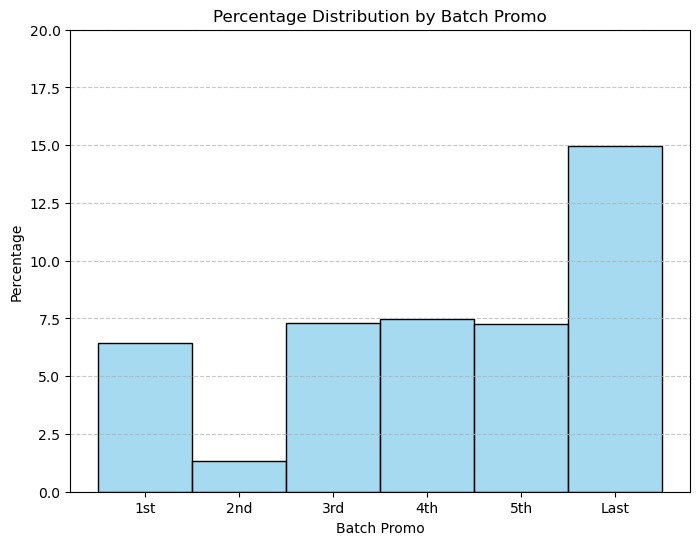

In [199]:
plt.figure(figsize=(8, 6))
sns.histplot(data=pctPromos, x='Batch Promo', weights='Percentage', discrete=True, color='skyblue')
plt.xlabel('Batch Promo')
plt.ylabel('Percentage')
plt.title('Percentage Distribution by Batch Promo')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.ylim(0, 20) 
plt.show()

In [200]:
promo2.value_counts(subset=['Education','Marital_Status'])

Education  Marital_Status
Bachelor   Married           11
Doctoral   Married            7
Bachelor   Single             3
           Divorced           2
Doctoral   Divorced           2
Master     Divorced           2
Doctoral   Single             1
Master     Married            1
           Single             1
Name: count, dtype: int64

In [201]:
promo6.value_counts(subset=['Education','Marital_Status'])

Education     Marital_Status
Bachelor      Married           74
              Single            53
Doctoral      Married           44
Master        Married           38
Doctoral      Single            32
Bachelor      Divorced          25
Doctoral      Divorced          25
Master        Single            24
              Divorced          17
Non-Graduate  Married            2
Name: count, dtype: int64

In [202]:
promoRepeated = data[(data['Promos']>0)].value_counts(subset='Promos')
promoRepeated

Promos
1    369
2    142
3     51
4     36
5     10
Name: count, dtype: int64

In [203]:
print(f'Hanya {promoRepeated.sum()} Customer setidaknya menggunakan promo sekali')

Hanya 608 Customer setidaknya menggunakan promo sekali


In [204]:
promoRepeated1 = data[(data['Promos']>1)].value_counts(subset='Promos')

In [205]:
print(f'Ada sebanyak {promoRepeated1.sum()} Customer menggunakan promo dua kali atau lebih')

Ada sebanyak 239 Customer menggunakan promo dua kali atau lebih


In [206]:
promoRepeated2 = data[(data['Promos']>2)].value_counts(subset='Promos')

In [207]:
print(f'Ada sebanyak {promoRepeated2.sum()} Customer menggunakan promo tiga kali atau lebih')

Ada sebanyak 97 Customer menggunakan promo tiga kali atau lebih


In [208]:
promoRepeated3 = data[(data['Promos']>3)].value_counts(subset='Promos')

In [209]:
print(f'Ada sebanyak {promoRepeated3.sum()} Customer menggunakan promo empat kali atau lebih')

Ada sebanyak 46 Customer menggunakan promo empat kali atau lebih


In [210]:
promoRepeated4 = data[(data['Promos']>4)].value_counts(subset='Promos')

In [211]:
print(f'Ada sebanyak {promoRepeated4.sum()} Customer menggunakan promo lima kali atau lebih')

Ada sebanyak 10 Customer menggunakan promo lima kali atau lebih


### Summary Marketing Promotion Analysis
* perlu adanya evaluasi terkait efektivitas promo 
* Cara yang diterapkan untuk promo ke-6 (last) sudah baik karena dapat meningkatkan engagement customer terhadap promo sebesar 2x nilai awal
* hanya ada 0,43% Customer yang menggunakan promo 5 x atau lebih, tim marketing dapat mengevaluasi ulang strategi marketingnya

## Purchase Location

In [212]:
locWeb = data[(data['NumWebPurchases']>0)].value_counts(subset='NumWebPurchases',sort=False)
locWeb.sum()

2187

In [213]:
locCat = data[(data['NumCatalogPurchases']>0)].value_counts(subset='NumCatalogPurchases',sort=False)
locCat.sum()

1651

In [214]:
locStr = data[(data['NumStorePurchases']>0)].value_counts(subset='NumStorePurchases',sort=False)
locStr.sum()

2221

In [215]:
pctLocWeb = locWeb.sum()/len(data)*100
pctLocCat = locCat.sum()/len(data)*100
pctLocStr = locStr.sum()/len(data)*100

In [216]:
formatted_pctLocWeb = format(pctLocWeb, '.2f')
formatted_pctLocCat = format(pctLocCat, '.2f')
formatted_pctLocStr = format(pctLocStr, '.2f')

In [217]:
purLoc ={
        'Location':['Web','Catalog','Store'],
        'Count':[locWeb.sum(),locCat.sum(),locStr.sum()],
        'Percentage':[formatted_pctLocWeb,formatted_pctLocCat,formatted_pctLocStr]
}
pd.DataFrame(purLoc)

Location  Count Percentage
0      Web   2187      98.07
1  Catalog   1651      74.04
2    Store   2221      99.60

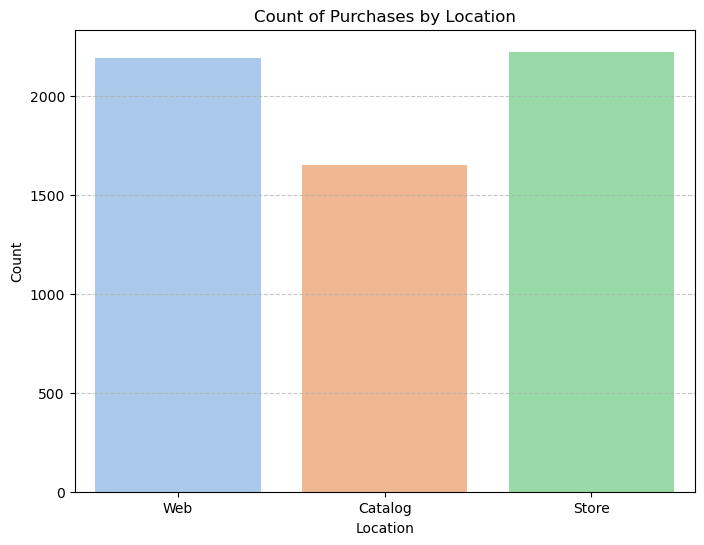

In [218]:
plt.figure(figsize=(8, 6))
sns.barplot(data=purLoc, x='Location', y='Count', palette='pastel')
plt.xlabel('Location')
plt.ylabel('Count')
plt.title('Count of Purchases by Location')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

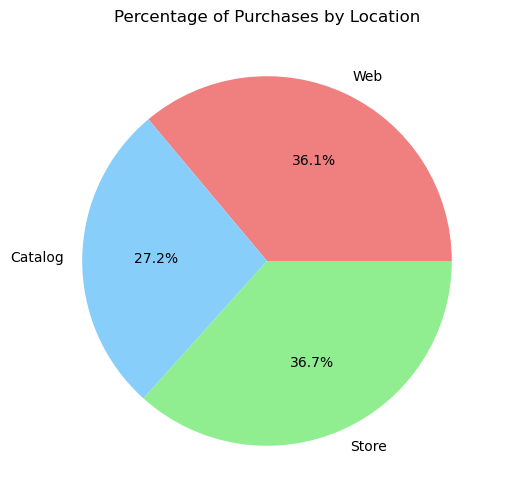

In [219]:
plt.figure(figsize=(8, 6))
plt.pie(purLoc['Percentage'], labels=purLoc['Location'], autopct='%1.1f%%', colors=['lightcoral', 'lightskyblue', 'lightgreen'])
plt.title('Percentage of Purchases by Location')
plt.show()

In [220]:
noWeb = data[(data['NumWebVisitsMonth']==0)]
noWeb

ID  Year_Birth  Age Education Marital_Status    Income  Kidhome  \
164    8475        1973   41  Doctoral        Married  157243.0        0   
683    1501        1982   32  Doctoral        Married  160803.0        0   
901   11074        1977   37  Bachelor         Single   85072.0        0   
971   10286        1962   52  Bachelor        Married   83715.0        0   
1766   8584        1952   62  Doctoral        Married   85431.0        0   
1799   6237        1966   48  Doctoral         Single    7144.0        0   
1902   5832        1960   54    Master        Married   92556.0        0   
1947   6428        1950   64  Doctoral       Divorced   76842.0        0   
2219   8720        1978   36    Master        Married   49611.5        0   

      Teenhome  Sum of House Member Dt_Customer  ...  NumWebVisitsMonth  \
164          1                    3  2014-03-01  ...                  0   
683          0                    2  2012-08-04  ...                  0   
901          0                    1  2014-04-09  ...                  0   
971          0                    2  2014-02-03  ...                  0   
1766         0                    2  2013-06-08  ...                  0   
1799         2                    3  2013-12-07  ...                  0   
1902         0                    2  2014-04-20  ...                  0   
1947         0                    1  2014-05-03  ...                  0   
2219         0                    2  2012-08-12  ...                  0   

      Freq Purchased  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  \
164               22             0             0             0             0   
683               29             0             0             0             0   
901               17             0             0             0             0   
971               23             0             0             0             0   
1766              16             0             0             0             0   
1799              25             0             0             0             0   
1902              21             0             0             0             0   
1947              16             0             0             0             0   
2219               1             0             1             0             0   

      AcceptedCmp2  Complain  Response  Promos  
164              0         0         0       0  
683              0         0         0       0  
901              0         0         0       0  
971              0         0         0       0  
1766             0         0         0       0  
1799             0         0         0       0  
1902             0         0         0       0  
1947             0         0         0       0  
2219             0         0         0       1  

[9 rows x 32 columns]

In [221]:
print(f'Ada {len(noWeb)} Customer yang tidak pernah mengunjungi website bulan lalu')

Ada 9 Customer yang tidak pernah mengunjungi website bulan lalu


In [222]:
noWebCO = data[(data['NumWebVisitsMonth']>0) & (data['NumWebPurchases']==0)]
noWebCO

ID  Year_Birth  Age     Education Marital_Status    Income  Kidhome  \
21     5376        1979   35      Bachelor        Married    2447.0        1   
42     8430        1957   57      Bachelor        Married   21994.0        0   
78    10401        1976   38        Master        Married   26326.0        0   
157    9283        1978   36      Bachelor         Single   60199.0        1   
178   10492        1959   55      Bachelor        Married   38285.0        2   
204     624        1984   30        Master         Single   18890.0        0   
292   10451        1965   49      Bachelor        Married   29672.0        1   
378    9543        1985   29      Bachelor        Married   19986.0        1   
381    2724        1981   33        Master         Single   36143.0        1   
439    5029        1946   68      Bachelor        Married   18100.0        0   
614    1503        1976   38      Doctoral        Married  162397.0        1   
657    7093        1985   29      Bachelor        Married   19986.0        1   
726    5329        1949   65      Doctoral       Divorced   35946.0        1   
770    4303        1957   57      Doctoral        Married    6835.0        0   
858    9553        1987   27      Bachelor        Married    7500.0        0   
878    8916        1975   39      Bachelor       Divorced   36627.0        2   
976    2166        1960   54        Master       Divorced   46779.0        1   
986    9850        1972   42        Master        Married   24884.0        1   
1037  10749        1991   23      Bachelor         Single    8028.0        0   
1078   9523        1982   32      Bachelor        Married   40479.0        1   
1123   8977        1985   29  Non-Graduate         Single   16581.0        0   
1241    803        1968   46      Bachelor        Married   40521.0        1   
1346   8369        1987   27      Bachelor        Married   18227.0        1   
1431   2518        1986   28        Master        Married   20491.0        0   
1462   7196        1950   64      Doctoral        Married   41145.0        1   
1536     73        1953   61      Doctoral         Single   51411.0        1   
1542   2217        1975   39        Master        Married   37284.0        1   
1638  10141        1960   54        Master       Divorced   39228.0        0   
1646   4931        1977   37      Bachelor        Married  157146.0        0   
1676   7788        1983   31      Doctoral        Married   23536.0        1   
1930   9291        1959   55        Master        Married   34242.0        0   
1977   8619        1957   57      Bachelor        Married   21994.0        0   
1995   6679        1966   48      Bachelor         Single   33279.0        0   
2007   4102        1975   39        Master        Married   37284.0        1   
2011   2375        1972   42      Bachelor        Married   30261.0        1   
2018   4198        1965   49      Bachelor        Married   29672.0        1   
2081   7901        1971   43        Master        Married   34109.0        0   
2111   6147        1971   43      Bachelor       Divorced   25818.0        1   
2183   7990        1947   67      Bachelor        Married   27469.0        0   
2223   8080        1986   28      Bachelor         Single   26816.0        0   

      Teenhome  Sum of House Member Dt_Customer  ...  NumWebVisitsMonth  \
21           0                    3  2013-01-06  ...                  1   
42           1                    3  2012-12-24  ...                  5   
78           0                    2  2013-09-04  ...                  3   
157          2                    4  2013-09-12  ...                  4   
178          1                    5  2014-06-24  ...                  2   
204          0                    1  2012-11-10  ...                  6   
292          1                    4  2013-03-12  ...                  6   
378          0                    3  2013-11-14  ...                  7   
381          0                    2  2014-03-30  ... 

In [223]:
print(f'Ada {len(noWebCO)} Customer yang mengunjungi website bulan lalu tetapi tidak bertransaksi menggunakan website')

Ada 40 Customer yang mengunjungi website bulan lalu tetapi tidak bertransaksi menggunakan website


In [224]:
webCO = data[(data['NumWebVisitsMonth']>0) & (data['NumWebPurchases']>0)]
webCO

ID  Year_Birth  Age Education Marital_Status   Income  Kidhome  \
0      5524        1957   57  Bachelor         Single  58138.0        0   
1      2174        1954   60  Bachelor         Single  46344.0        1   
2      4141        1965   49  Bachelor        Married  71613.0        0   
3      6182        1984   30  Bachelor        Married  26646.0        1   
4      5324        1981   33  Doctoral        Married  58293.0        1   
...     ...         ...  ...       ...            ...      ...      ...   
2225  10870        1967   47  Bachelor        Married  61223.0        0   
2226   4001        1946   68  Doctoral        Married  64014.0        2   
2227   7270        1981   33  Bachelor       Divorced  56981.0        0   
2228   8235        1956   58    Master        Married  69245.0        0   
2229   9405        1954   60  Doctoral        Married  52869.0        1   

      Teenhome  Sum of House Member Dt_Customer  ...  NumWebVisitsMonth  \
0            0                    1  2012-09-04  ...                  7   
1            1                    3  2014-03-08  ...                  5   
2            0                    2  2013-08-21  ...                  4   
3            0                    3  2014-02-10  ...                  6   
4            0                    3  2014-01-19  ...                  5   
...        ...                  ...         ...  ...                ...   
2225         1                    3  2013-06-13  ...                  5   
2226         1                    5  2014-06-10  ...                  7   
2227         0                    1  2014-01-25  ...                  6   
2228         1                    3  2014-01-24  ...                  3   
2229         1                    4  2012-10-15  ...                  7   

      Freq Purchased  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  \
0                 22             0             0             0             0   
1                  4             0             0             0             0   
2                 20             0             0             0             0   
3                  6             0             0             0             0   
4                 14             0             0             0             0   
...              ...           ...           ...           ...           ...   
2225              16             0             0             0             0   
2226              15             0             0             0             1   
2227              18             0             1             0             0   
2228              21             0             0             0             0   
2229               8             0             0             0             0   

      AcceptedCmp2  Complain  Response  Promos  
0                0         0         1       1  
1                0         0         0       0  
2                0         0         0       0  
3                0         0         0       0  
4                0         0         0       0  
...            ...       ...       ...     ...  
2225             0         0         0       0  
2226             0         0         0       1  
2227             0         0         0       1  
2228             0         0         0       0  
2229             0         0         1       1  

[2181 rows x 32 columns]

In [225]:
print(f'Ada {len(webCO)} Customer yang mengunjungi website bulan lalu dan pernah bertransaksi menggunakan website')

Ada 2181 Customer yang mengunjungi website bulan lalu dan pernah bertransaksi menggunakan website


Dari web dapat diartikan sebagai berikut:
* dari 2300 customer, hanya ada 9 yang tidak membuka web bulan ini
* dari 2300 customer, Ada 40 Customer yang mengunjungi website bulan ini tetapi tidak bertransaksi menggunakan website
* dari 2300 customer, Ada 2181 visit bulan ini dan pernah melakukan transaksi di web
* Web merupakan salah satu prioritas Customer dalam melakukan transaksi, ditandai dengan hanya 9 yang tidak mengunjunginya bulan ini
* Web dapat dijadikan salah satu target utama untuk meningkatkan presentase ketertarikan customer terhadap promosi

# Rekomendasi
* Menggencarkan promosi untuk menaikkan RFM Level Customer dengan Target RFM-Level Gold-Silver-Bronze
* Segmentasi Customer pada supermarket ini (dijadikan sebagai acuan target marketing)
    * Education             : 'Bachelor' 
    * Marital_Status        : 'Married'
    * Sum of House Member   : 2-3 House Member
    * RFM - Level           : Silver-Bronze-Common Member
* membuat sebuah promosi untuk meningkatkan engagement Customer terhadap promosi dengan target 20 % dan ketertarikan untuk menggunakan promo berulang sebesar 10 % dengan cara strategi marketing cashback yang dapat digunakan di transaksi selanjutnya atau sistem poin untuk menarik customer kembali. 
* Promosi dapat digencarkan di Store karena store merupakan tempat terbanyak terjadinya transaksi (berdasarkan sum) dan count (berdasarkan ID), selain itu web dapat dijadikan sebagai pendorong promosi.
* Web dapat dijadikan salah satu media promosi, selain ketertarikan Customer yang sudah terdaftar cukup besar (hanya 9 dari 2300 yang tidak membuka web). web dapat menjadi sarana promosi bagi masyarakat luar untuk bertransaksi gold maupun wine yang notabene bukan barang yang cepat basi/rusak